# Assignment 10

21st April, 2018.
Varun Sundar
EE2703

# Abstract 

In this assignment we consider the fourier spectra of non-periodic signals, which is done by taking their corresponding Discrete Fourier Transform. 

In the process of doing so, we understand the need for windowing in case of non-periodic functions. This is followed by a windowed fourier analysis for the case of a chirped signal.

# Introduction

Previously for the case of periodic discrete series, we had taken the following approach:

* Sample the signal so that $f_{Nyquist}$ is met, and so that $\Delta f$ is small enough. 
* Generate the frequency axis from $−f_{max}/2$ to $+ f_{max}/2$, taking care to drop the last term.
* Ensure that the signal starts at t=0+ and ends at t=N−
* Use 2k samples (or more).
* Obtain the DFT. 
* Rotate the samples so that they go from f = − fmax/2 to f = +fmax/2−∆f. This is done with either `fftshift` or `ifftshift`.
* Plot the magnitude and phase of the spectrum.
* Usually we would plot the magnitude in dB and the phase in degrees and the frequency axis would be logarithmic. This is to capture polynomial decay of the spectrum.

In this assignment we consider both non-periodic signals as well as signals which are not periodic in the range of consideration (but may be periodic otherwise).


This produces a discontinuity in the signal DFT reproduces, simply because,

$$\tilde{x}[n]$$ is not exactly

$$
\begin{cases}
x[n],  & \text{if $0<=n<N$} \\
0, & \text{otherwise}
\end{cases}
$$

This therefore produces a Gibbs phenomena, which in the fourier domain is a ramp with slope $-20dB / decade$. 

#  Assignment Questions

## Question 1

### Working with Non-Periodic Signals

Consider $\sin(\sqrt{2}t)$. Obtained over $0$ to $2\pi$ with $64$ samples, this function looks as follows:

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [3]:
def initialise_notebook():
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    plt.rcParams['figure.figsize'] = 15, 10
    plt.rcParams['figure.dpi'] = 150
    
initialise_notebook()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


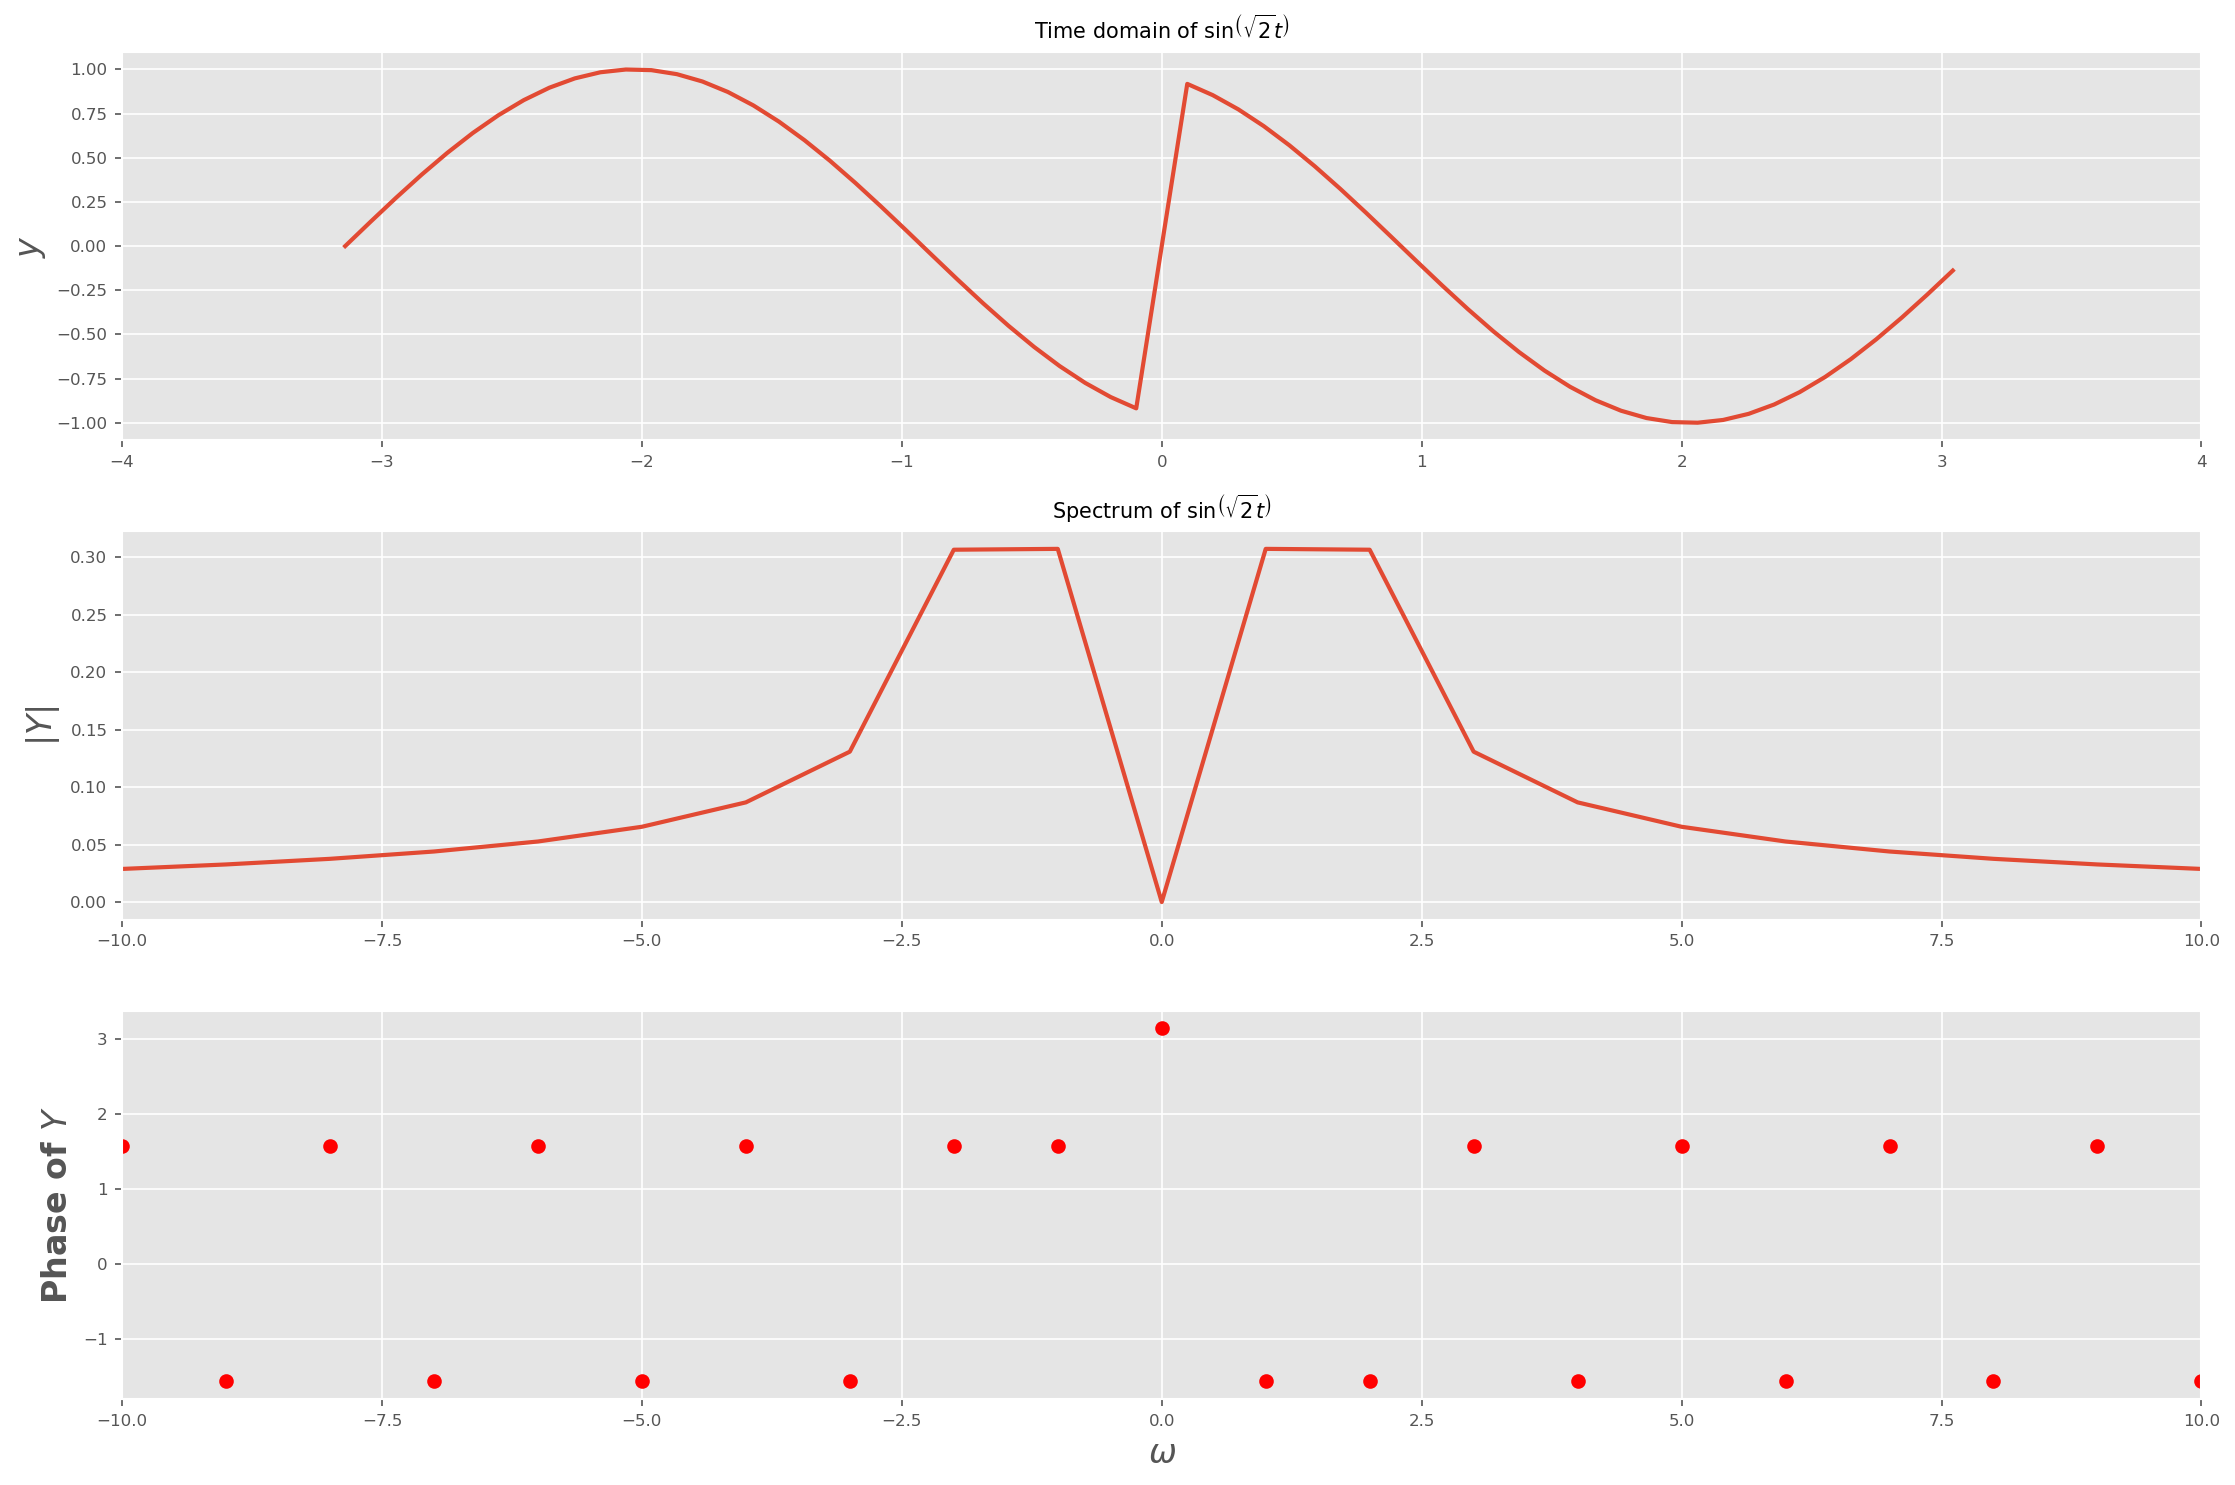

In [4]:
t=np.linspace(-np.pi,np.pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=np.sin(np.sqrt(2)*t)

y[0]=0 # the sample corresponding to -tmax should be set zero
y=np.fft.fftshift(y) # make y start with y(t=0)
Y=np.fft.fftshift(np.fft.fft(y))/64.0
w=np.linspace(-np.pi*fmax,np.pi*fmax,65);w=w[:-1]


plt.figure()

# First plot
plt.subplot(3,1,1)
plt.plot(t,y,lw=2)
plt.xlim([-4,4])
plt.ylabel(r"$y$",size=16)
plt.title(r"Time domain of $\sin\left(\sqrt{2}t\right)$")
plt.grid(True)

# Second plot
plt.subplot(3,1,2)
plt.plot(w,abs(Y),lw=2)
plt.xlim([-10,10])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\sin\left(\sqrt{2}t\right)$")
plt.grid(True)

# Third plot
plt.subplot(3,1,3)
plt.plot(w,np.angle(Y),'ro',lw=2)
plt.xlim([-10,10])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)

plt.tight_layout()
plt.savefig("fig10-1.png")
plt.show()

The magnitude is off:
* We expected two peaks, instead there is gradual decaying magnitude.

* The phase is correct, considering that the continuous fourier transform of an odd signal is imaginary. In the case of a DFT,

let,

\begin{array} {ll}
 y[0]= 0, \qquad ... \qquad , sin(0) \\
 y[i]=-y[N-i] ,\qquad ... \qquad , i=1,2,...N/2-1\\
 y[\frac{N}{2}]=sin(t_{N/2}),\qquad ... \qquad , sin(-t_{max})
\end{array}

then the DFT gives,

$$
\begin{array}{ll}
Y[k]=\sum_{n=0}^{N-1}y[n]exp(\frac{2\pi j}{N}kn)\\
 =\sum_{n=0}^{N/2-1}y[n](exp(\frac{2\pi j}{N}kn)-exp(\frac{2\pi j}{N}-kn)) + y[N/2]exp(\pi kj) \\
 = \sum_{n=0}^{N-1}-2jy[n]sin(\frac{2\pi j}{N}kn) + y[N/2](-1)^{k}\\
\end{array}
$$

We plot the function for several time periods.

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


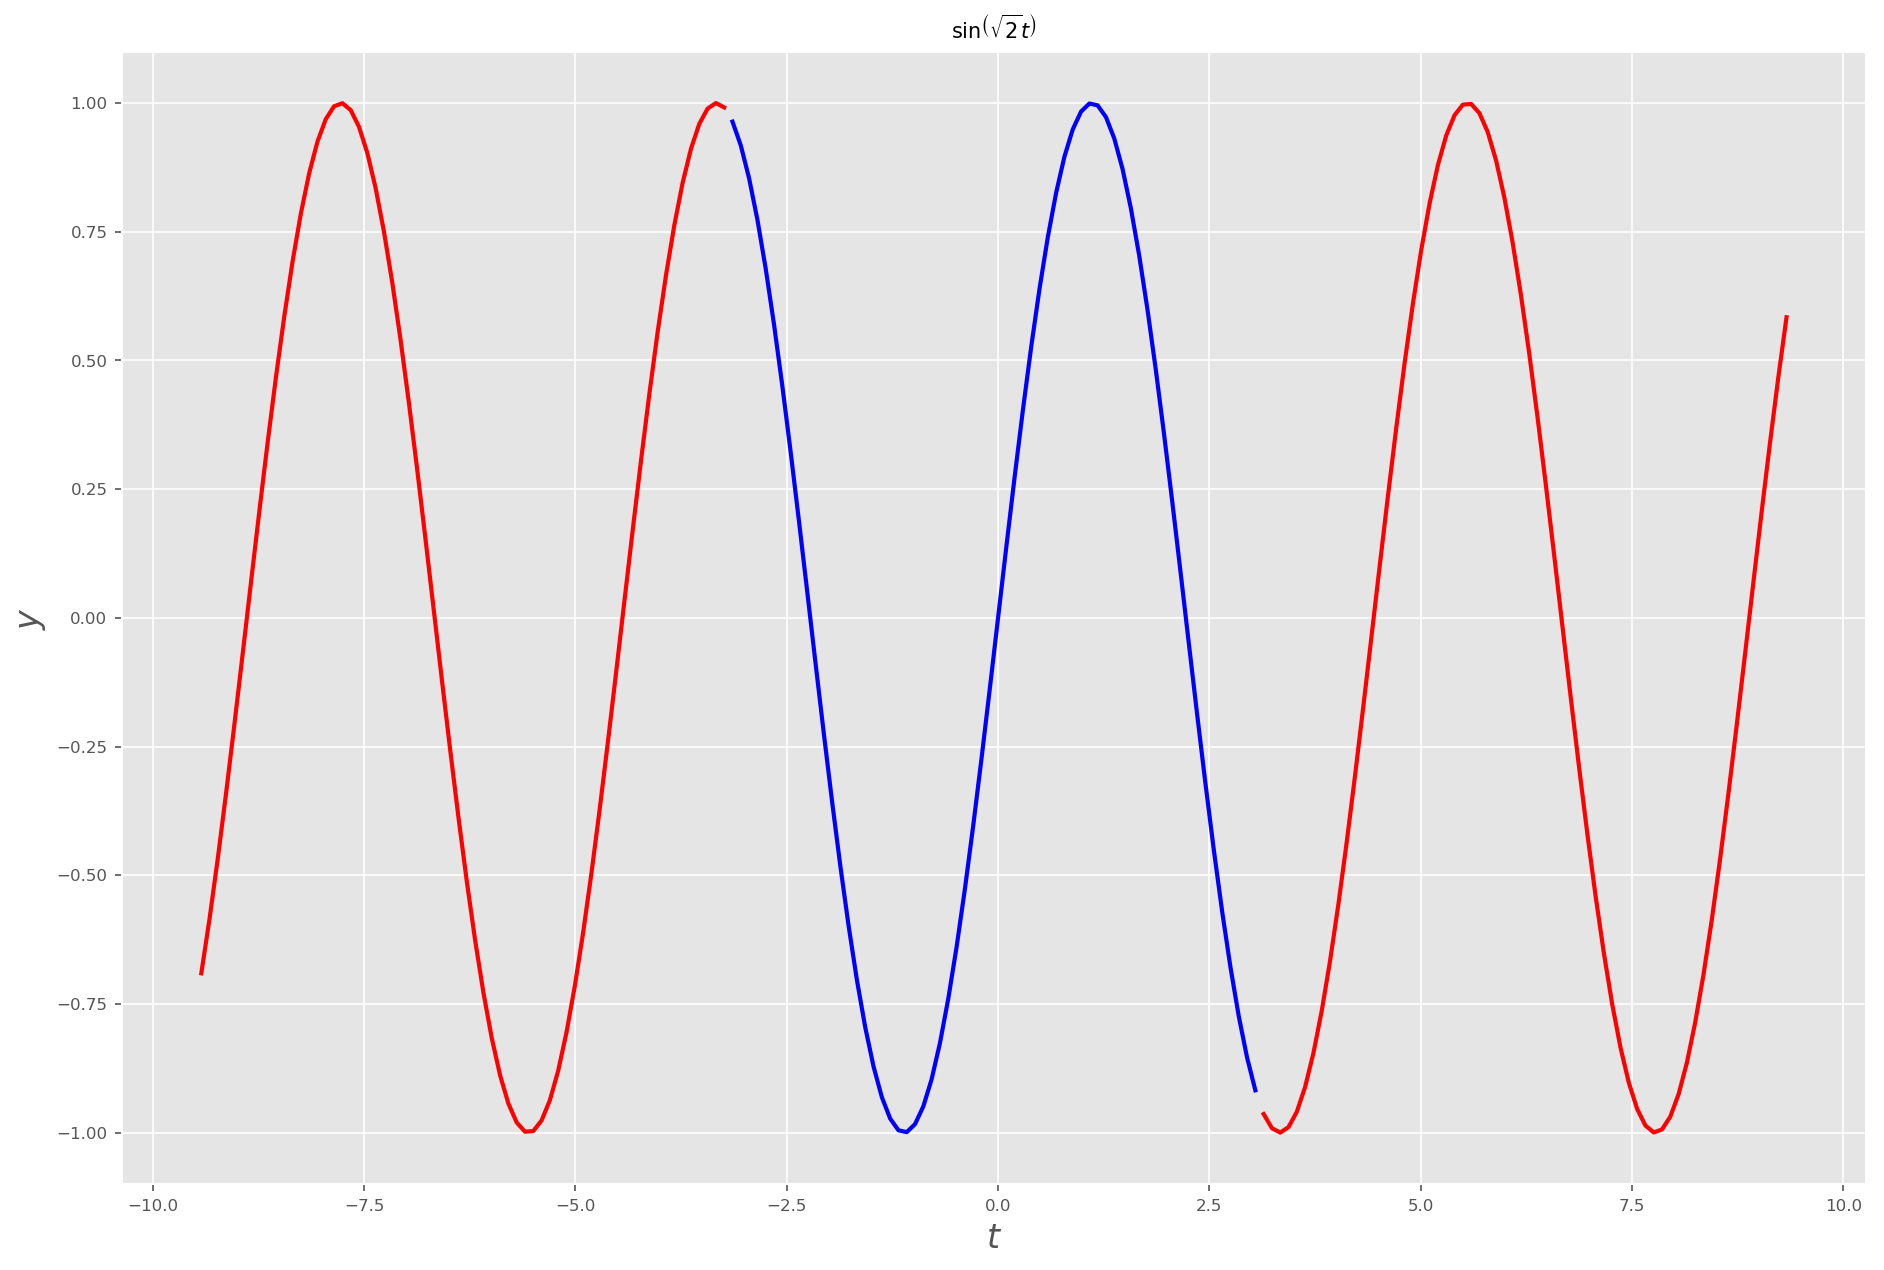

In [5]:
t1=np.linspace(-np.pi,np.pi,65);t1=t1[:-1]
t2=np.linspace(-3*np.pi,-np.pi,65);t2=t2[:-1]
t3=np.linspace(np.pi,3*np.pi,65);t3=t3[:-1]
# y=sin(sqrt(2)*t)
plt.figure(2)
plt.plot(t1,np.sin(np.sqrt(2)*t1),'b',lw=2)
plt.plot(t2,np.sin(np.sqrt(2)*t2),'r',lw=2)
plt.plot(t3,np.sin(np.sqrt(2)*t3),'r',lw=2)
plt.ylabel(r"$y$",size=16)
plt.xlabel(r"$t$",size=16)
plt.title(r"$\sin\left(\sqrt{2}t\right)$")
plt.grid(True)
plt.savefig("fig10-2.png")
plt.show()

The blue line connects the points whose DFT we took. The red lines show the continuation of the function. Quite clearly, even though $sin (\sqrt{2}t)$ is a periodic function, the portion between $−\pi$ and $\pi$ is not the part that can be replicated to generate the function.
 
Now to see which function is reproduced by DFT, we replicate just the blue points. And that is shown below:

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


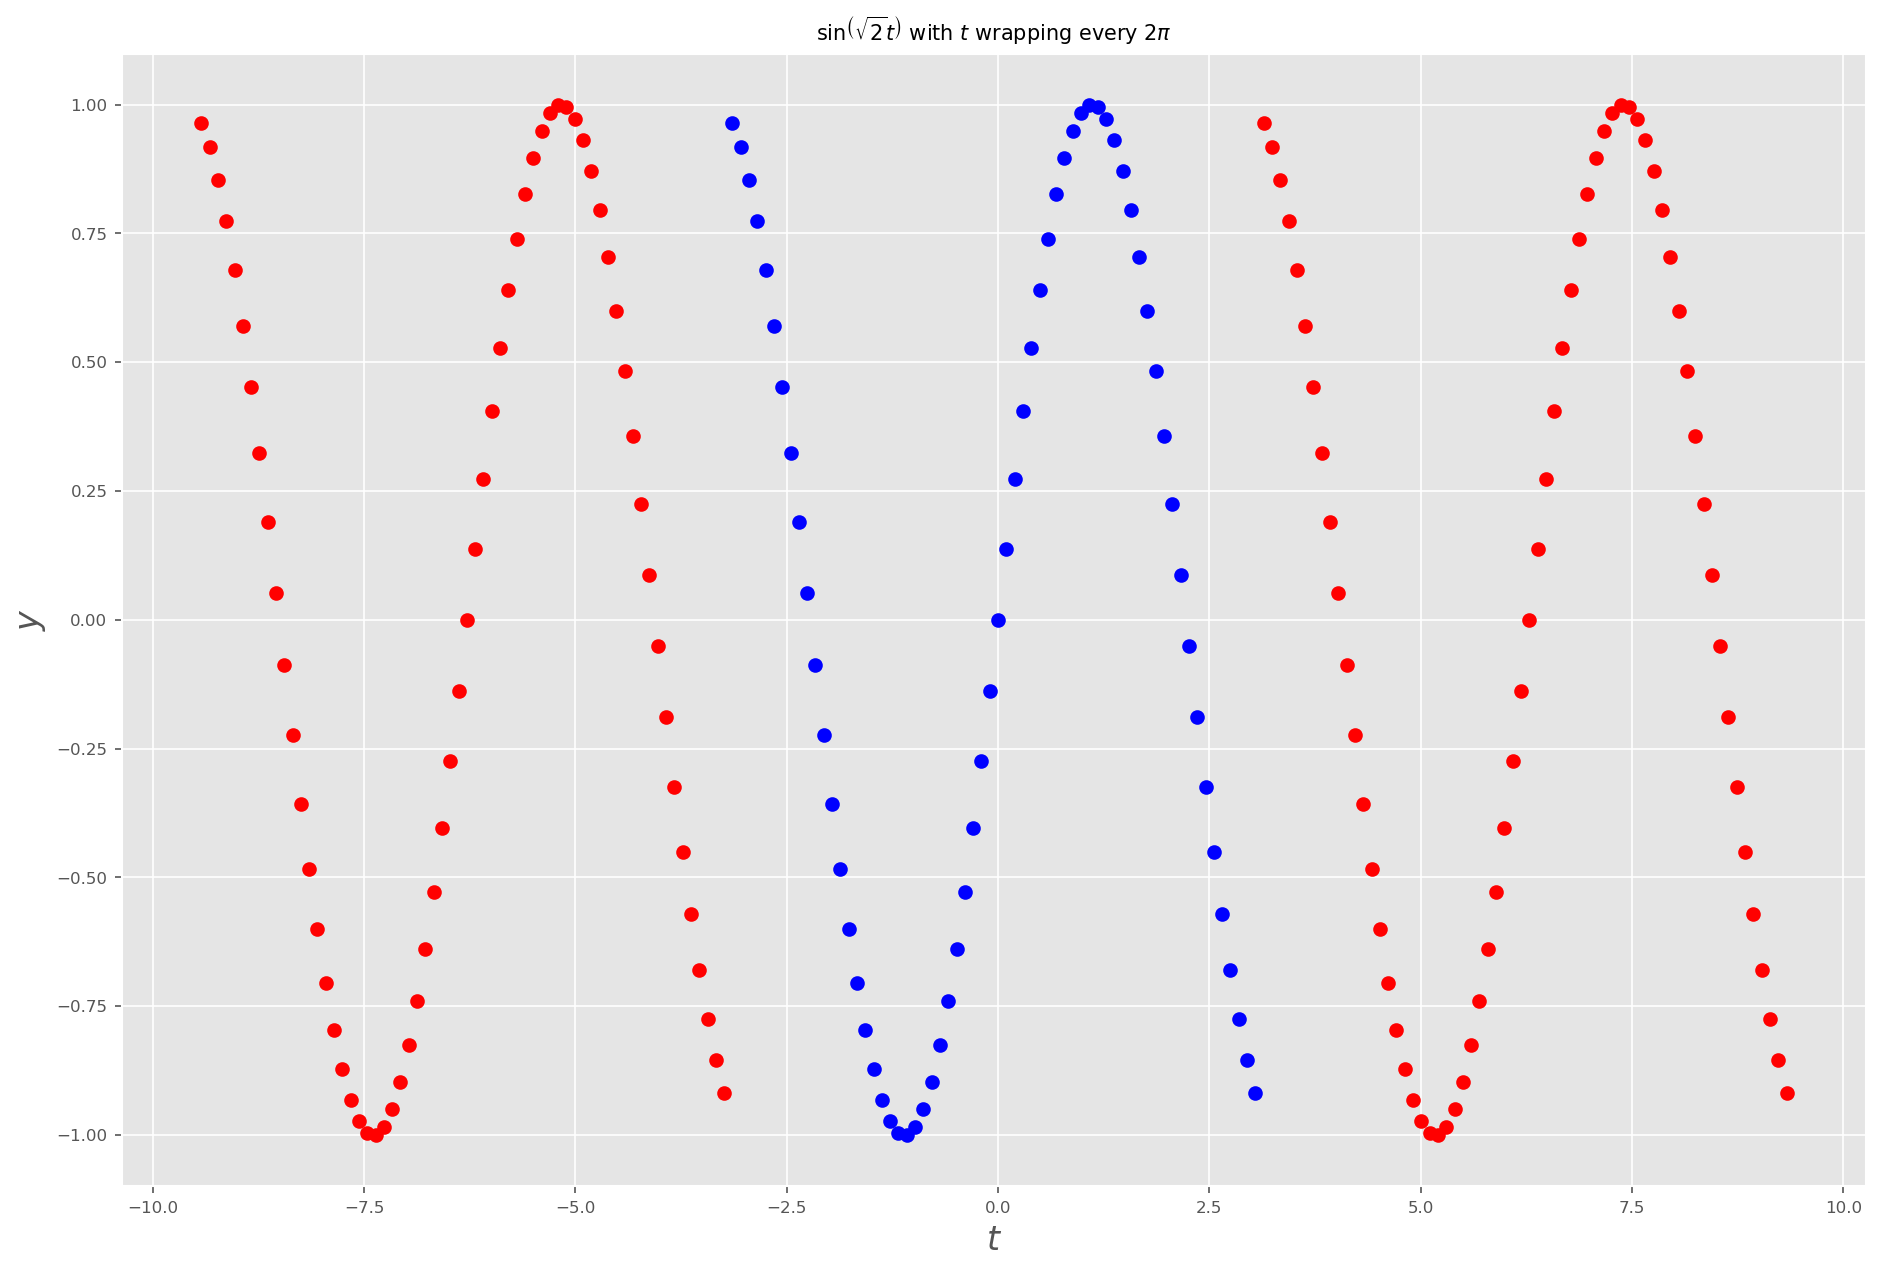

In [6]:
t1=np.linspace(-np.pi,np.pi,65);t1=t1[:-1]
t2=np.linspace(-3*np.pi,-np.pi,65);t2=t2[:-1]
t3=np.linspace(np.pi,3*np.pi,65);t3=t3[:-1]
y=np.sin(np.sqrt(2)*t1)
plt.figure(3)
plt.plot(t1,y,'bo',lw=2)
plt.plot(t2,y,'ro',lw=2)
plt.plot(t3,y,'ro',lw=2)
plt.ylabel(r"$y$",size=16)
plt.xlabel(r"$t$",size=16)
plt.title(r"$\sin\left(\sqrt{2}t\right)$ with $t$ wrapping every $2\pi$ ")
plt.grid(True)
plt.savefig("fig10-3.png")
plt.show()

Thus, there is a Gibbs phenomena due to the discontinuity. Note that,

The Fourier transform of the box function:
$$f(t) =
\begin{cases}
1,  & \text{if $|t|<t_o$} \\
0, & \text{otherwise}
\end{cases}$$
is given by
$$F(\omega) = 2\frac{sin(\omega t_o)}{\omega}$$

The spectrum of the box function decays very slowly, as $\frac{2}{\omega}$.   
Now our function is an odd function with a big jump.

So let us consider the periodic ramp:

$$f (t) = t, −\pi< t < \pi$$

Then the fourier series of this ramp is:
$$f(t)=2(\frac{sin t}{1}-\frac{sin 2t}{2}+\frac{sin 3t}{3} -\dots) $$

Again the coefficients decay very slowly.  
The DFT is just like the fourier series, except that both time and frequency are samples.  
So, if the time samples are like a ramp, the frequency samples will decay as $\frac{1}{\omega}$. 

Let us verify this for the ramp itself:

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


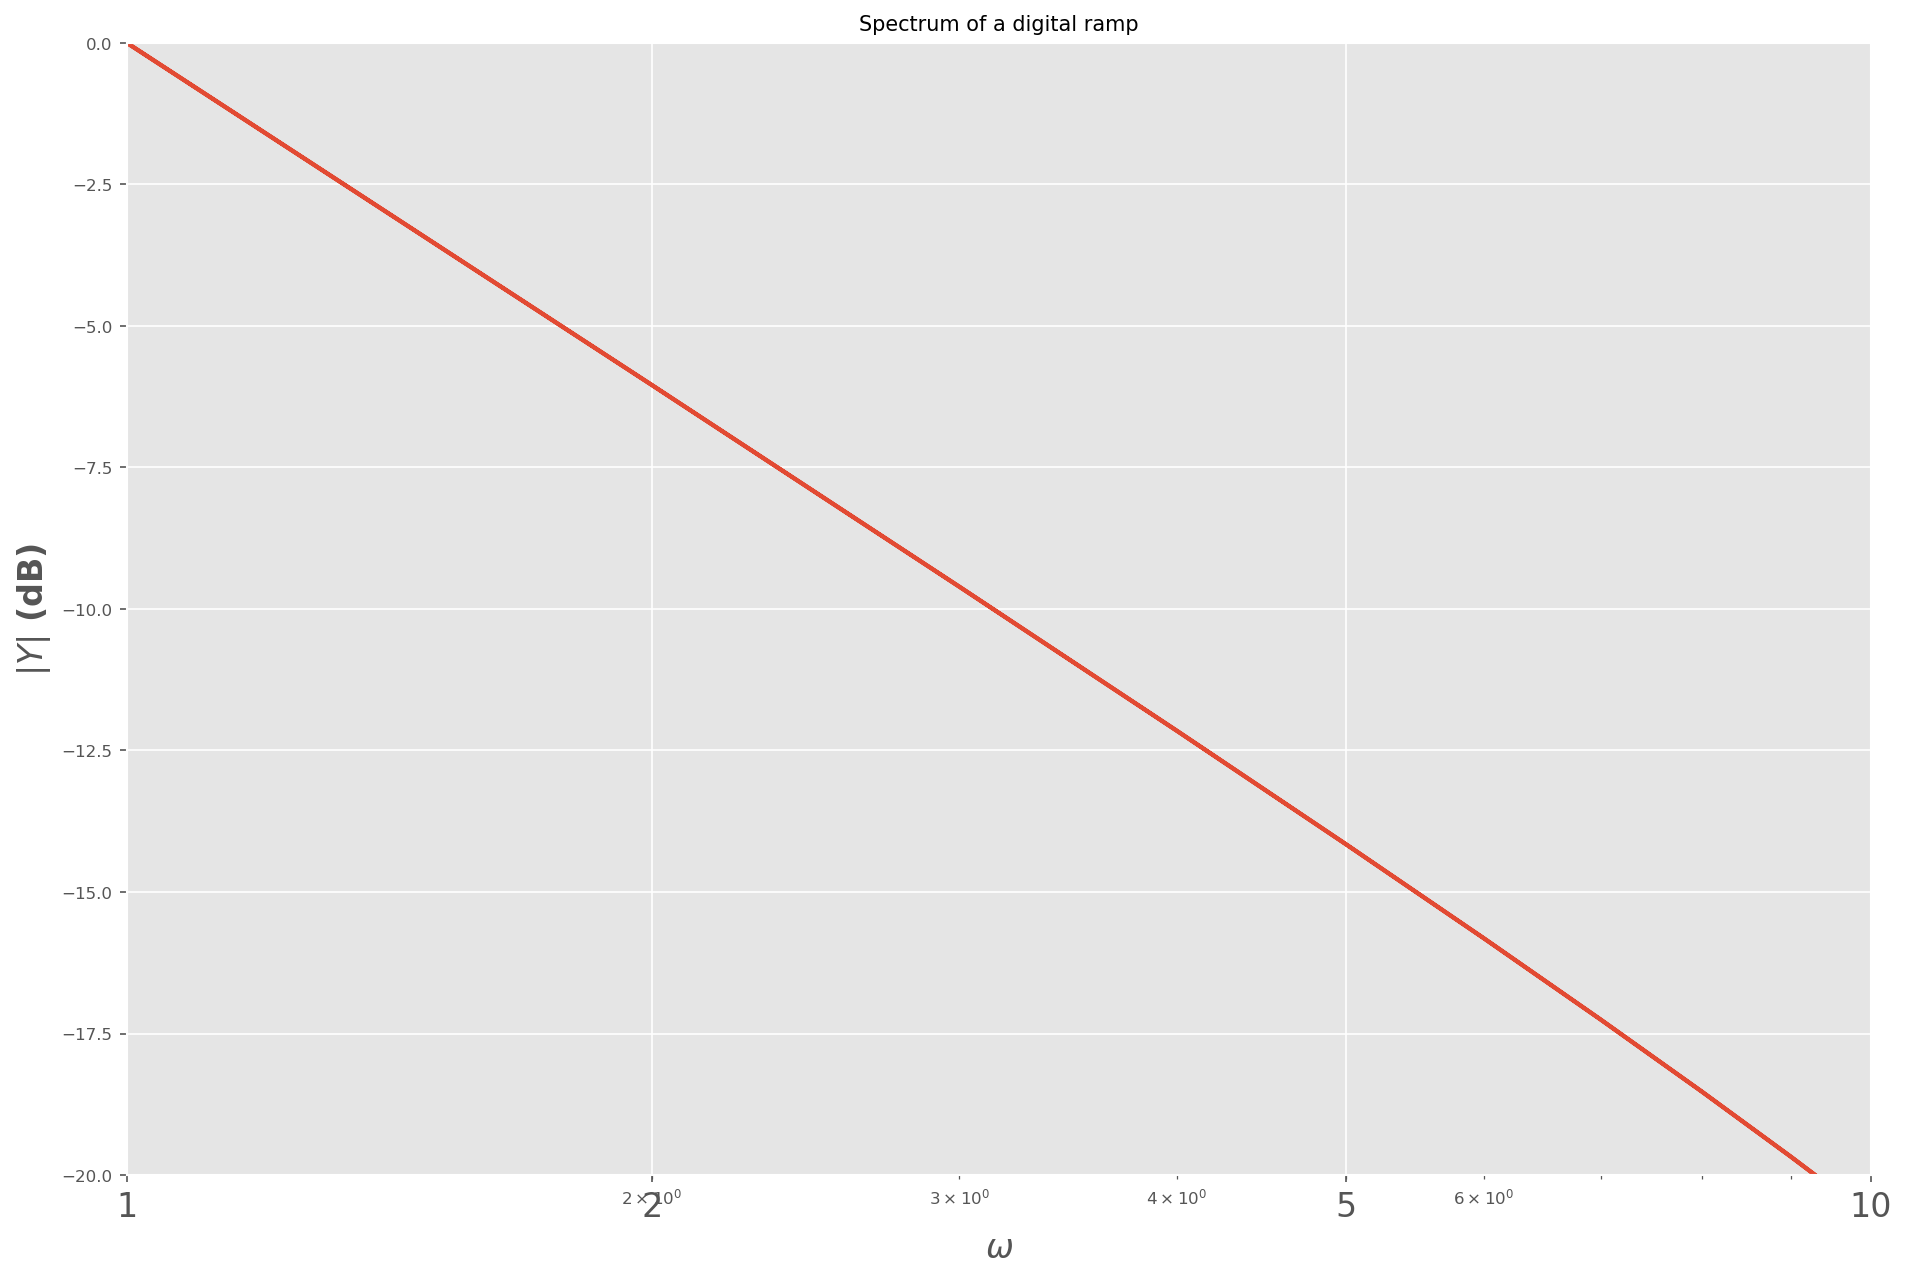

In [7]:
t=np.linspace(-np.pi,np.pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=t
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=np.fft.fftshift(y) # make y start with y(t=0)
Y=np.fft.fftshift(np.fft.fft(y))/64.0
w=np.linspace(-np.pi*fmax,np.pi*fmax,65);w=w[:-1]

# Plotting
plt.figure()
plt.semilogx(np.abs(w),20*np.log10(np.abs(Y)),lw=2)
plt.xlim([1,10])
plt.ylim([-20,0])
plt.xticks([1,2,5,10],["1","2","5","10"],size=16)
plt.ylabel(r"$|Y|$ (dB)",size=16)
plt.title(r"Spectrum of a digital ramp")
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.savefig("fig10-4.png")
plt.show()

Clearly the spectrum decays as 20 dB per decade, which corresponds to ${1/ω}$. The big jumps at $n\pi$ force this slowly decaying spectrum, which is why we don’t see the expected spikes for the spectrum of $sin(\sqrt{2}t)$ .

Windowing offers a way out here - the goal being to attenuate the ramp caused by Gibbs phenonmena.

### Windowing

Consider:

$$g(n) = f (n)w(n)$$

where, $w(n)$ is the windowing function.

The new spectrum is:

$$G_k = \sum_{n=0}^{N-1} F_nW_{k−n} $$

Suppose $f[n]$ is a sinusoid. Then $F[k]$ has two spikes.   
But the two spikes are now smeared out by $W[k]$. So we expect to get broader peaks. 

But what this also does is to suppress the jump at the edge of the window. The window we will use is called the Hamming window:

$$ w[n]=
\begin{cases}
0.54+0.46cos(\frac{2\pi n}{N-1}),  & \text{if $|n|<\frac{N-1}{2}$} \\
0, & \text{otherwise}
\end{cases}$$


Let us look at our time sequence for $sin(\sqrt{2}t)$ now . . .

In [8]:
n=np.arange(64)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/63))


plt.plot(n,wnd,lw=2)
plt.ylabel(r"$y$",size=16)
plt.title(r"Hamming Window Time domain of $w[n]$")
plt.grid(True)

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


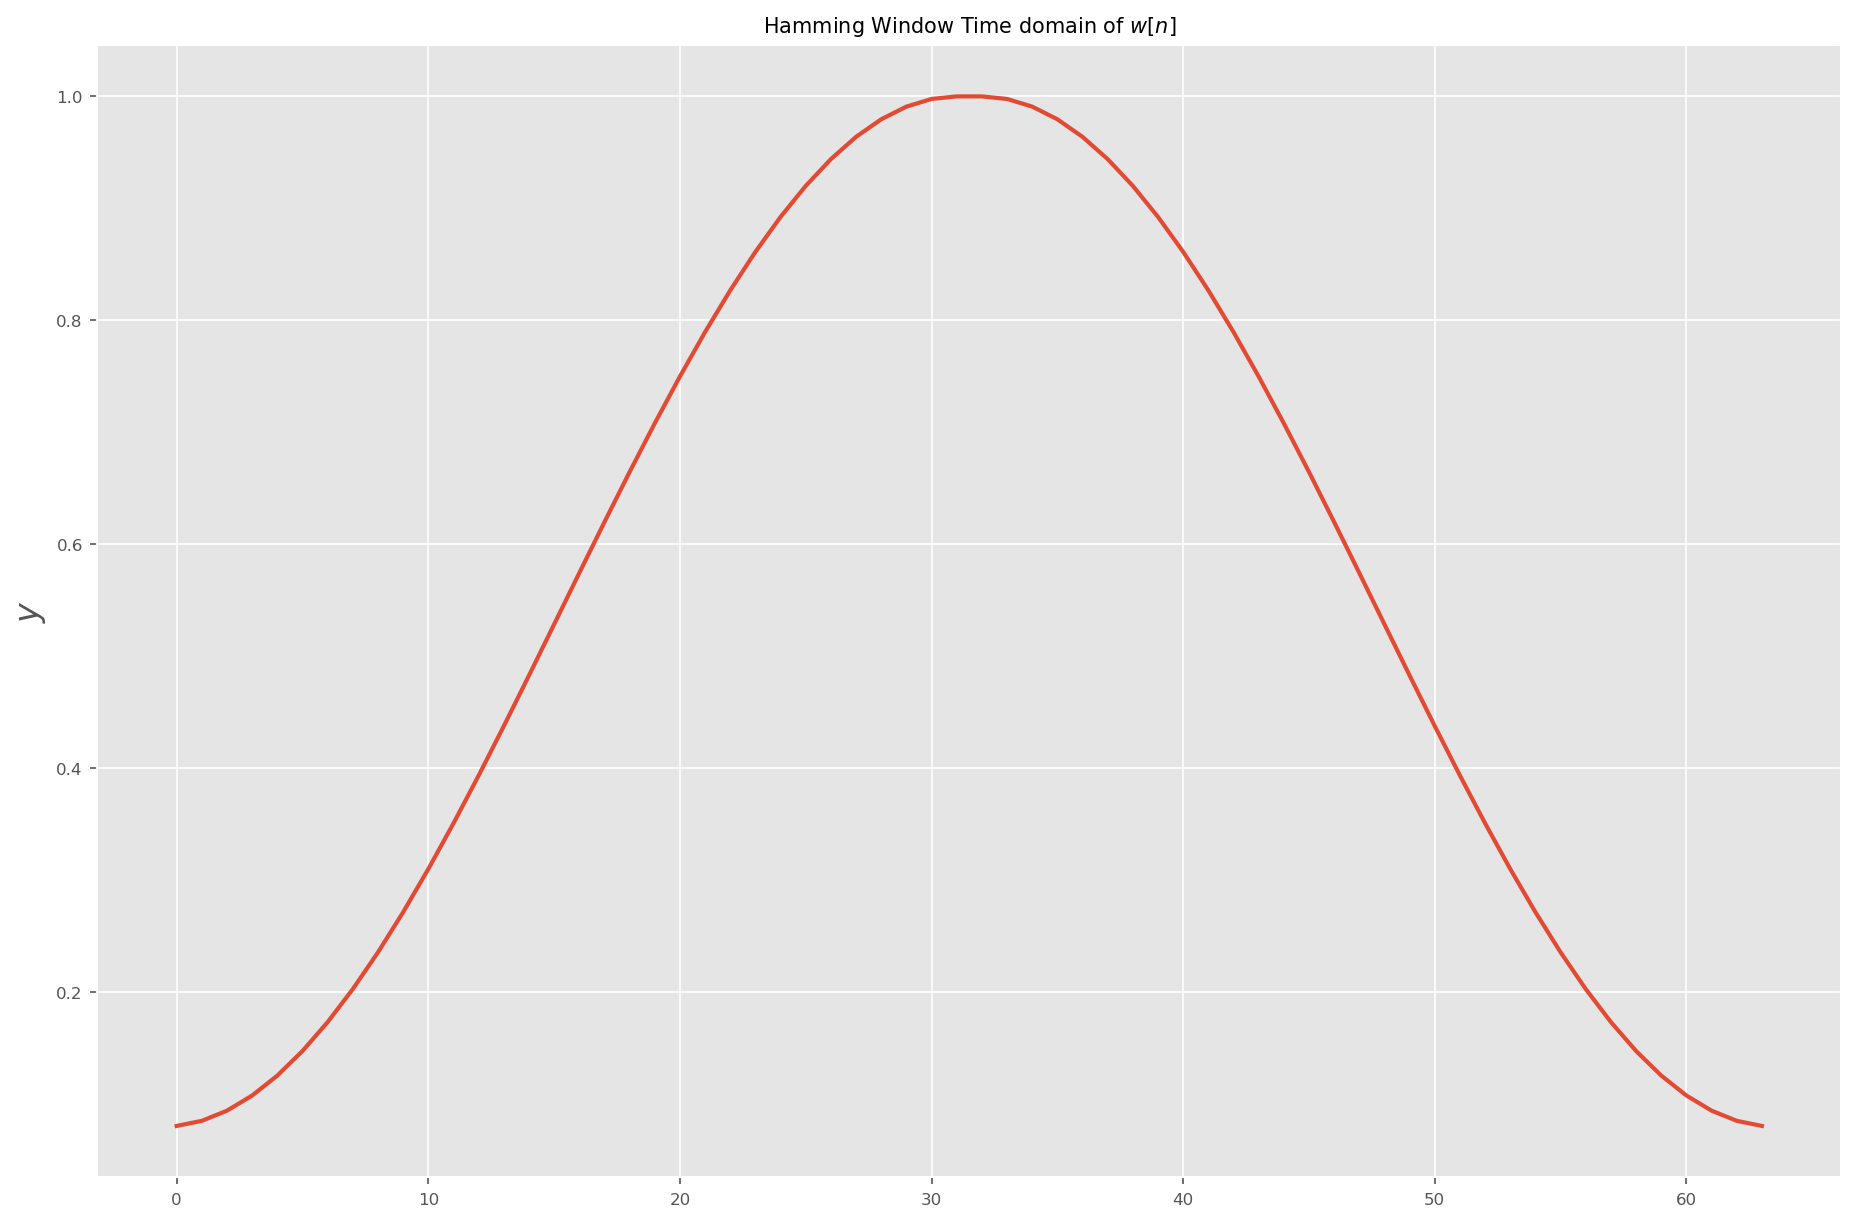

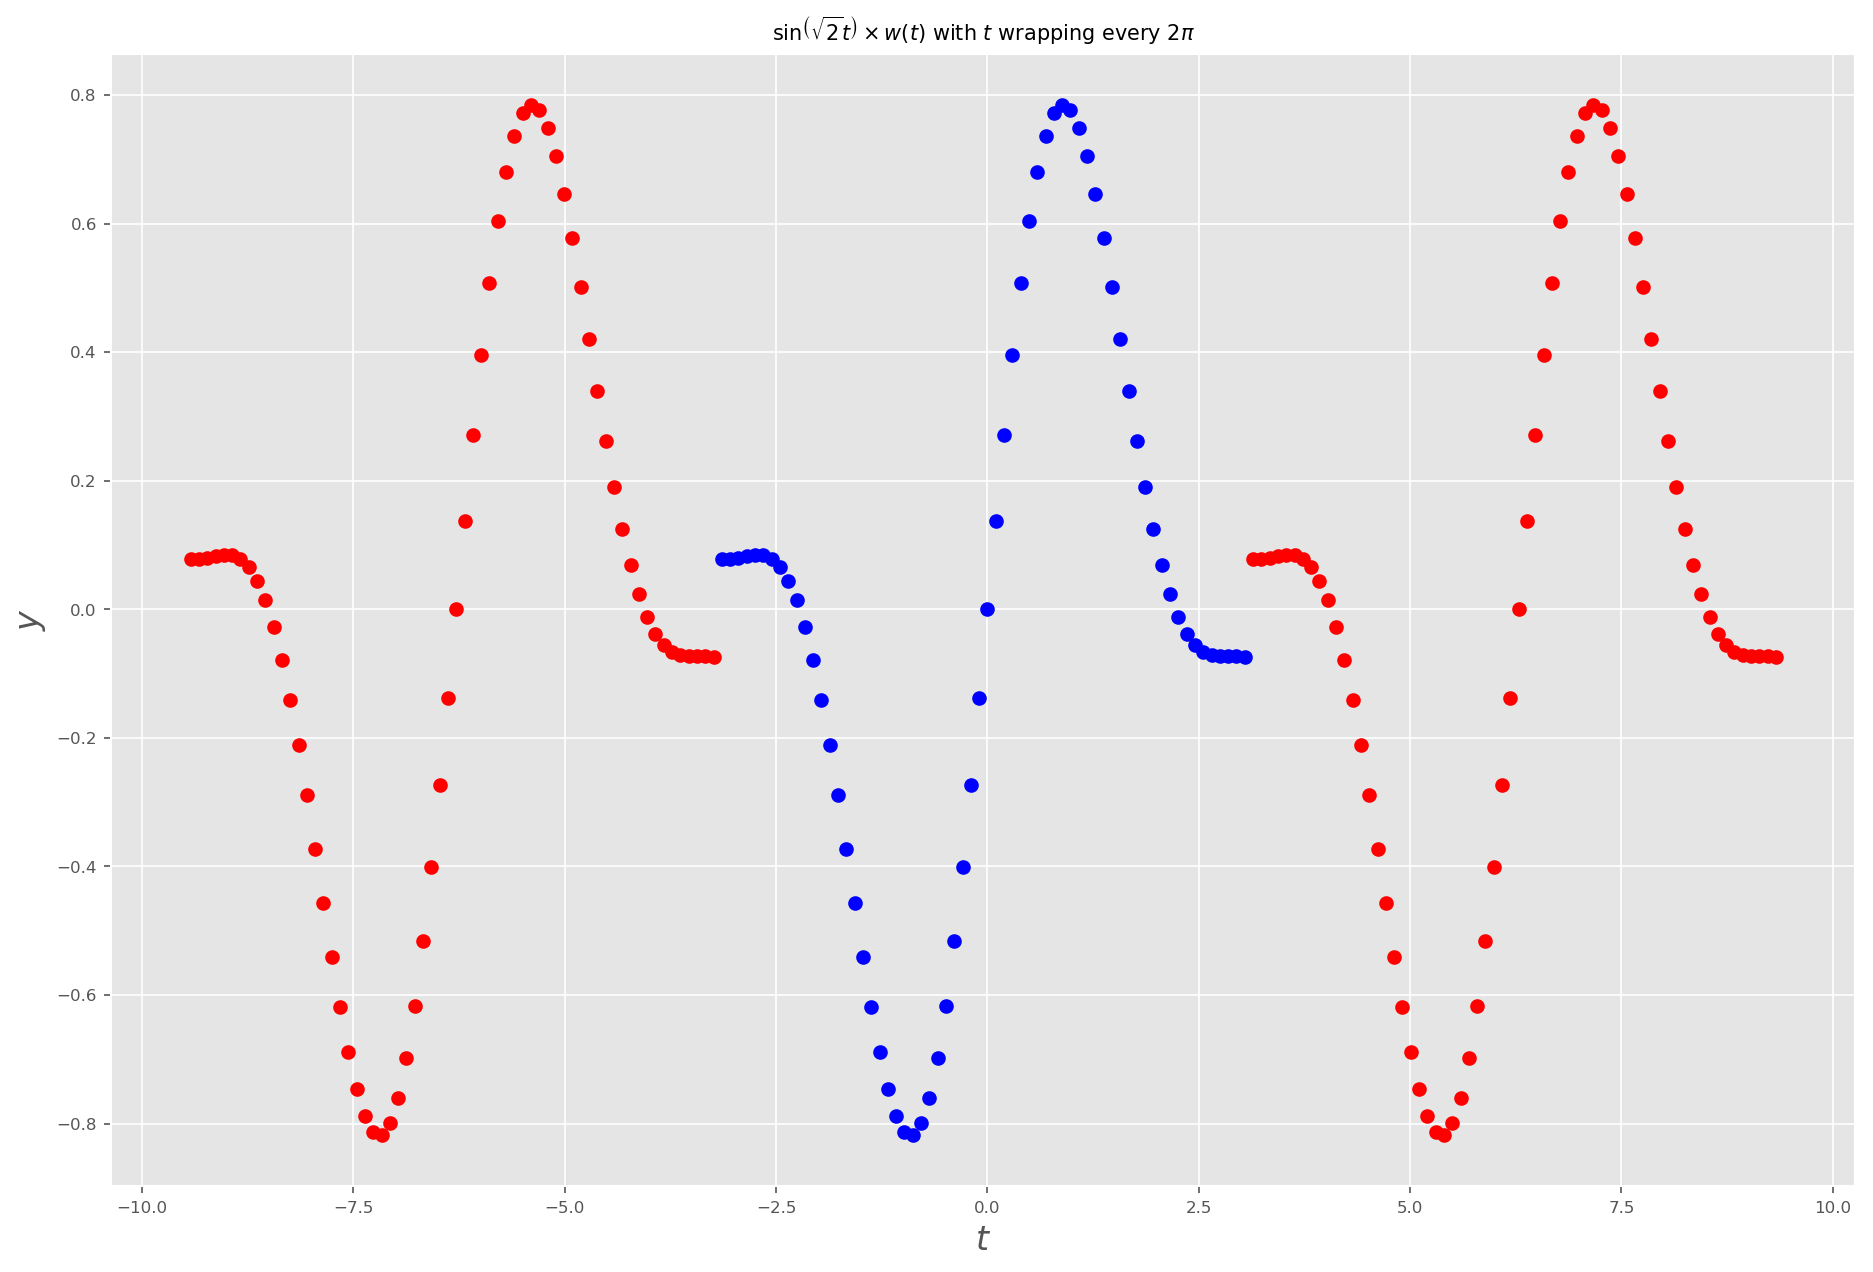

In [9]:
t1=np.linspace(-np.pi,np.pi,65);t1=t1[:-1]
t2=np.linspace(-3*np.pi,-np.pi,65);t2=t2[:-1]
t3=np.linspace(np.pi,3*np.pi,65);t3=t3[:-1]
n=np.arange(64)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/63))
y=np.sin(np.sqrt(2)*t1)*wnd

plt.figure(3)
plt.plot(t1,y,'bo',lw=2)
plt.plot(t2,y,'ro',lw=2)
plt.plot(t3,y,'ro',lw=2)
plt.ylabel(r"$y$",size=16)
plt.xlabel(r"$t$",size=16)
plt.title(r"$\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$ ")
plt.grid(True)
plt.savefig("fig10-5.png")
plt.show()

The jump is still there, but it is much reduced. There is a little bit of magic in keeping some of the jump - it gives us an extra $10 db$ of suppression.

Now let us take the DFT of this sequence and see what we get:

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


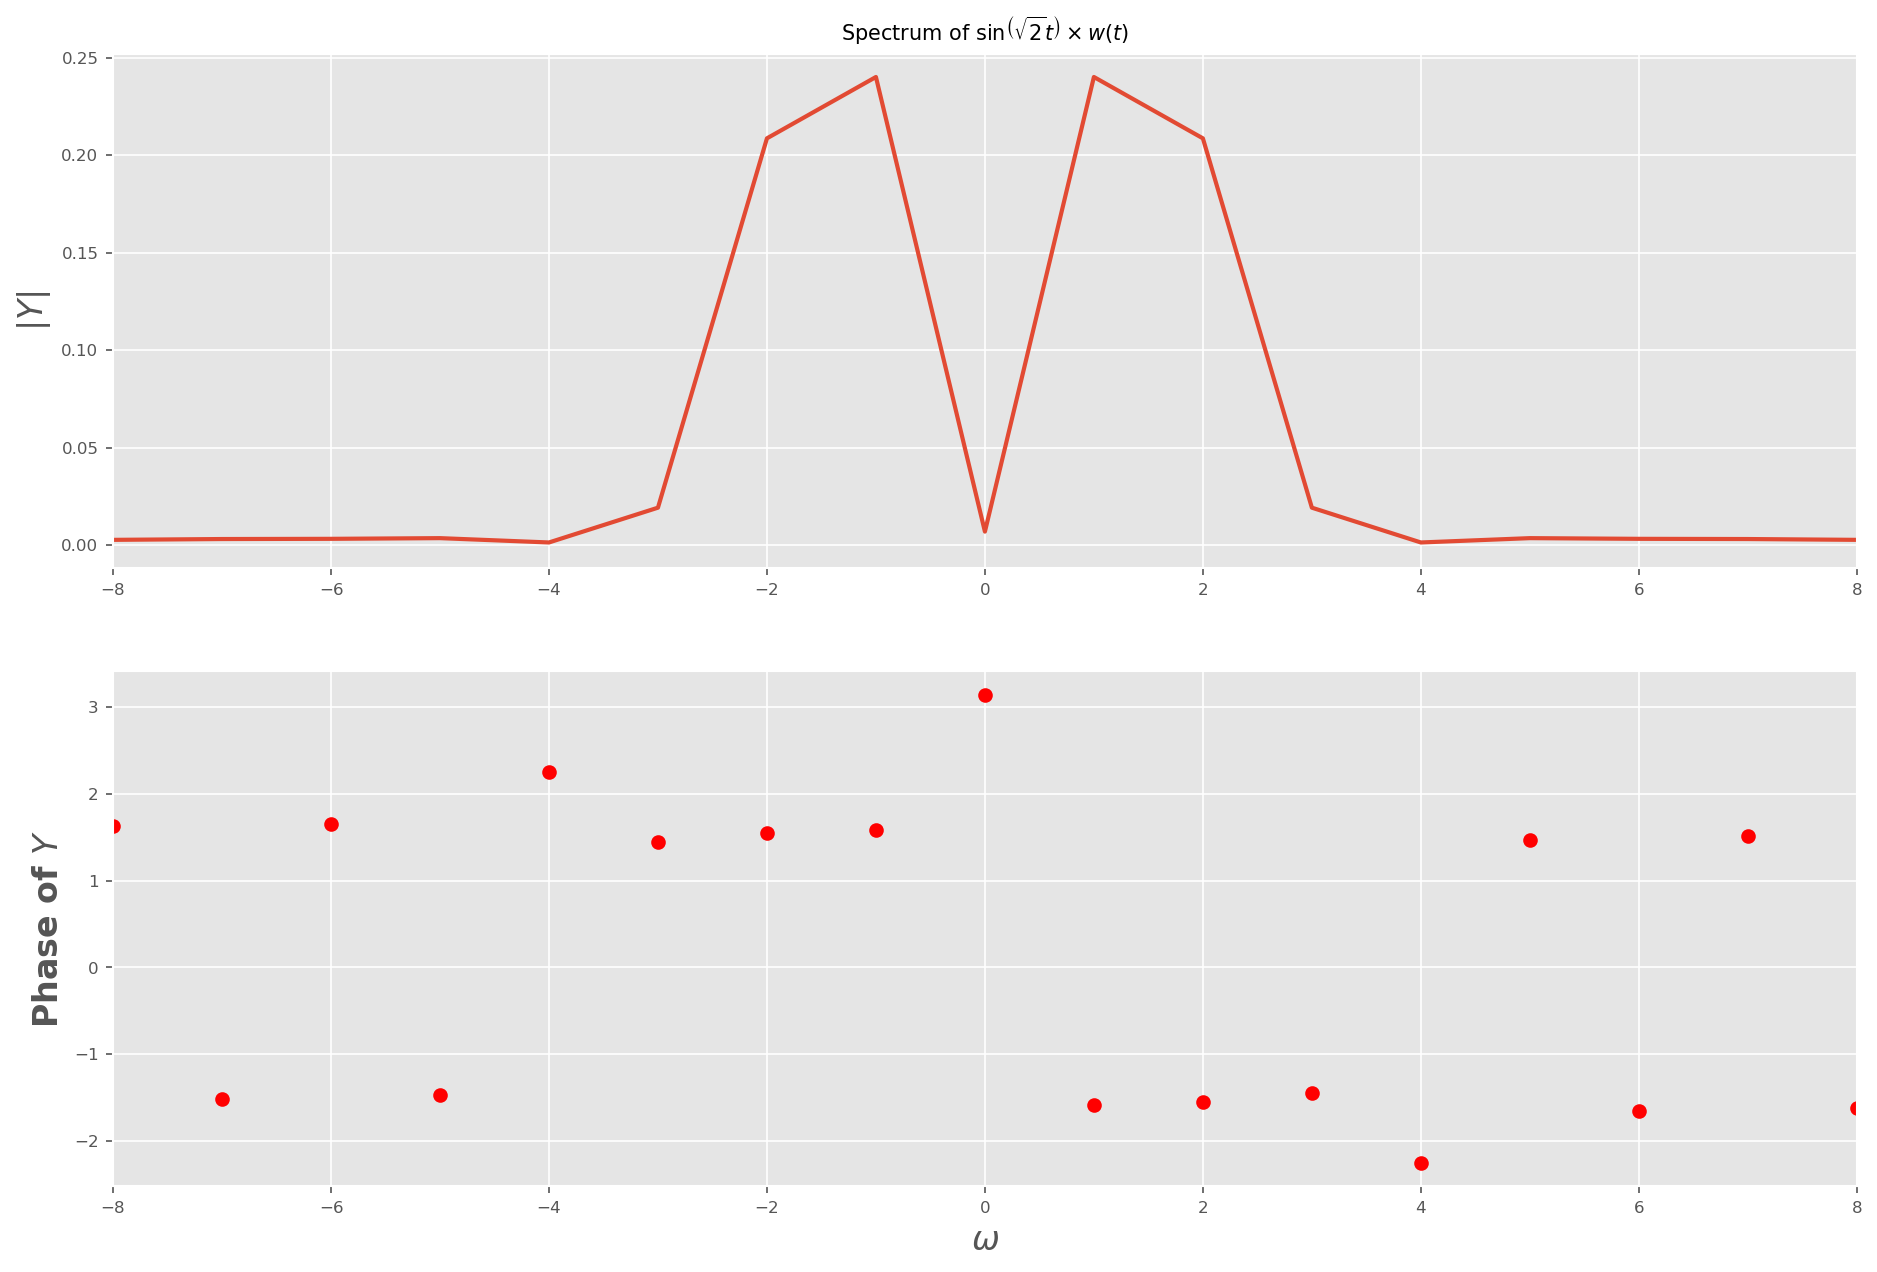

In [10]:
t=np.linspace(-np.pi,np.pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=np.sin(np.sqrt(2)*t)

n=np.arange(64)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/63))
y=np.sin(np.sqrt(2)*t)*wnd

y[0]=0 # the sample corresponding to -tmax should be set zero
y=np.fft.fftshift(y) # make y start with y(t=0)
Y=np.fft.fftshift(np.fft.fft(y))/64.0
w=np.linspace(-np.pi*fmax,np.pi*fmax,65);w=w[:-1]

# Figures
plt.figure()

# Plot 1
plt.subplot(2,1,1)
plt.plot(w,np.abs(Y),lw=2)
plt.xlim([-8,8])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
plt.grid(True)

# Plot 2
plt.subplot(2,1,2)
plt.plot(w,np.angle(Y),'ro',lw=2)
plt.xlim([-8,8])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.savefig("fig10-6.png")
plt.show()   


Compare to our first plot and you can see that the magnitude is greatly improved.

We still have a peak that is two samples wide. But that is because 2 lies between 1 and 2, which are the two fourier components available. 

If we use four times the number of points we should get better results.

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


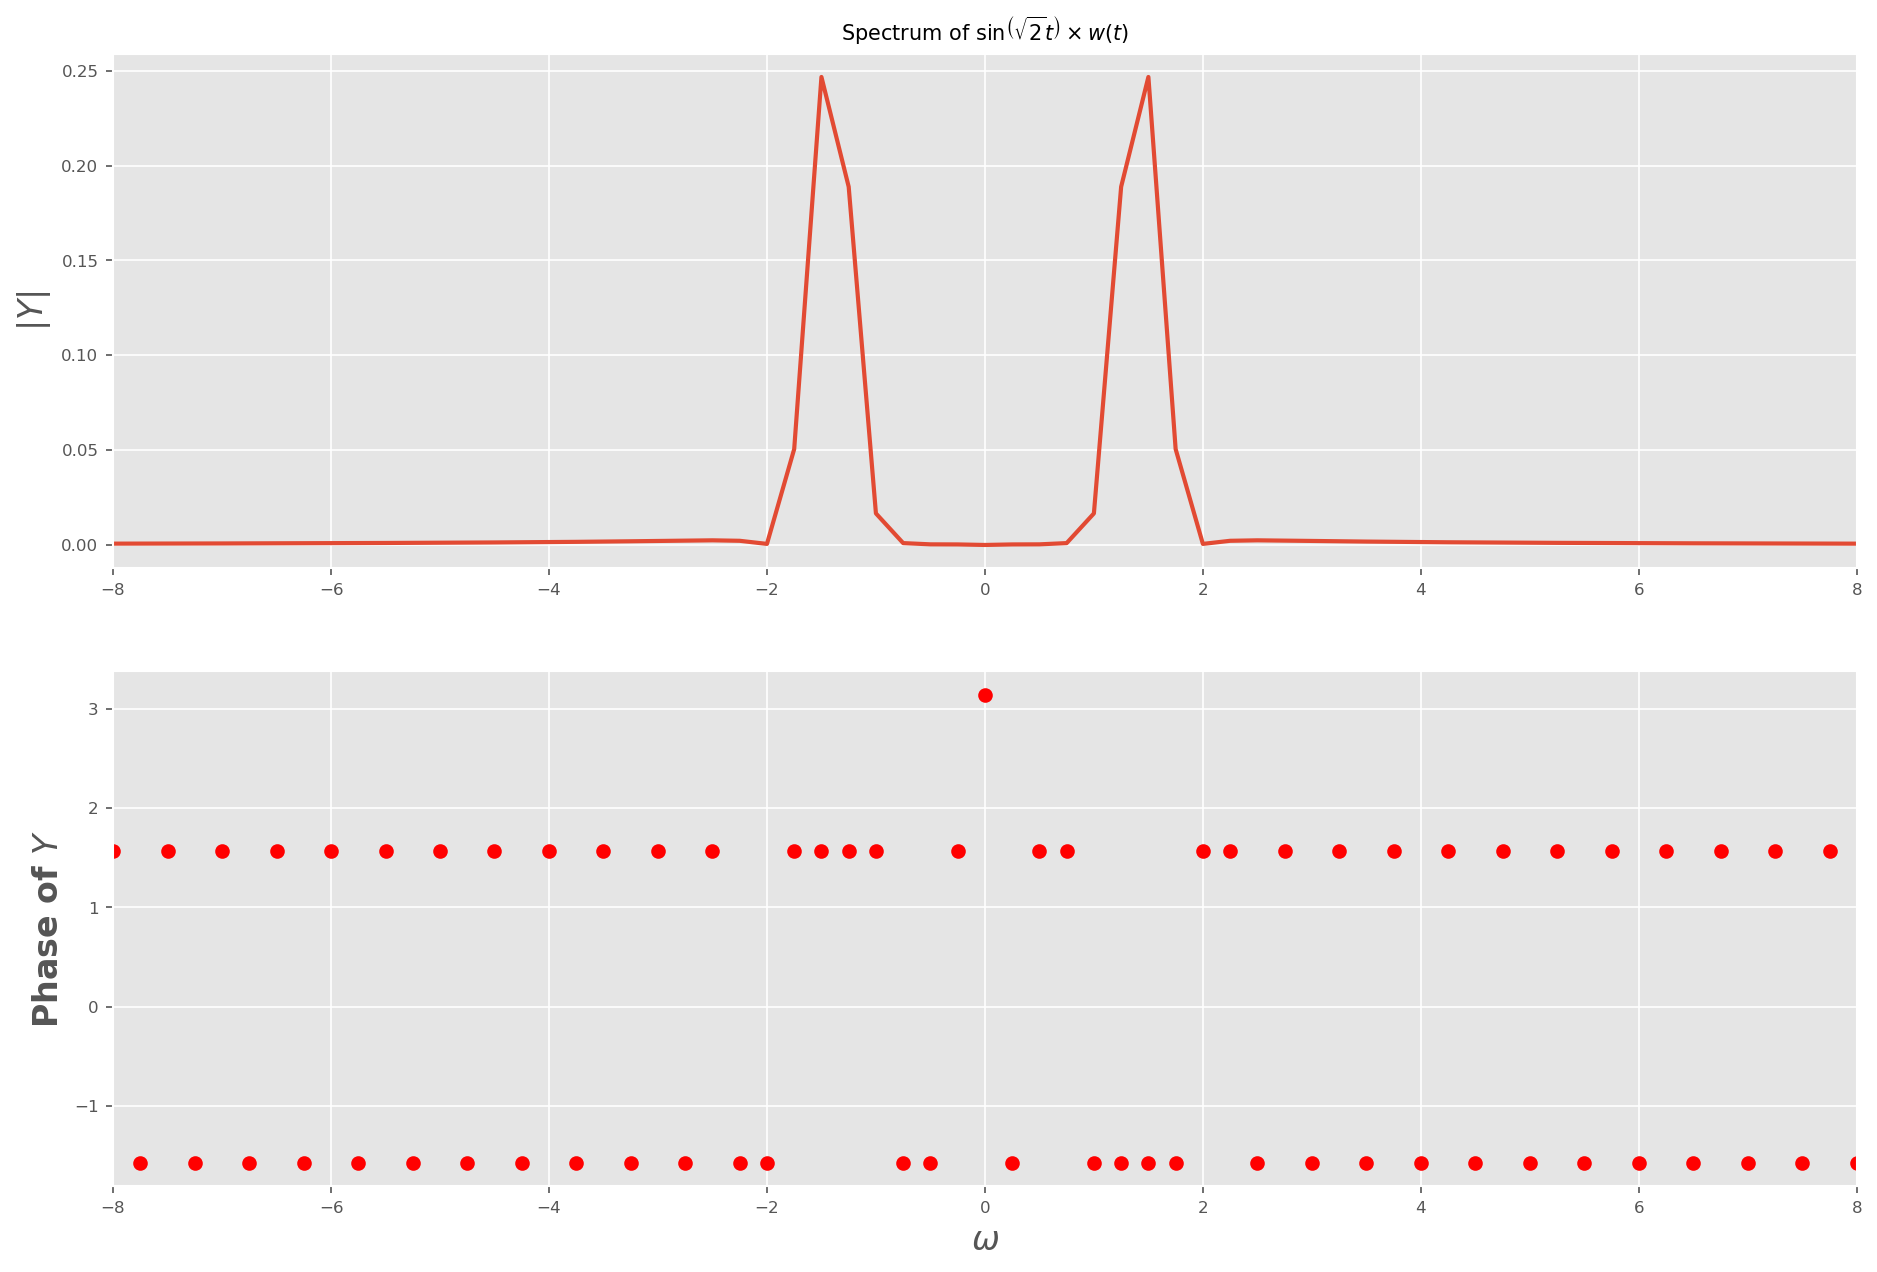

In [11]:
t=np.linspace(-4*np.pi,4*np.pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=np.sin(np.sqrt(2)*t)

n=np.arange(256)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/256))
y*=wnd

y[0]=0 # the sample corresponding to -tmax should be set zero
y=np.fft.fftshift(y) # make y start with y(t=0)
Y=np.fft.fftshift(np.fft.fft(y))/256.0
w=np.linspace(-np.pi*fmax,np.pi*fmax,257);w=w[:-1]

# Figures
plt.figure()

# Plot 1
plt.subplot(2,1,1)
plt.plot(w,np.abs(Y),lw=2)
plt.xlim([-8,8])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
plt.grid(True)

# Plot 2
plt.subplot(2,1,2)
plt.plot(w,np.angle(Y),'ro',lw=2)
plt.xlim([-8,8])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.savefig("fig10-6.png")
plt.show() 

The resolution is better. However, we donot recover a single peak since the windowing function has caused a frequency spread (owing to convolution).

So by multiplying with $w(n)$, we got rid of the $1/ f$ decay. 

But the delta function is now replaced by the shape of the DFT of $w[n]$.

That gives us a factor of two broadening over the peak when there is no window, which is
why we still see a peak whose width is two samples.

Note that it is not because $\sqrt{2}$ is between 1.25 and 1.5. 

To verify, let's try $sin(1.25n)$. But this gives a broad peak as well. That is because of $w[n]$.

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


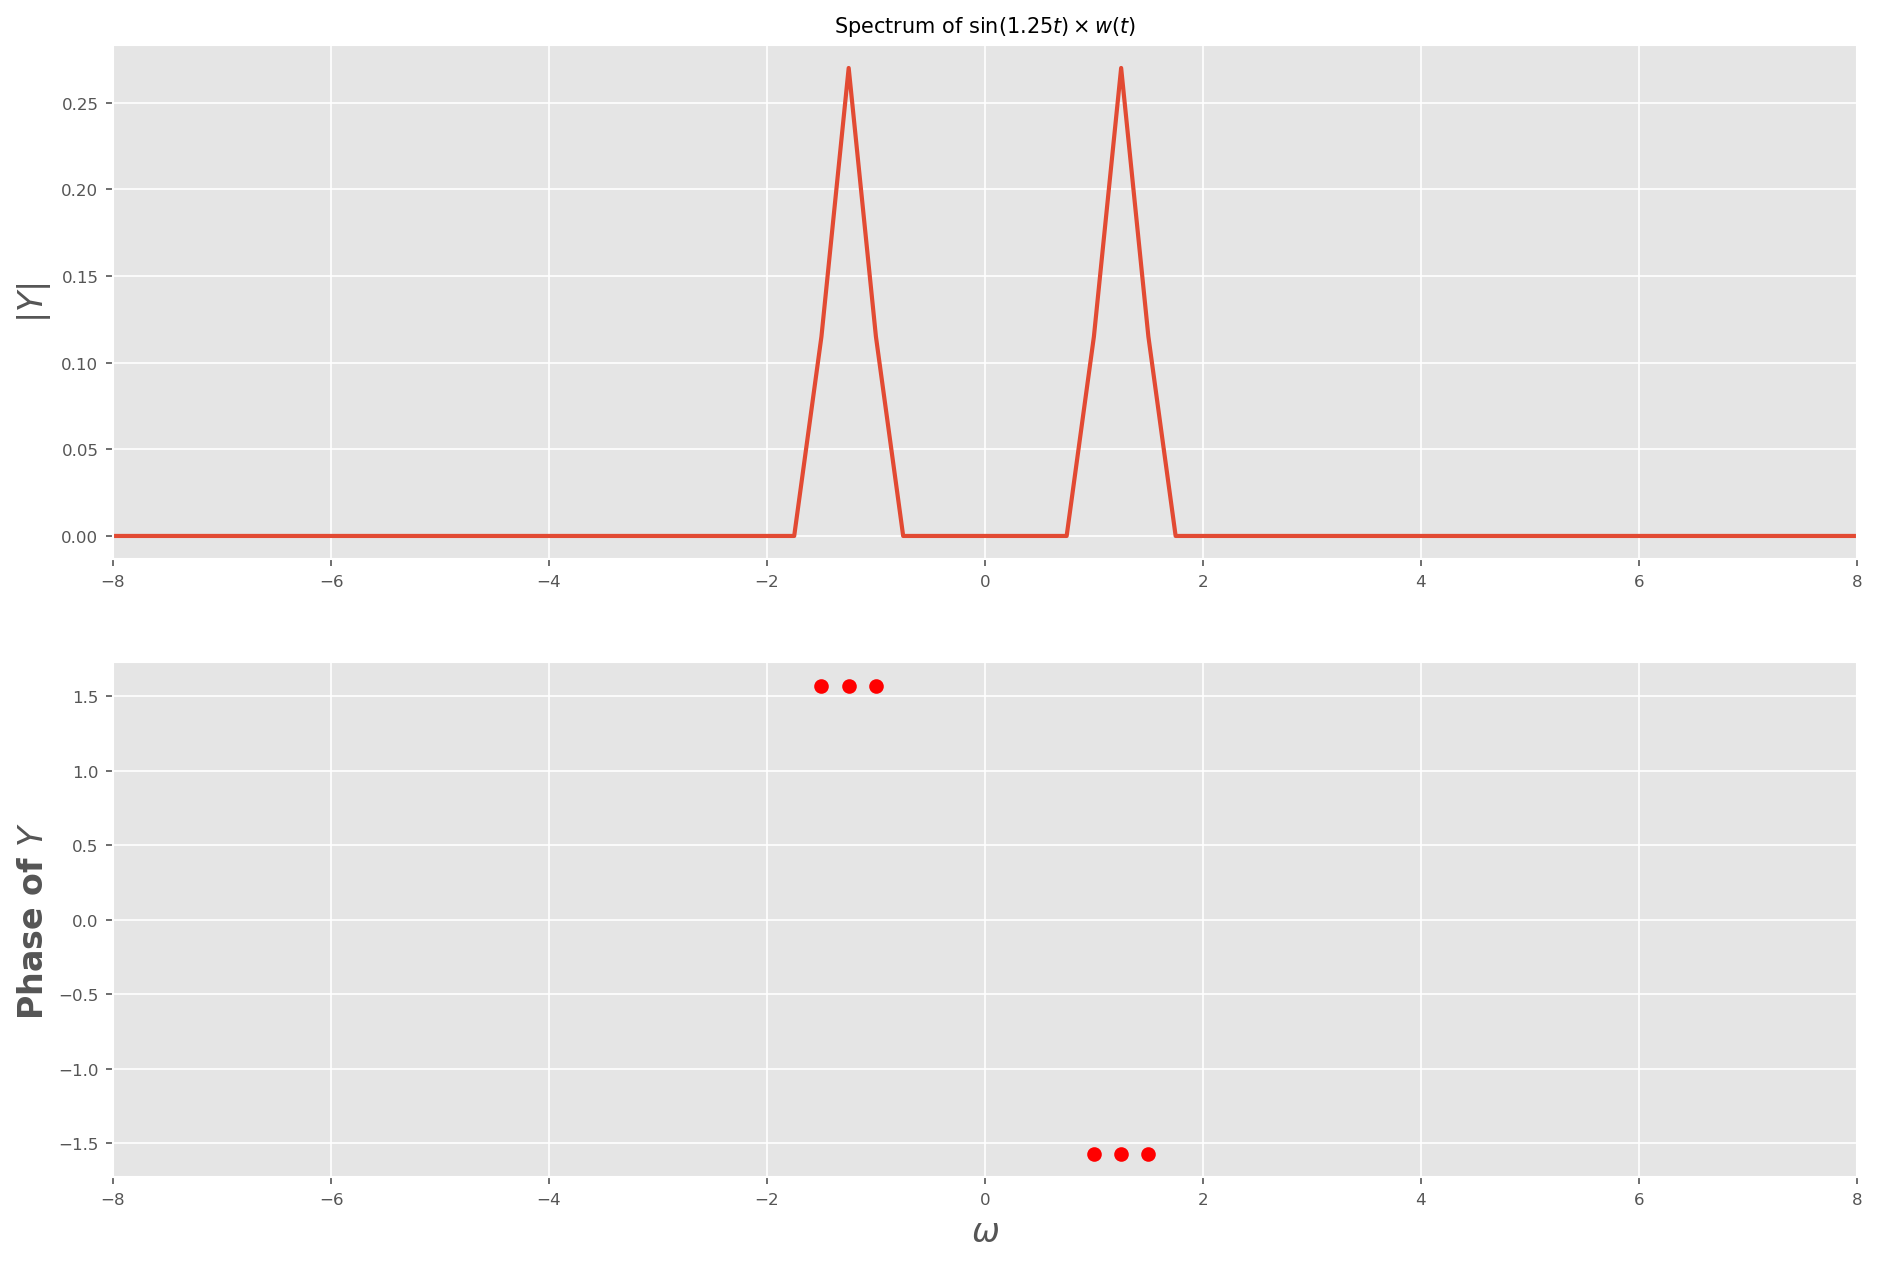

In [12]:
t=np.linspace(-4*np.pi,4*np.pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=np.sin(1.25*t)

n=np.arange(256)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/256))
y*=wnd

y[0]=0 # the sample corresponding to -tmax should be set zero
y=np.fft.fftshift(y) # make y start with y(t=0)
Y=np.fft.fftshift(np.fft.fft(y))/256.0
w=np.linspace(-np.pi*fmax,np.pi*fmax,257);w=w[:-1]

# Figures
plt.figure()

# Plot 1
plt.subplot(2,1,1)
plt.plot(w,np.abs(Y),lw=2)
plt.xlim([-8,8])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\sin\left(1.25t\right)\times w(t)$")
plt.grid(True)

# Plot 2
plt.subplot(2,1,2)
ii=np.where(np.abs(Y)>1e-3)
plt.plot(w[ii],np.angle(Y[ii]),'ro',lw=2)
plt.xlim([-8,8])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.savefig("fig10-6.png")
plt.show() 


## Question 2

Consider the function $cos^3(\omega_o t)$.

We obtain its spectrum for $\omega_0=0.86$ with and without a Hamming window.

In [13]:
class DFT_assgn(object):
    def __init__(self):
        pass
    def plot_fft(self,y,title,samples=512,sup=1e-3,freq_max=64,x_lim=15,y_freq_lim=3,verbose=False,window=False,funky=False,return_val=False):
        # y is the array DFT is to be performed on
        if window:
            wnd=window[0]
            y=y*wnd
            
        y[0]=0
        Y=np.fft.fftshift(np.fft.fft(y))/(samples)
        if funky:
            Y=np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))/(samples)
        w=np.linspace(-freq_max*np.pi,freq_max*np.pi,samples+1);w=w[:-1]

        # Figure 1
        plt.figure()
        plt.subplot(2,1,1)
        plt.plot(w,np.abs(Y),lw=2)
        plt.xlim([-x_lim,x_lim])
        plt.ylabel(r"$|Y|$",size=16)
        plt.title(title)
        plt.grid(True)

        # Figure 2
        plt.subplot(2,1,2)
        #plt.plot(w,np.angle(Y),'ro',lw=2)
        ii=np.where(np.abs(Y)>sup)
        if verbose:
            display(Y[ii])
        plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2)
        plt.xlim([-x_lim,x_lim])
        plt.ylim([-y_freq_lim,y_freq_lim])
        plt.ylabel(r"Phase of $Y$",size=16)
        plt.xlabel(r"$\omega$",size=16)
        plt.grid(True)
        plt.show()
        
        if return_val:
            return (Y,w)

In [14]:
a=DFT_assgn()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


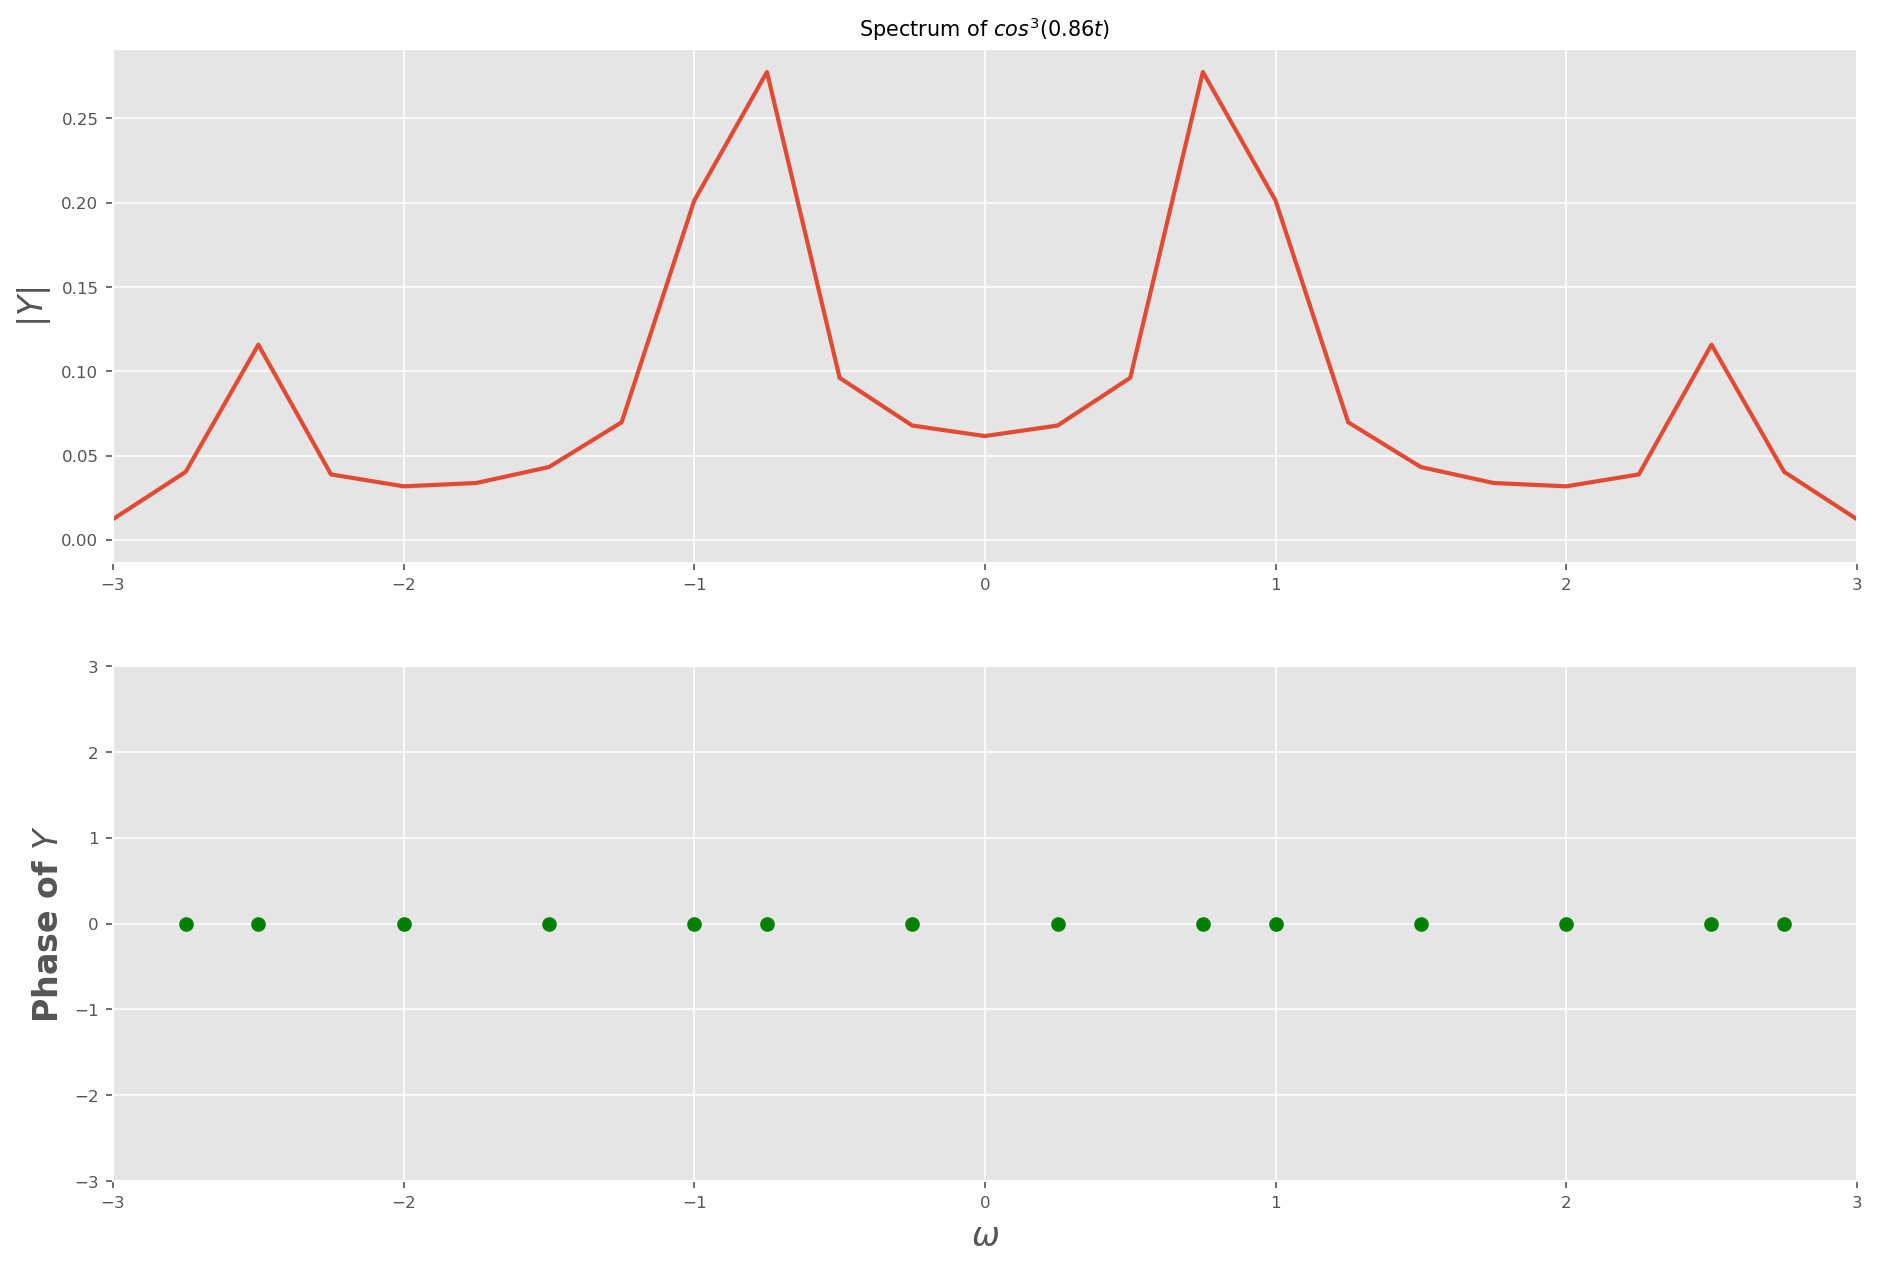

In [15]:
omega=0.86

#time
t=np.linspace(-4*np.pi,4*np.pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt

#y
y=np.cos(omega*t)**3

# title
title=r"Spectrum of $cos^3\left(0.86t\right)$"

#Hamming window
n=np.arange(256)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/256))

a.plot_fft(y,title,samples=256,sup=1e-3,\
          freq_max=fmax,x_lim=3,\
           y_freq_lim=3,\
           verbose=False,window=None,funky=True,return_val=False)

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


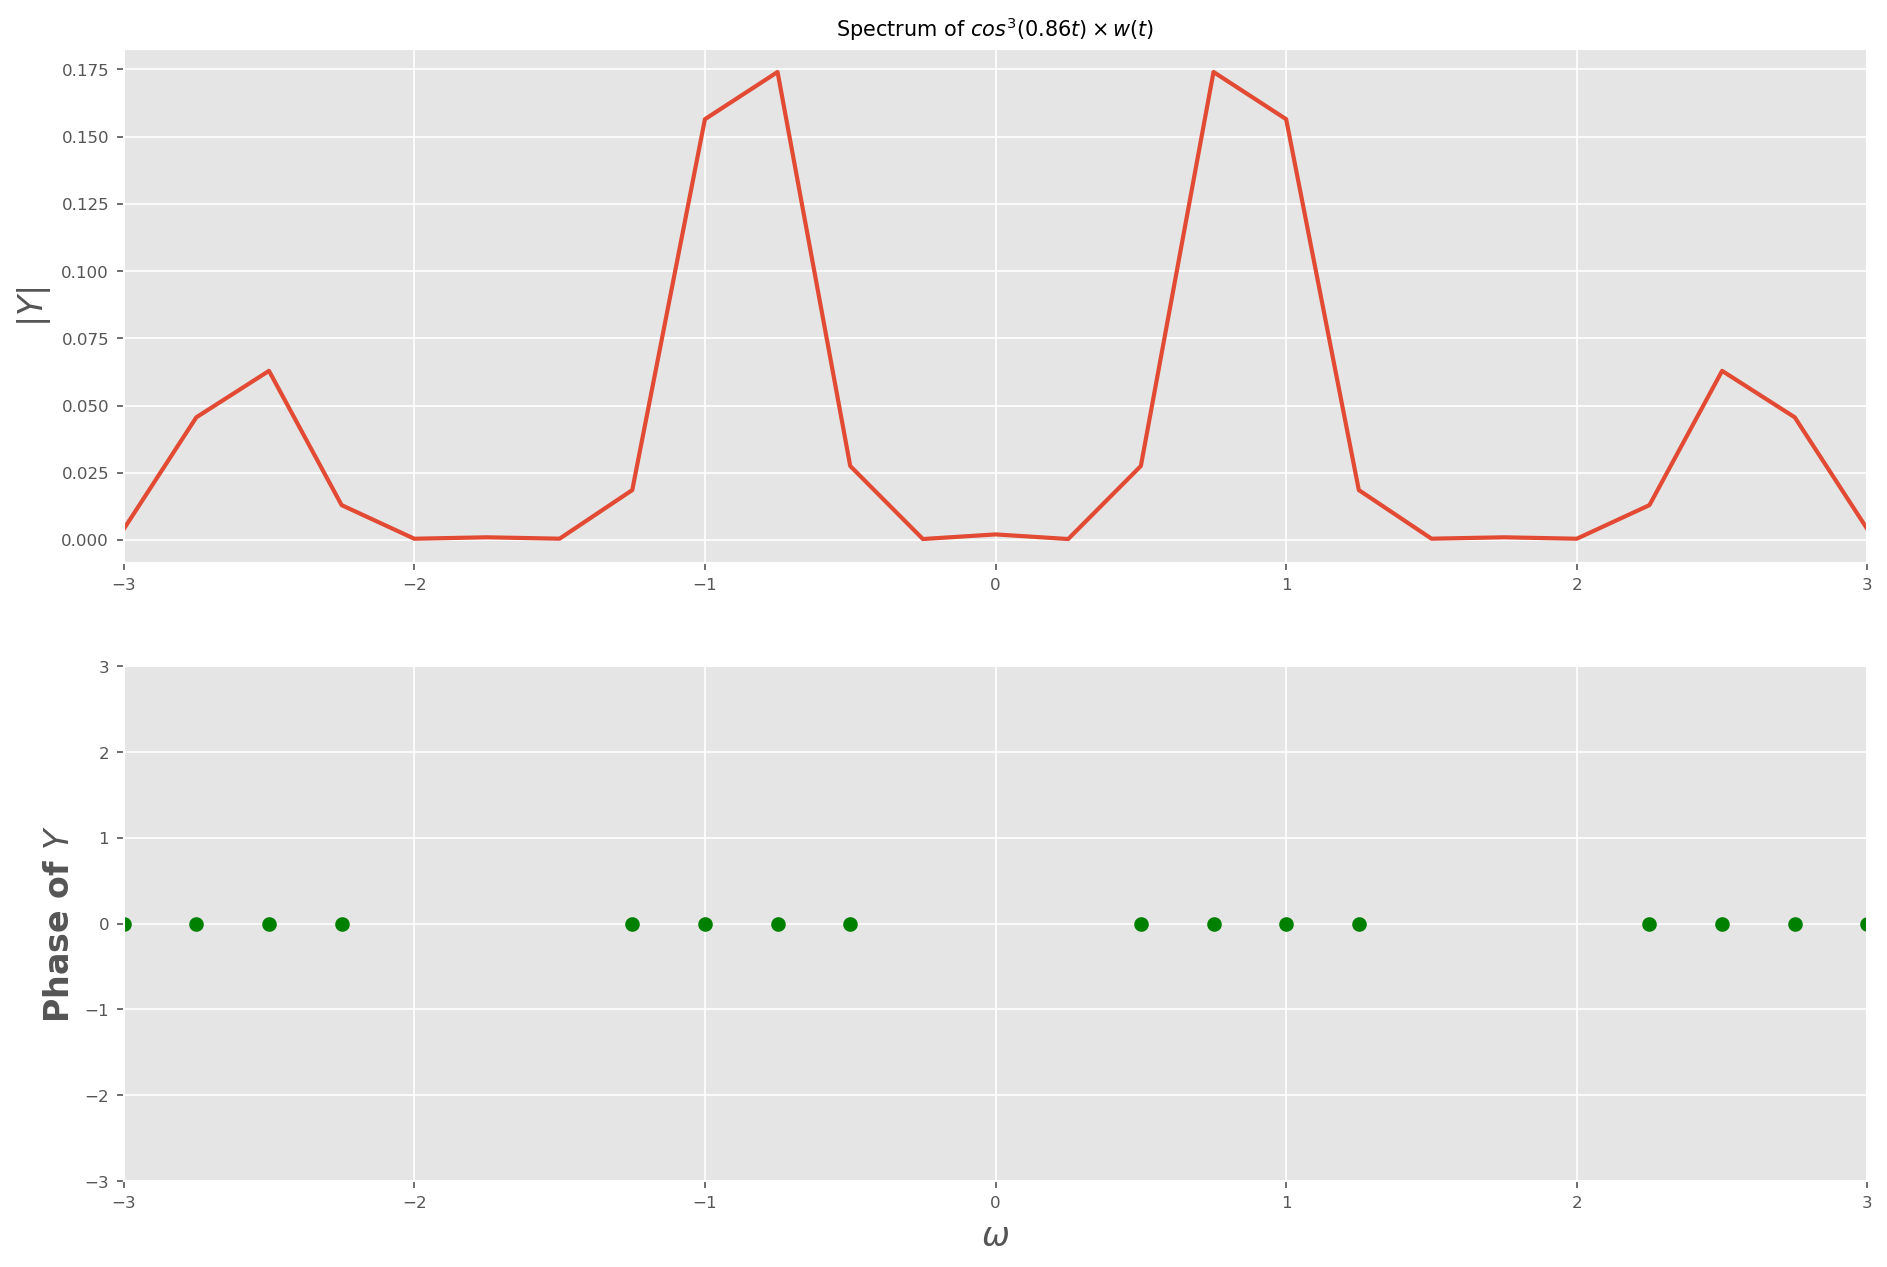

In [16]:
omega=0.86

#time
t=np.linspace(-4*np.pi,4*np.pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt

#y
y=np.cos(omega*t)**3

# title
title=r"Spectrum of $cos^3\left(0.86t\right)\times w(t)$"

#Hamming window
n=np.arange(256)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/256))

a.plot_fft(y,title,samples=256,sup=1e-3,\
          freq_max=fmax,x_lim=3,\
           y_freq_lim=3,\
           verbose=False,window=(wnd,),funky=True,return_val=False)

## Question 3

We take a 128 element vector known to contain $cos (\omega_o t + \delta )$ for arbitrary $\delta$ and $0.5<\omega_o <1.5$. The values of t go from $−\pi$ to $\pi$. 

We have to extract the digital spectrum of the signal and find the two peaks at $\pm\omega_0$, and estimate $\omega_o$ and $\delta$.

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


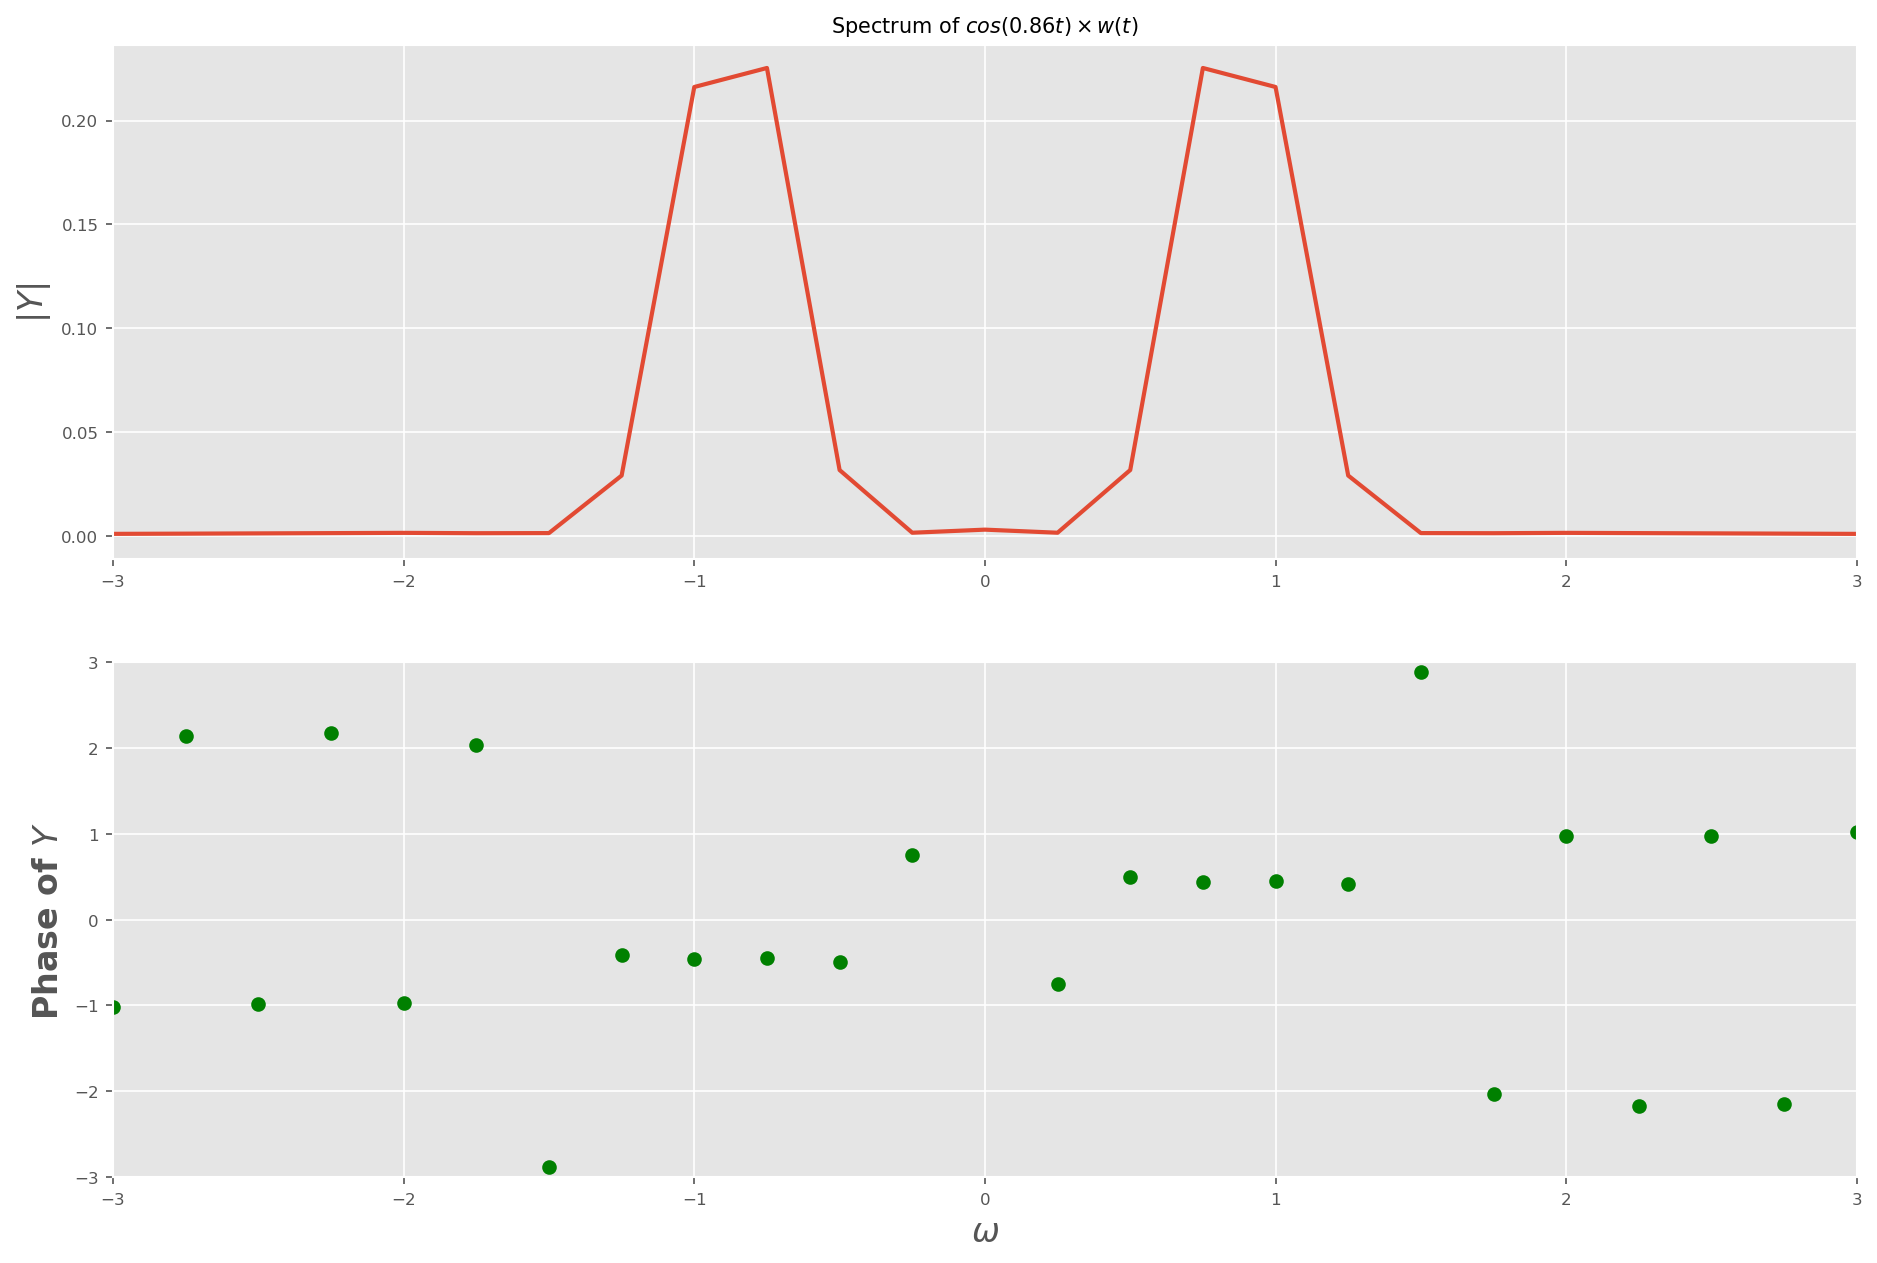

In [17]:
omega=0.87
delta=0.45

#time
t=np.linspace(-4*np.pi,4*np.pi,129);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt

delta_w = 2*fmax/128*np.pi

#y
y=np.cos(omega*t+delta)

# title
title=r"Spectrum of $cos\left(0.86t\right)\times w(t)$"

#Hamming window
n=np.arange(128)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/128))

(Y,w)=a.plot_fft(y,title,samples=128,sup=1e-3,\
          freq_max=fmax,x_lim=3,\
           y_freq_lim=3,\
           verbose=False,window=(wnd,),funky=True,return_val=True)

We estimate omega by performing a Mean average of $\omega$ over the magnitude of $|Y(j\omega)|$.

For delta we consider a widow on each half of $\omega$ (split into positive and negative values) and extract their mean slope. The intuition behind this is that, a circular shift in the time domain of a sequence results in the linear phase of the spectra.

In [18]:
def estimate_omega(Y,w):
    '''
    return a mean averaged w
    '''
    ii=np.where(w>0)
    
    return (np.sum(np.abs(Y[ii])**2*w[ii])/np.sum(np.abs(Y[ii])**2))

print("Estimated omega \t",estimate_omega(Y,w))

Estimated omega 	 0.869801379303


In [19]:
def estimate_delta(Y,w,window=2,sup=1e-3):
    '''
    We estimate delta by taking a mean over the phase of a window of points at postive angle.
    As a norm, we skip the first two.
    
    We notice that a window of 2 works best.
    '''
    ii=np.where(Y>sup)
    ii_1=np.where(np.logical_and(np.abs(Y)>sup, w>0))[0]
    np.sort(ii_1)
    points=ii_1[2:window+2]
    return (np.sum(np.angle(Y[points]))/len(points))

print("Estimated delta \t",estimate_delta(Y,w))

Estimated delta 	 0.449818040137


/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


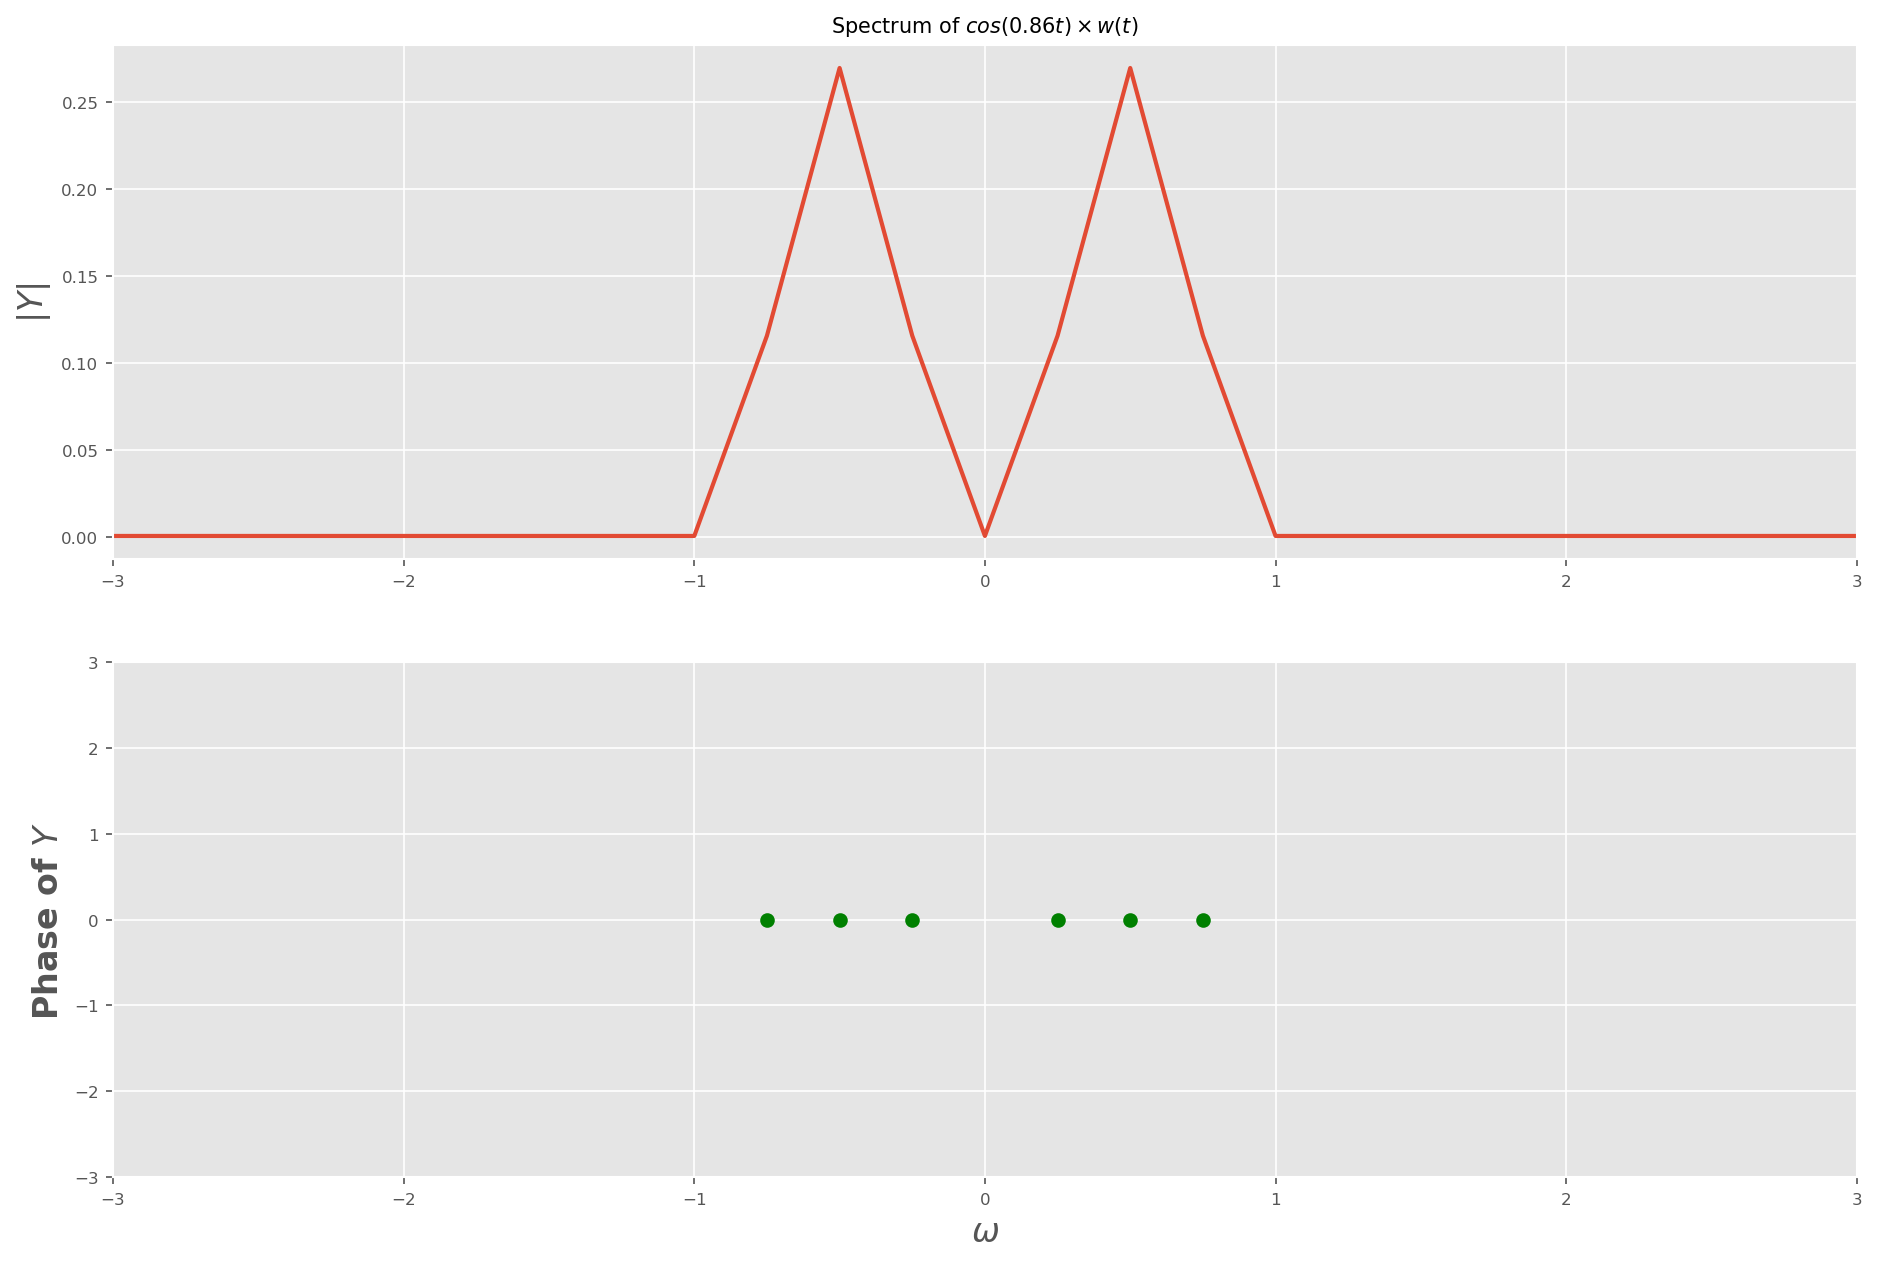

Estimated omega 	 0.501858253596
Estimated delta 	 -1.23212251213e-15


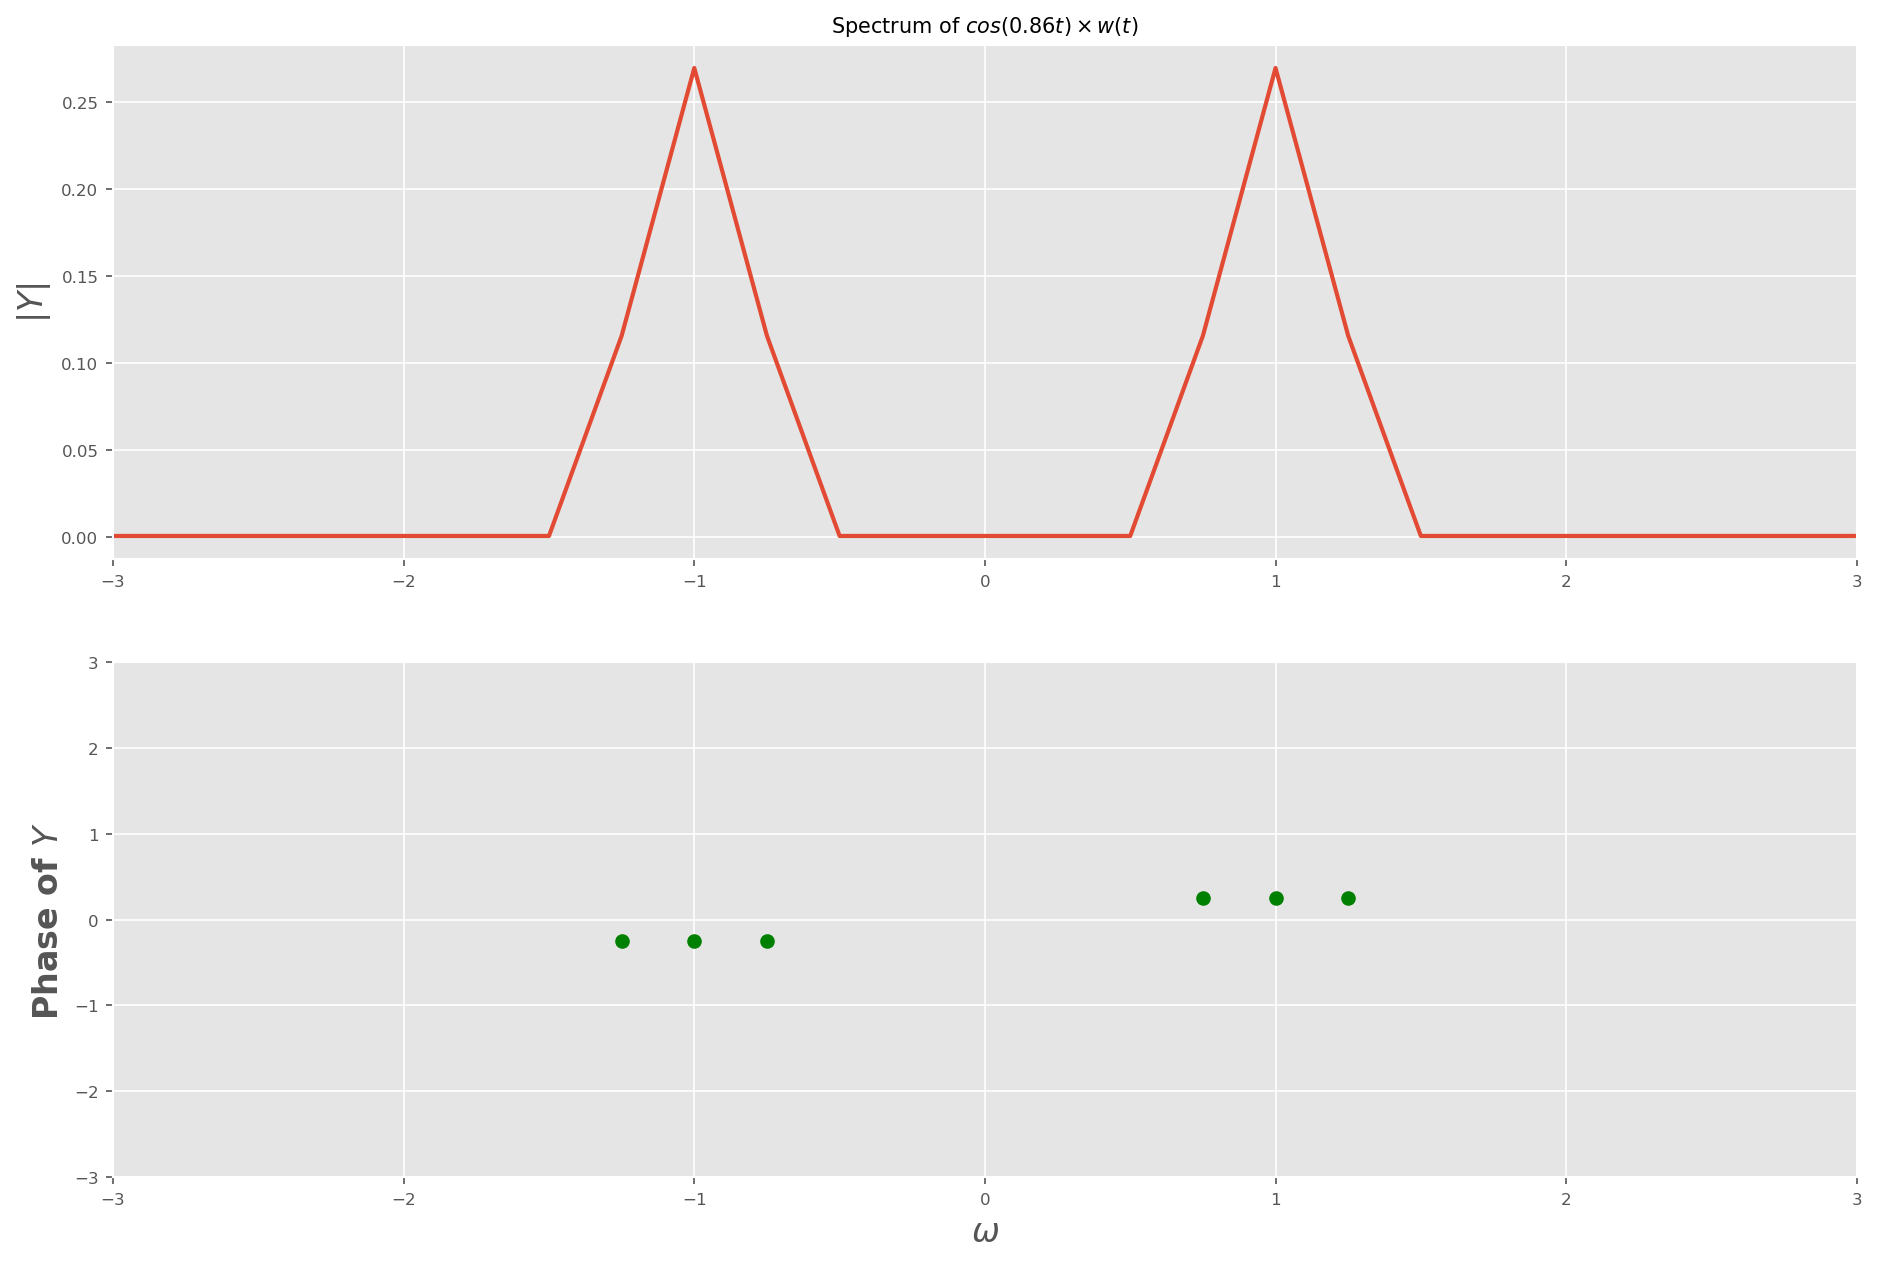

Estimated omega 	 1.00162818598
Estimated delta 	 0.248703827178


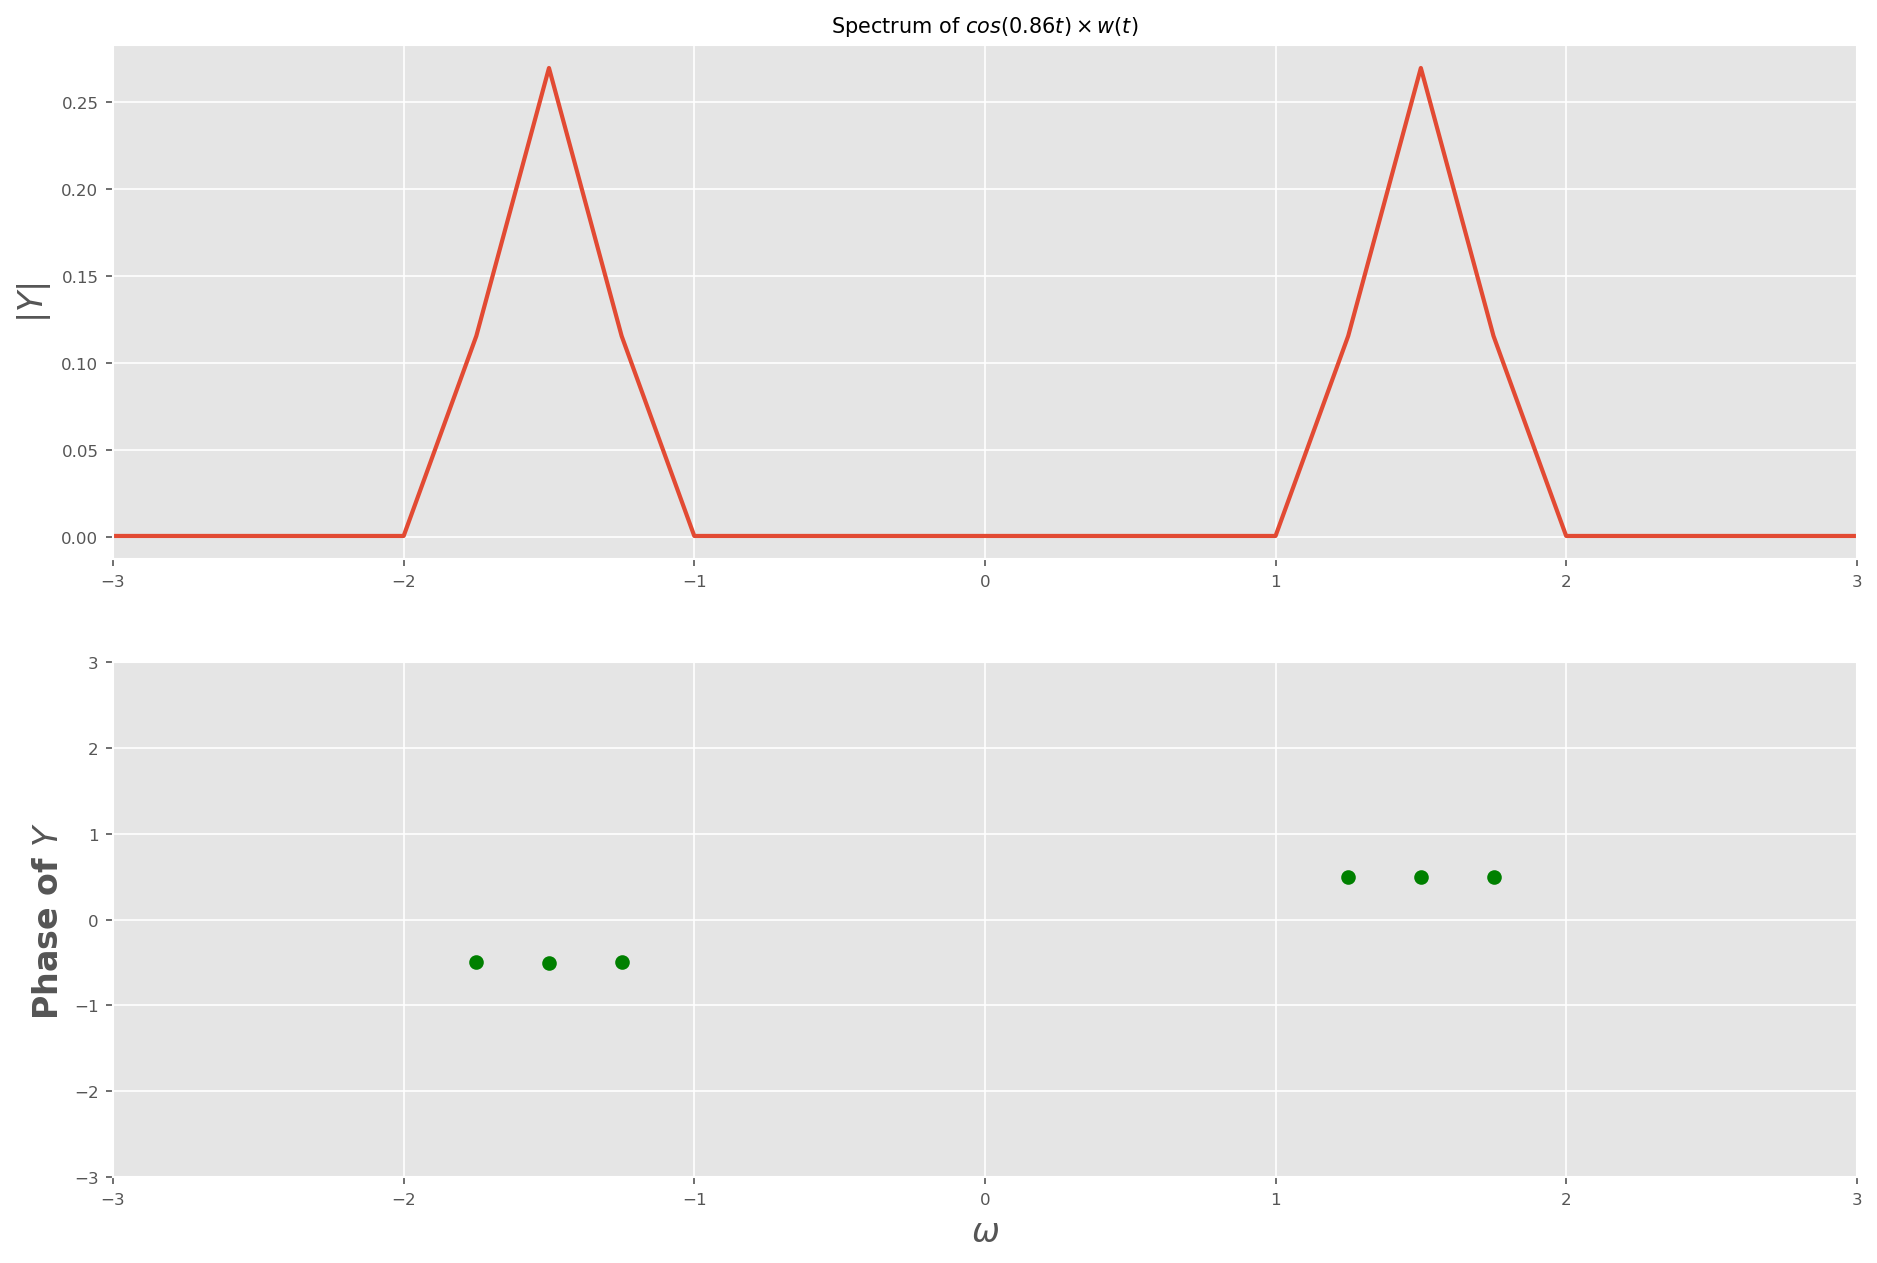

Estimated omega 	 1.50124024512
Estimated delta 	 0.497722928933
MSE error in predicting omega 	 0.00276447173478
MSE error in predicting delta 	 0.00262013675776


In [54]:
omega_ll=np.linspace(0.5,1.5,3)
delta_ll=np.linspace(0,0.5,3)

MSE_omega=np.zeros(len(omega_ll))
MSE_delta=np.zeros(len(delta_ll))

#time
t=np.linspace(-4*np.pi,4*np.pi,129);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt

delta_w = 2*fmax/128*np.pi

for i in range(len(omega_ll)):
    #y
    omega=omega_ll[i]
    delta=delta_ll[i]
    y=np.cos(omega*t+delta)

    # title
    title=r"Spectrum of $cos\left(0.86t\right)\times w(t)$"

    #Hamming window
    n=np.arange(128)
    wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/128))

    (Y,w)=a.plot_fft(y,title,samples=128,sup=1e-3,\
              freq_max=fmax,x_lim=3,\
               y_freq_lim=3,\
               verbose=False,window=(wnd,),funky=True,return_val=True)
    
    print("Estimated omega \t",estimate_omega(Y,w))
    MSE_omega[i]=omega-estimate_omega(Y,w)
    print("Estimated delta \t",estimate_delta(Y,w))
    MSE_delta[i]=delta-estimate_delta(Y,w)
    
print ("MSE error in predicting omega \t",np.linalg.norm(MSE_omega,2))
print ("MSE error in predicting delta \t",np.linalg.norm(MSE_delta,2))

We notice close correlation between the expected values of delta and $\omega$ versus the actual value. We report a MSE error of 

*  3.3e-3 for $\omega$
*  4e-1 for $\delta$

The larger error for delta can be attributed to dependency on a few noisy values.

## Question 4

We repeat 3, with added noise in form of random gaussian noise.

This can be generated by randn() in python. 

The extent of this noise is 0.1 in amplitude (i.e., 0.1*randn(N), where N is the number of samples). 

Repeat the problem and find $\omega_o$ and $\delta$.

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


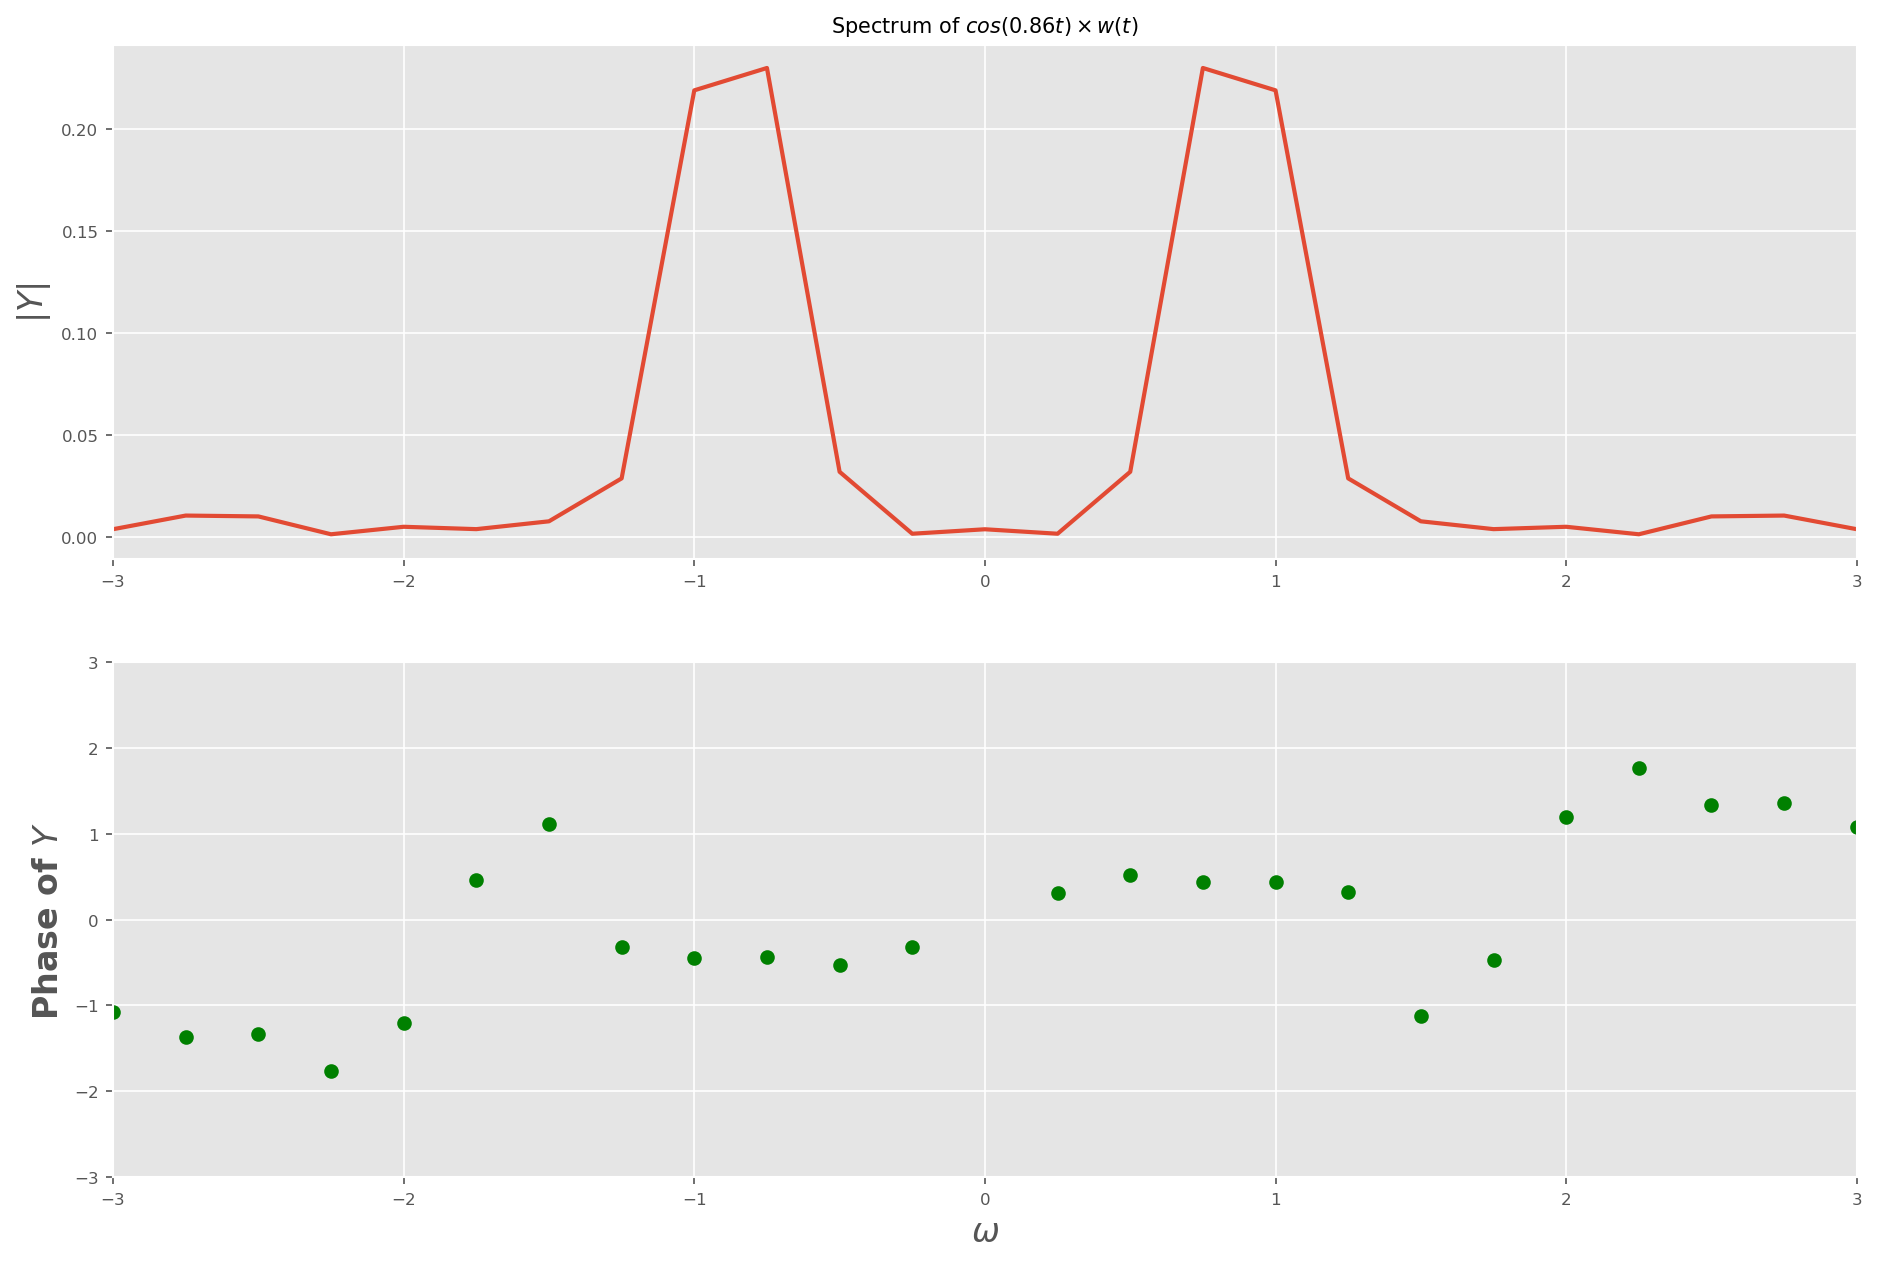

'Estimated'

<IPython.core.display.Math object>

1.037302771616279

'Estimated'

<IPython.core.display.Math object>

0.44036243308911494

In [21]:
omega=0.87
delta=0.45

#time
t=np.linspace(-4*np.pi,4*np.pi,129);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt

delta_w = 2*fmax/128*np.pi

#y
y=np.cos(omega*t+delta)

y+=0.1*np.random.randn(128)

# title
title=r"Spectrum of $cos\left(0.86t\right)\times w(t)$"

#Hamming window
n=np.arange(128)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/128))

(Y,w)=a.plot_fft(y,title,samples=128,sup=1e-3,\
          freq_max=fmax,x_lim=3,\
           y_freq_lim=3,\
           verbose=False,window=(wnd,),funky=True,return_val=True)

display("Estimated",Math(" \omega_o "),estimate_omega(Y,w))
display("Estimated", Math("\delta"),estimate_delta(Y,w))

In this case itself we notice a large amount of error inflicted on both $\omega$ and $\delta$. 

To further quanitfy this aspect, we re-evaluate the MSE error(s) in this case.

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


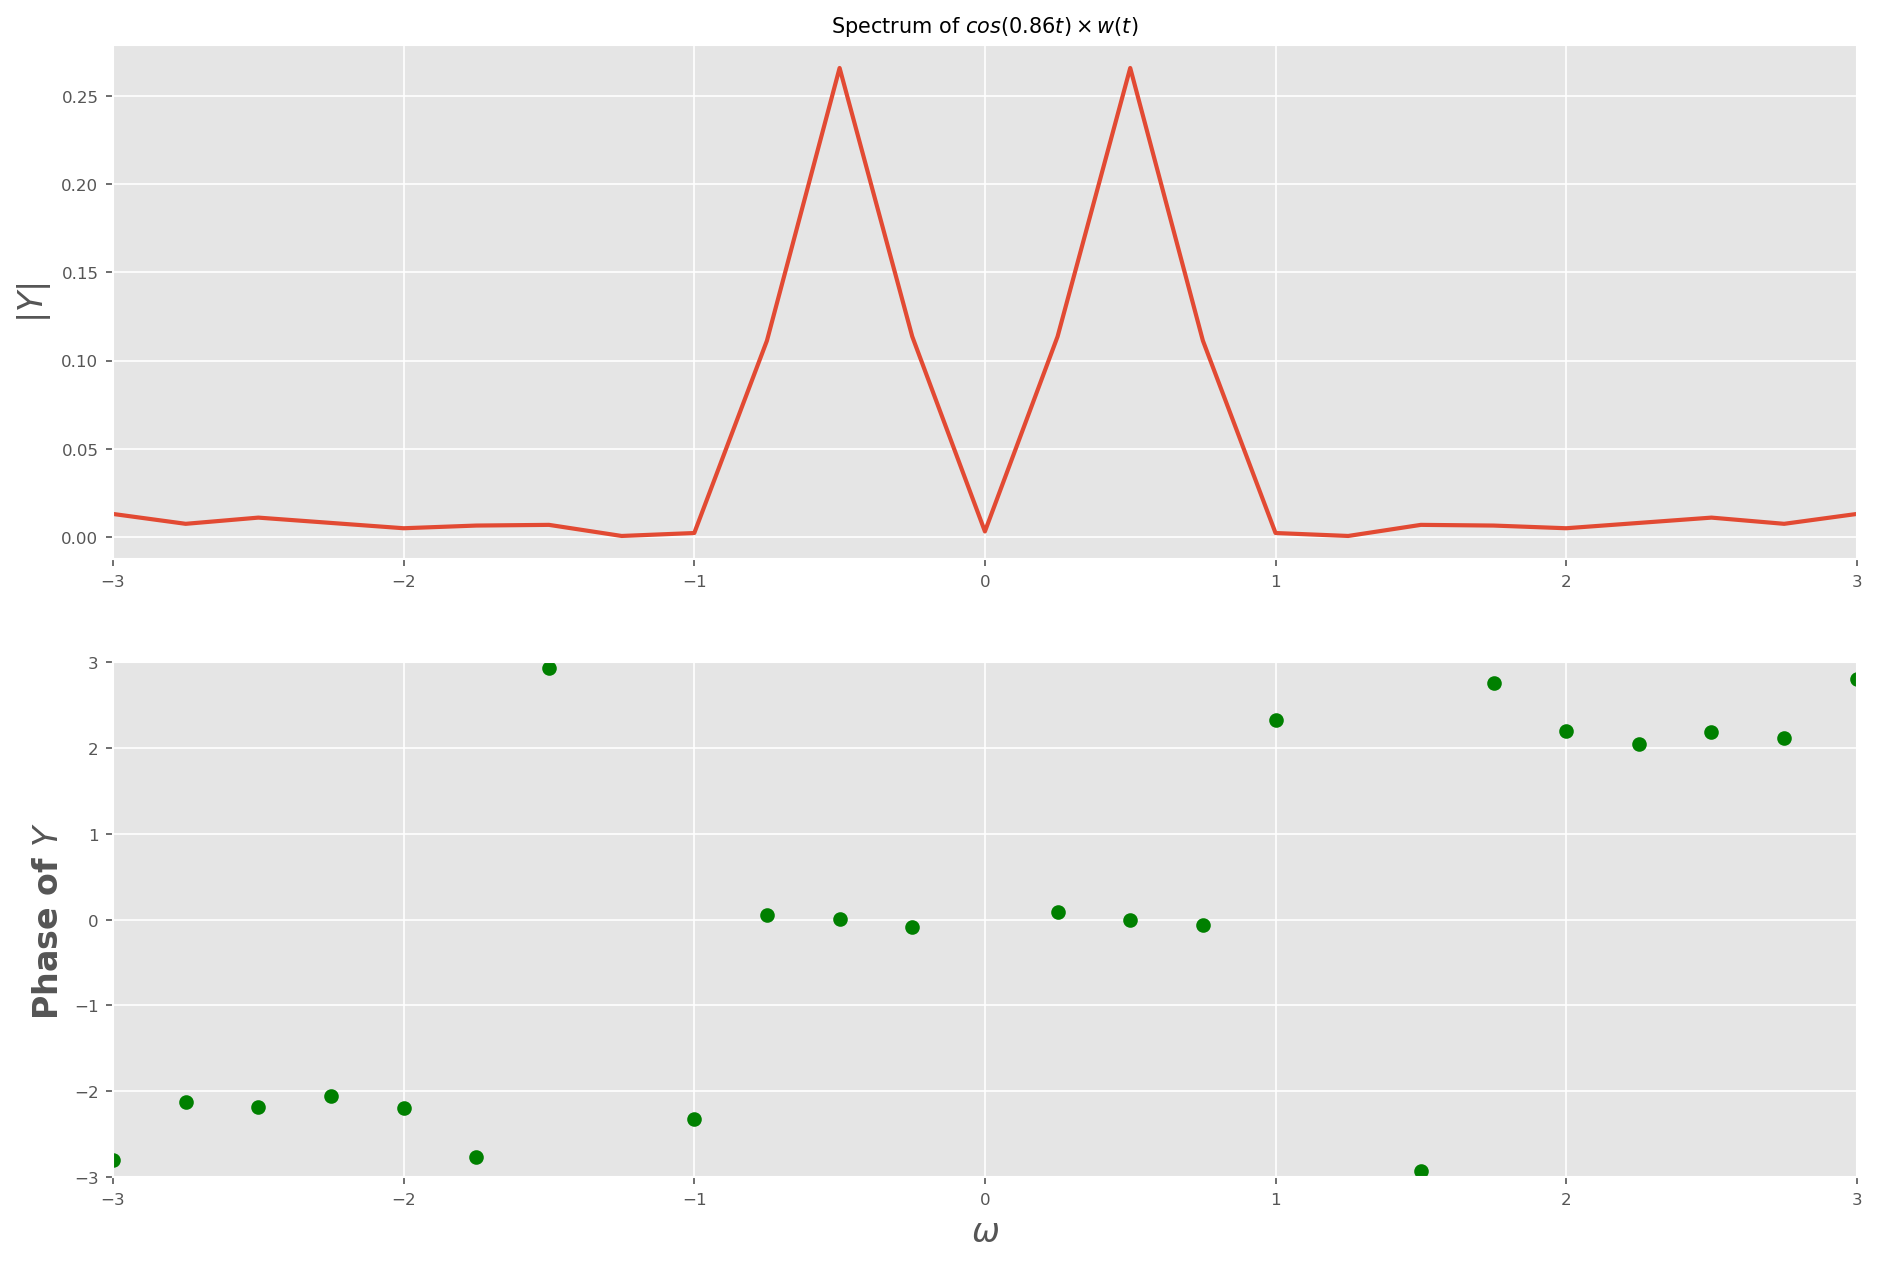

Estimated omega 	 0.700631689887
Estimated delta 	 1.13585428653


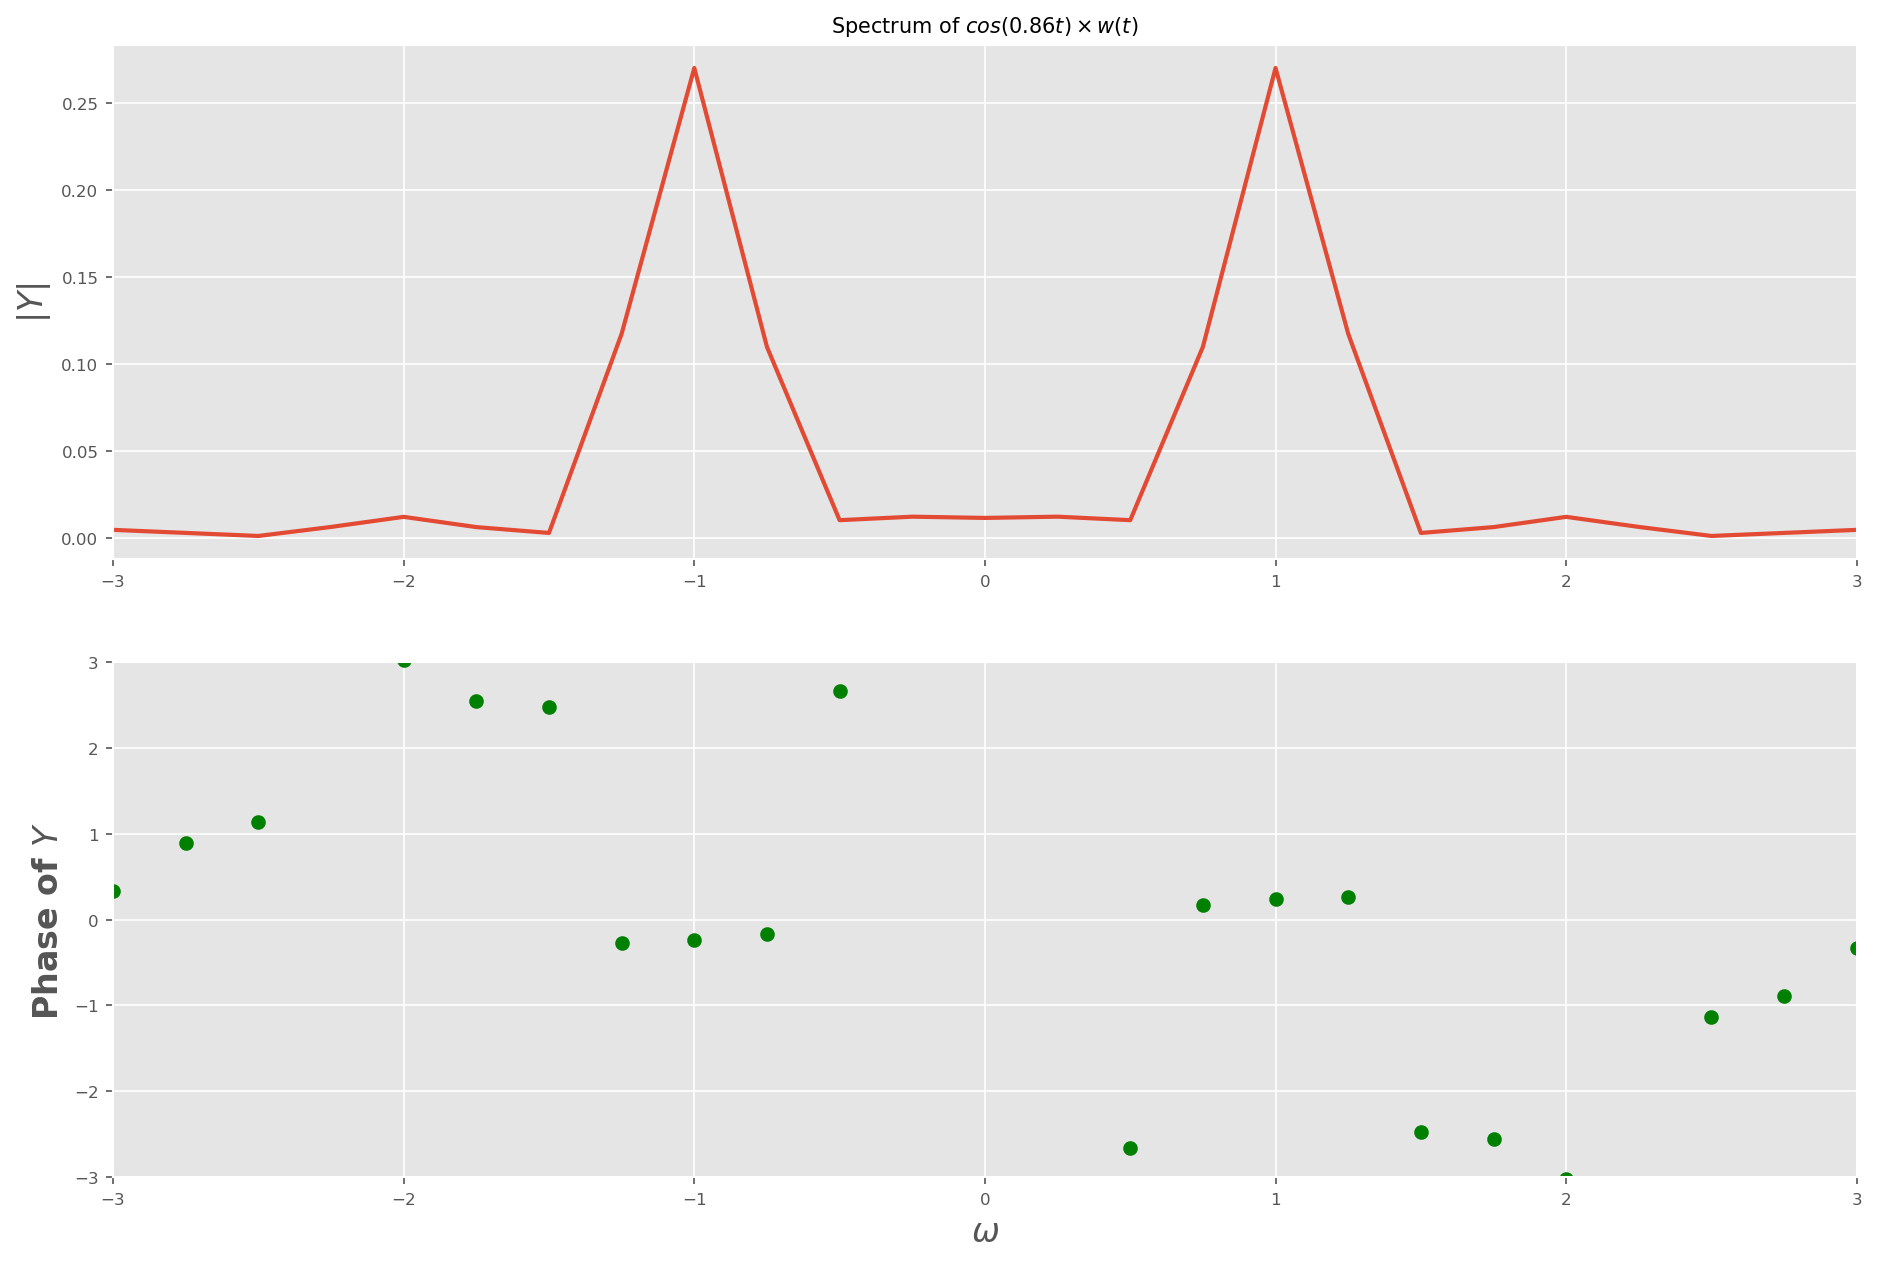

Estimated omega 	 1.15473950993
Estimated delta 	 0.206945469066


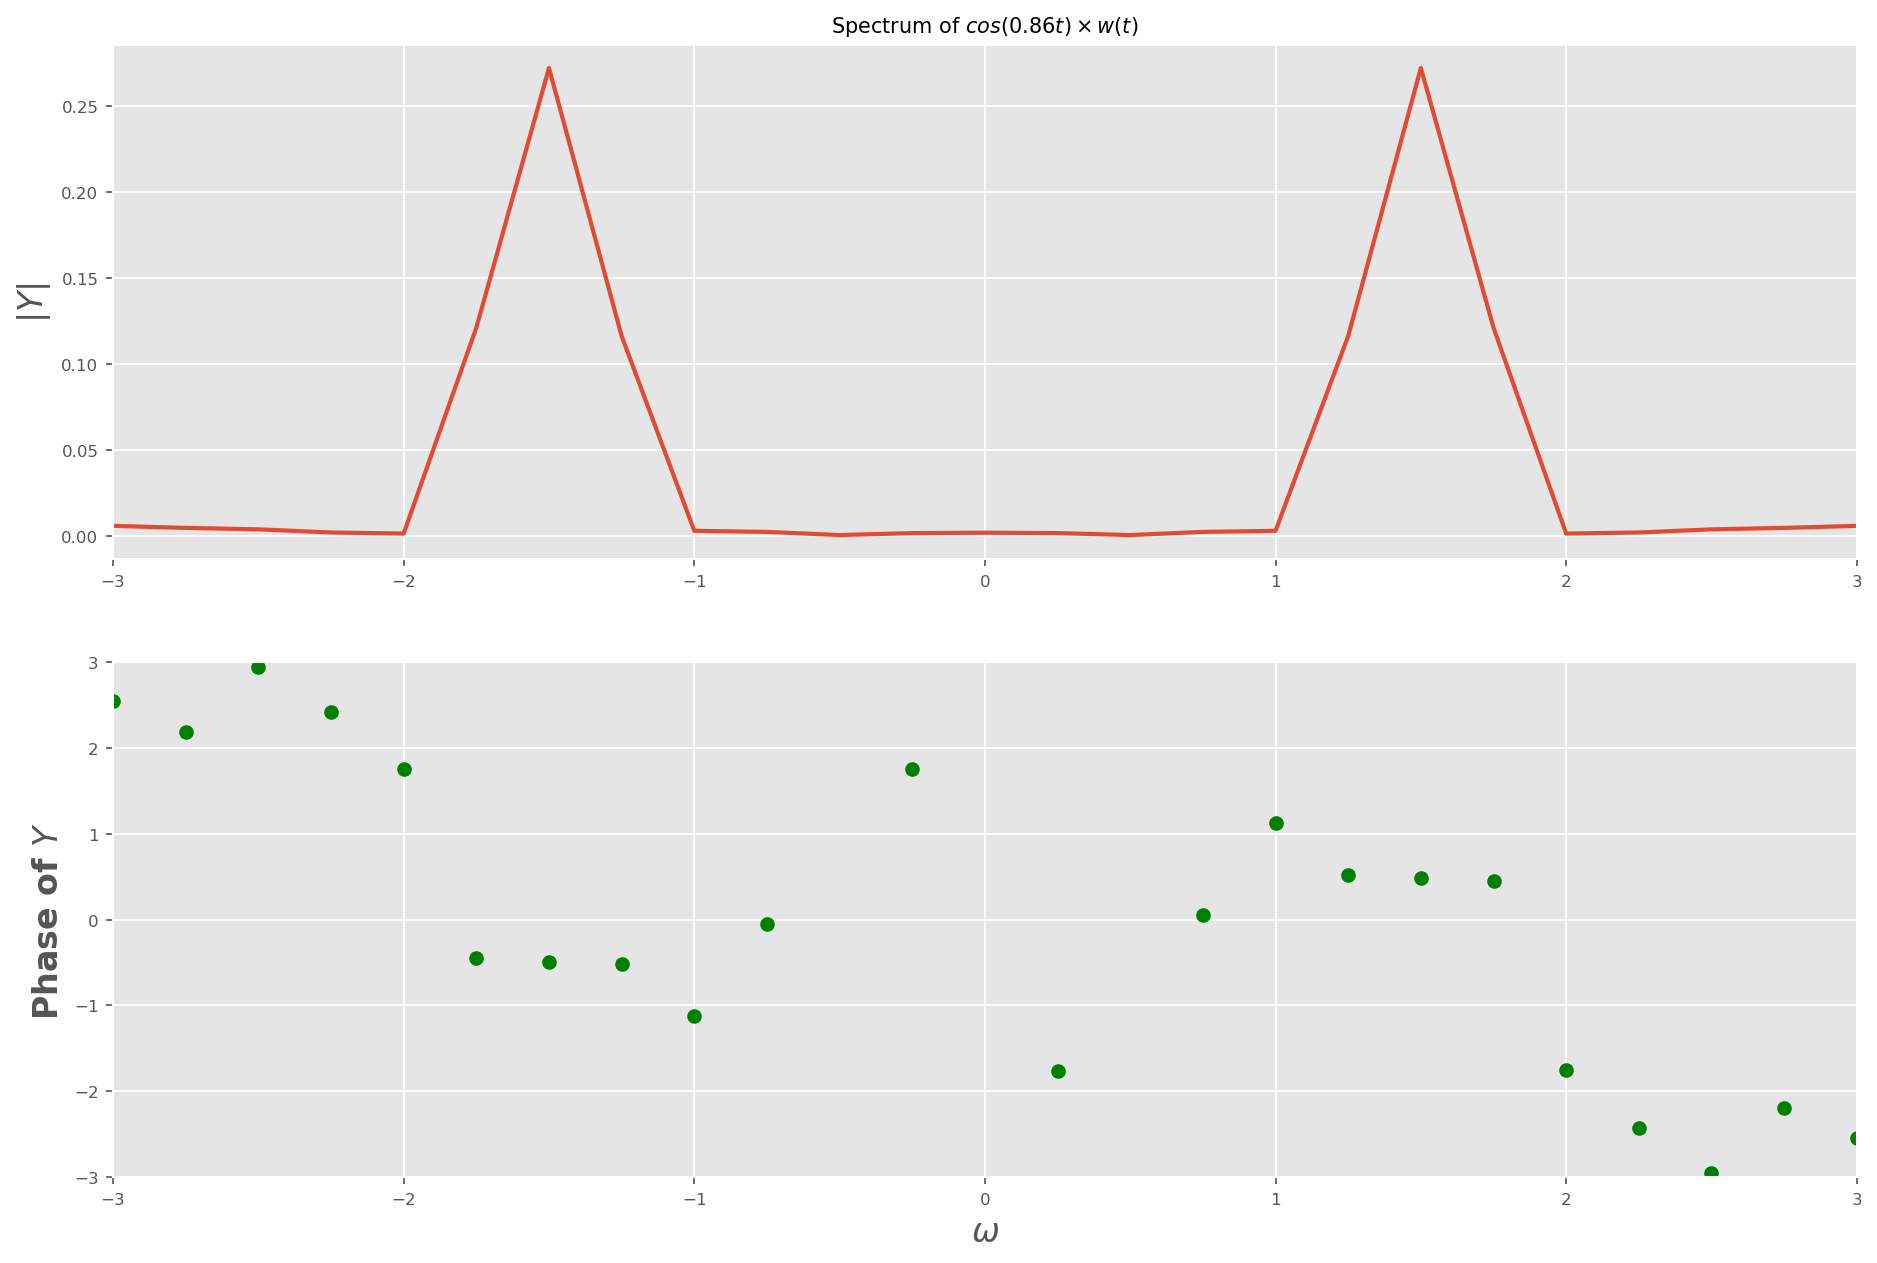

Estimated omega 	 1.58466290805
Estimated delta 	 0.822198163481
MSE error in predicting omega 	 0.267142656495
MSE error in predicting delta 	 1.18145262682


In [55]:
omega_ll=np.linspace(0.5,1.5,3)
delta_ll=np.linspace(0,0.5,3)

MSE_omega=np.zeros(len(omega_ll))
MSE_delta=np.zeros(len(delta_ll))

#time
t=np.linspace(-4*np.pi,4*np.pi,129);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt

delta_w = 2*fmax/128*np.pi

for i in range(len(omega_ll)):
    #y
    omega=omega_ll[i]
    delta=delta_ll[i]
    
    # y with some random noise 
    y=np.cos(omega*t+delta)
    y+=0.1*np.random.randn(128)

    # title
    title=r"Spectrum of $cos\left(0.86t\right)\times w(t)$"

    #Hamming window
    n=np.arange(128)
    wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/128))

    (Y,w)=a.plot_fft(y,title,samples=128,sup=1e-3,\
              freq_max=fmax,x_lim=3,\
               y_freq_lim=3,\
               verbose=False,window=(wnd,),funky=True,return_val=True)

    print("Estimated omega \t",estimate_omega(Y,w))
    MSE_omega[i]=omega-estimate_omega(Y,w)
    print("Estimated delta \t",estimate_delta(Y,w))
    MSE_delta[i]=delta-estimate_delta(Y,w)
    
print ("MSE error in predicting omega \t",np.linalg.norm(MSE_omega,2))
print ("MSE error in predicting delta \t",np.linalg.norm(MSE_delta,2))

## Question 5

Chirped Signal

$$ \cos(16( 1.5+ \frac{t}{2\pi})t)  $$

In [23]:
#time
t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
y=np.cos(16*(1.5+t/2/np.pi)*t)

plt.plot(t,y,lw=2)
plt.xlim([-4,4])
plt.ylabel(r"$y$",size=16)
plt.title(r"Time domain of $\cos(16( 1.5+ \frac{t}{2\pi})t)  $")
plt.grid(True)

DFT Spectra without a windowing function:

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


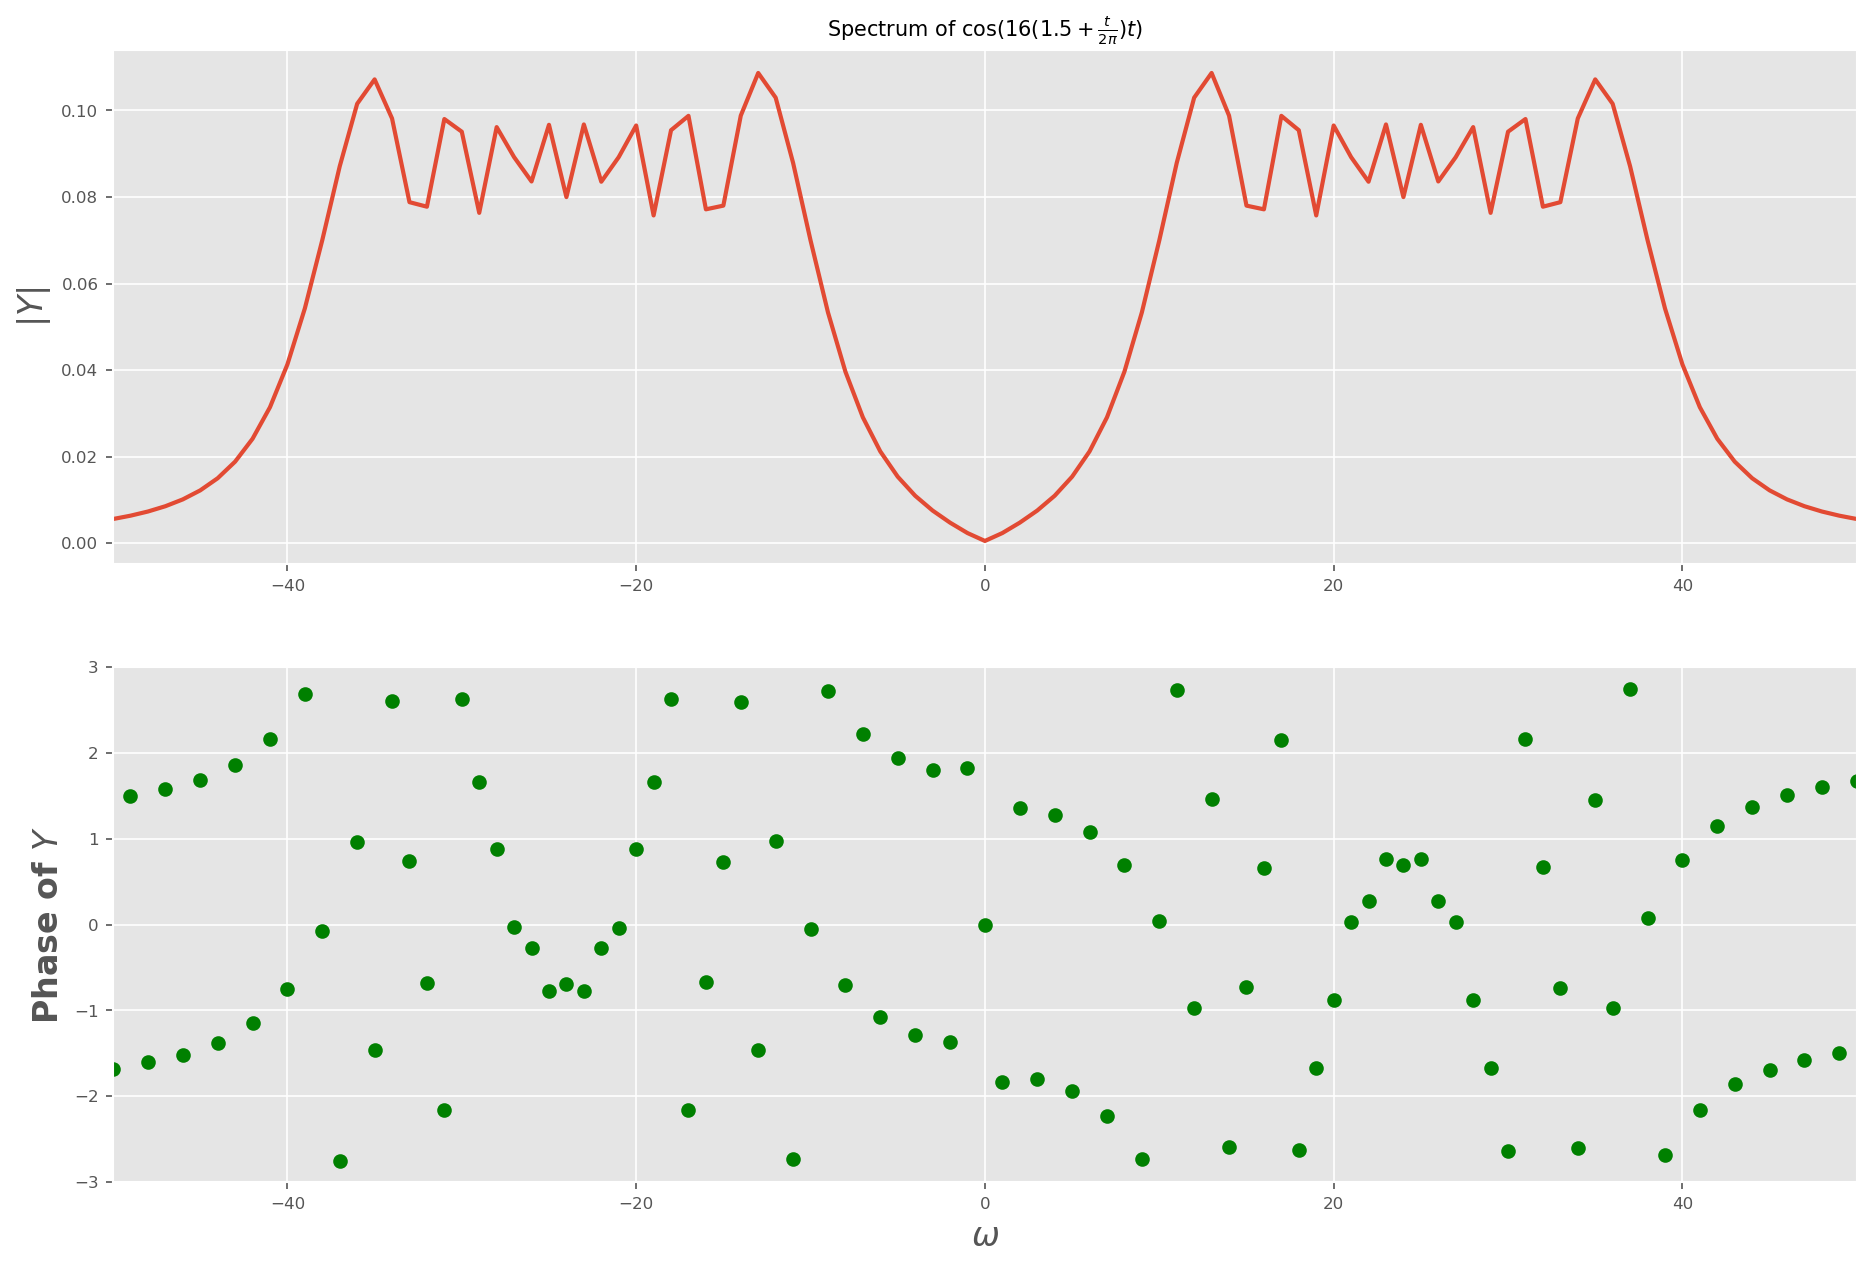

In [52]:
#time
t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt


# title
title=r"Spectrum of $ \cos(16( 1.5+ \frac{t}{2\pi})t)  $"

#Hamming window
n=np.arange(1024)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/1024))

#y
y=np.cos(16*(1.5+t/2/np.pi)*t)

a.plot_fft(y,title,samples=1024,sup=1e-4,\
          freq_max=fmax,x_lim=50,\
           y_freq_lim=3,\
           verbose=False,window=False,funky=True,return_val=False)

With a windowing function (Hamming)

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


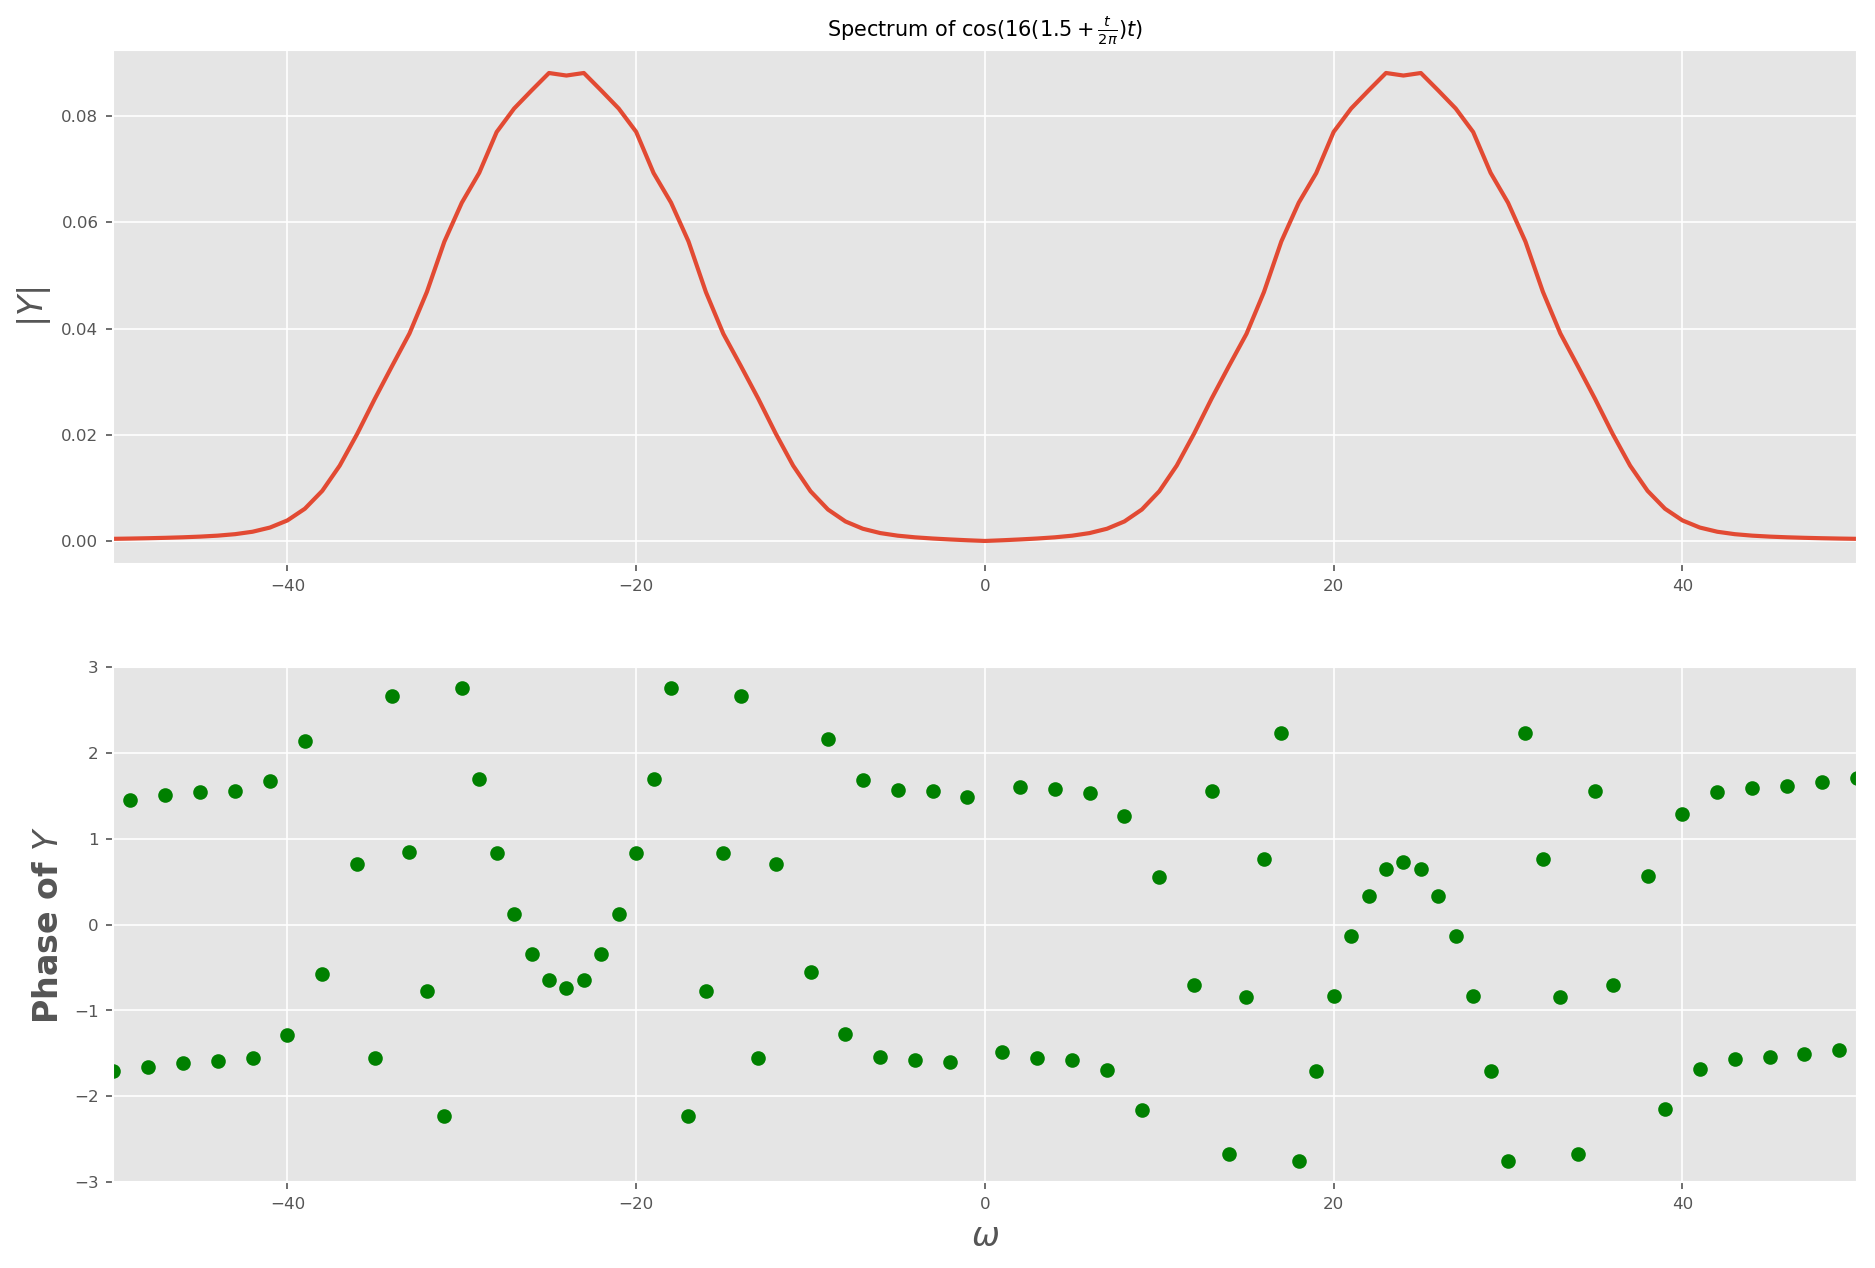

In [53]:
#time
t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt


# title
title=r"Spectrum of $ \cos(16( 1.5+ \frac{t}{2\pi})t)  $"

#Hamming window
n=np.arange(1024)
wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/1024))

#y
y=np.cos(16*(1.5+t/2/np.pi)*t)

a.plot_fft(y,title,samples=1024,sup=1e-4,\
          freq_max=fmax,x_lim=50,\
           y_freq_lim=3,\
           verbose=False,window=(wnd,),funky=True,return_val=False)

## Question 6

For the same chirped signal, break the 1024 vector into pieces that are 64 samples wide.  

Extract the DFT of each and store as a column in a 2D array. Then plot the array as a surface plot to show how the frequency of the signal varies with time.

This is new. So far we worked either in time or in frequency. But this is a “time- frequency” plot, where we get localized DFTs and show how the spectrum evolves in time.

We do this for both phase and magnitude. Let us explore both surface and contour plots.


### Without Windowing

In [26]:
t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t_arrays=np.split(t,16)

Y_mags=np.zeros((16,64))
Y_angles=np.zeros((16,64))

for i in range(len(t_arrays)):
    
    tt=t_arrays[i]
    
    dt=tt[1]-tt[0];fmax=1/dt
    #Hamming window
    n=np.arange(64)
    wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/64))

    #y
    y=np.cos(16*(1.5+tt/2/np.pi)*tt)
    Y=np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))/(64)
    w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
    
    Y_mags[i,:]=np.abs(Y)
    Y_angles[i,:]=np.angle(Y)

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

We graph the surface plots of both magintude and phase variations.

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


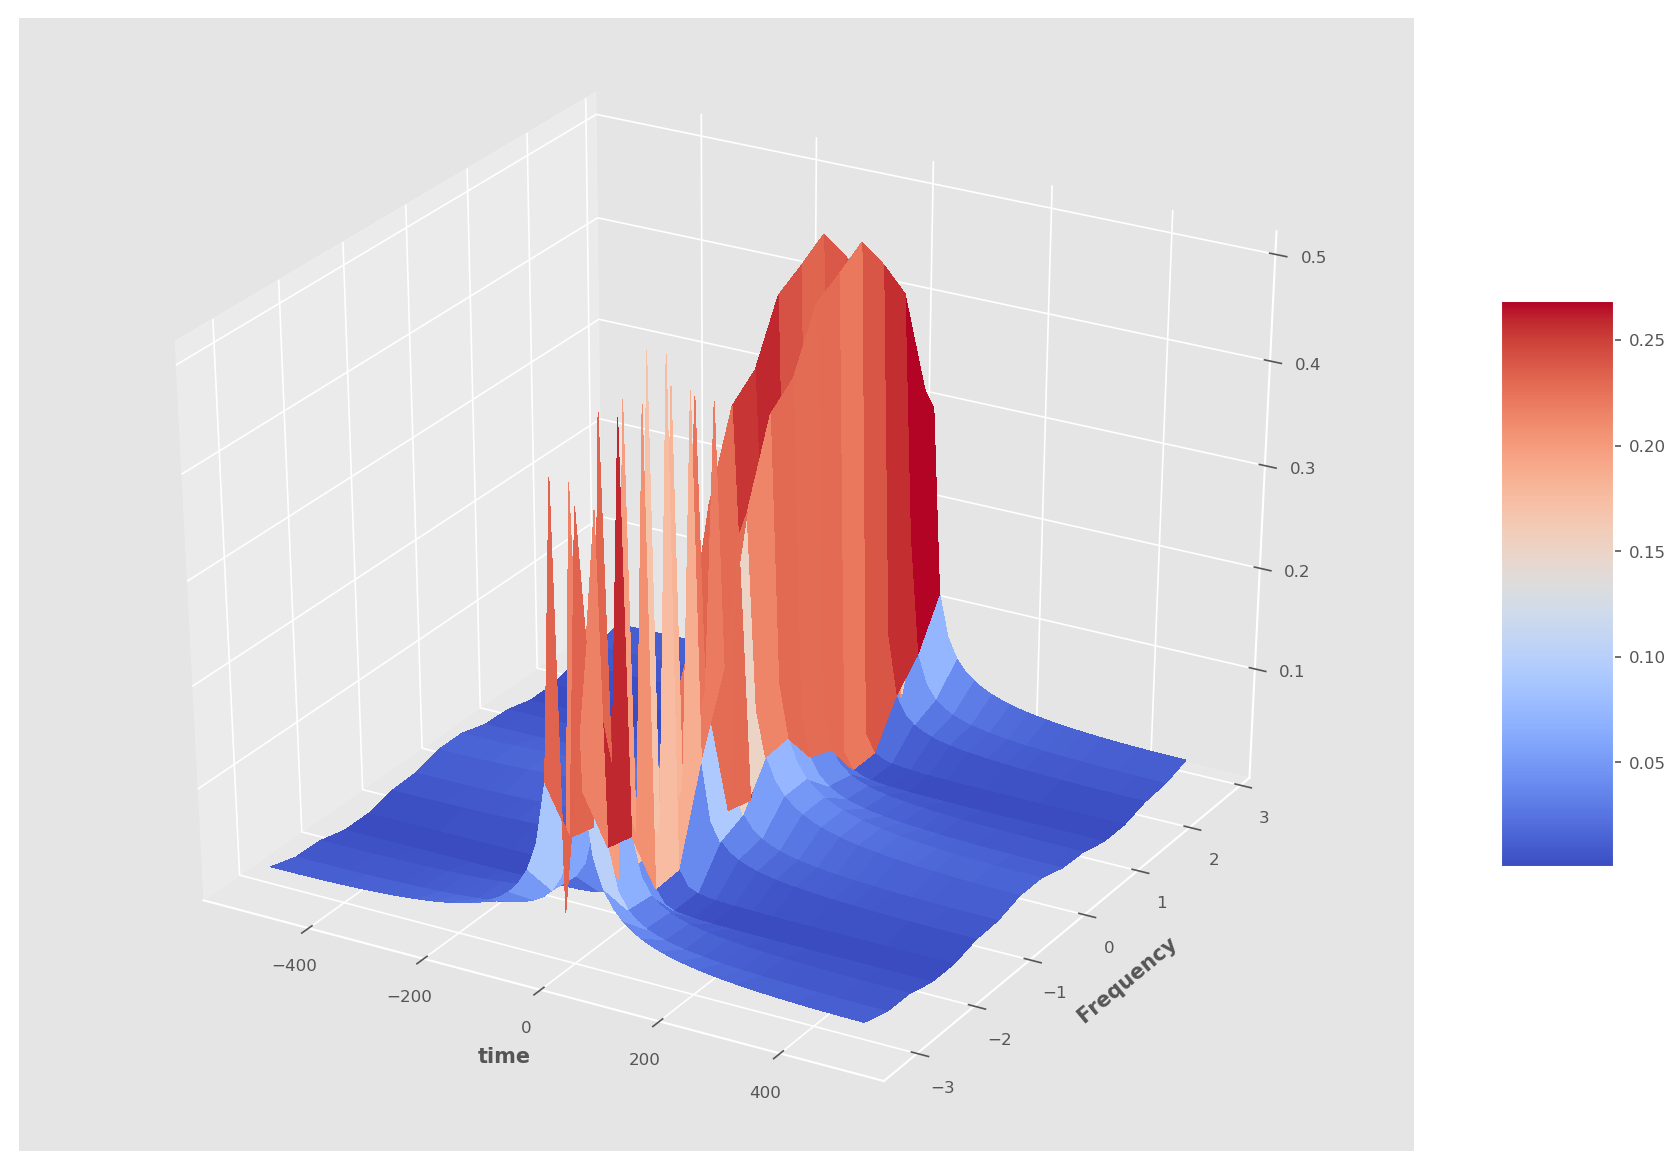

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_mags.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.ylabel("Frequency")
plt.xlabel("time")

plt.show()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


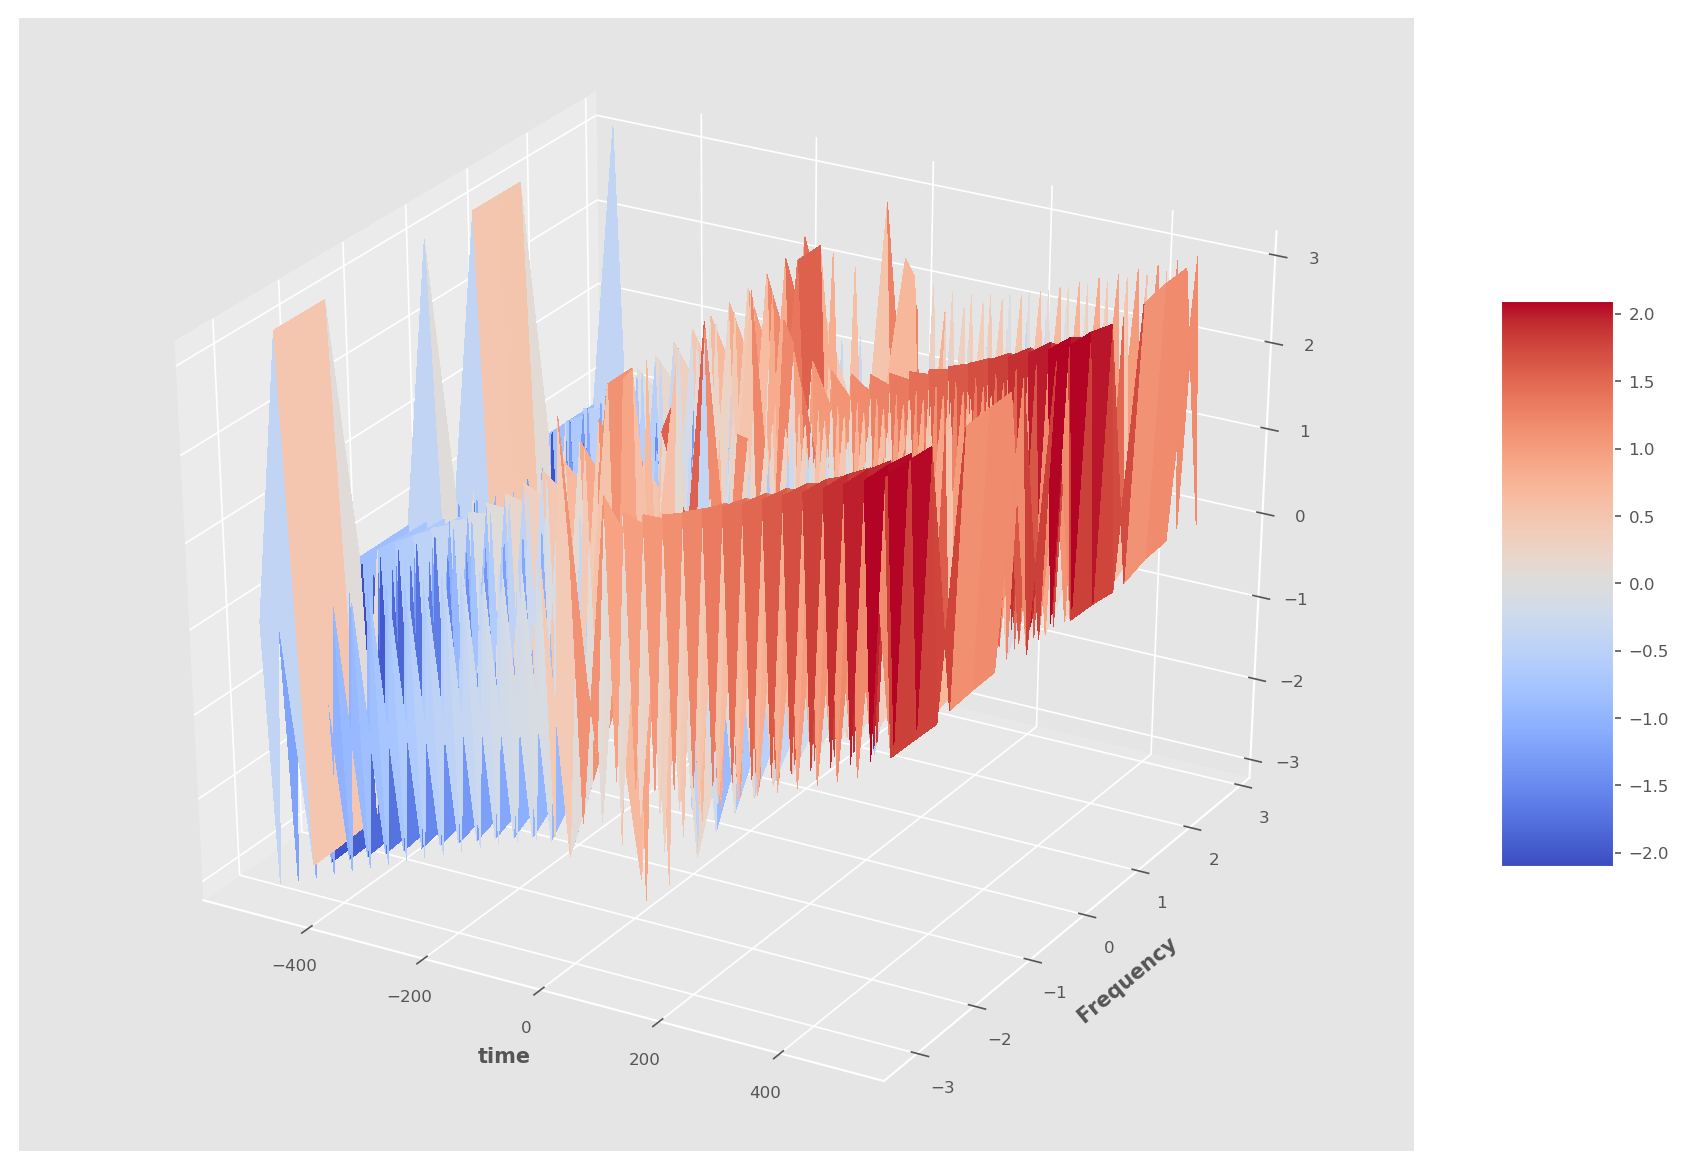

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_angles.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.ylabel("Frequency")
plt.xlabel("time")

plt.show()

Contour plots

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


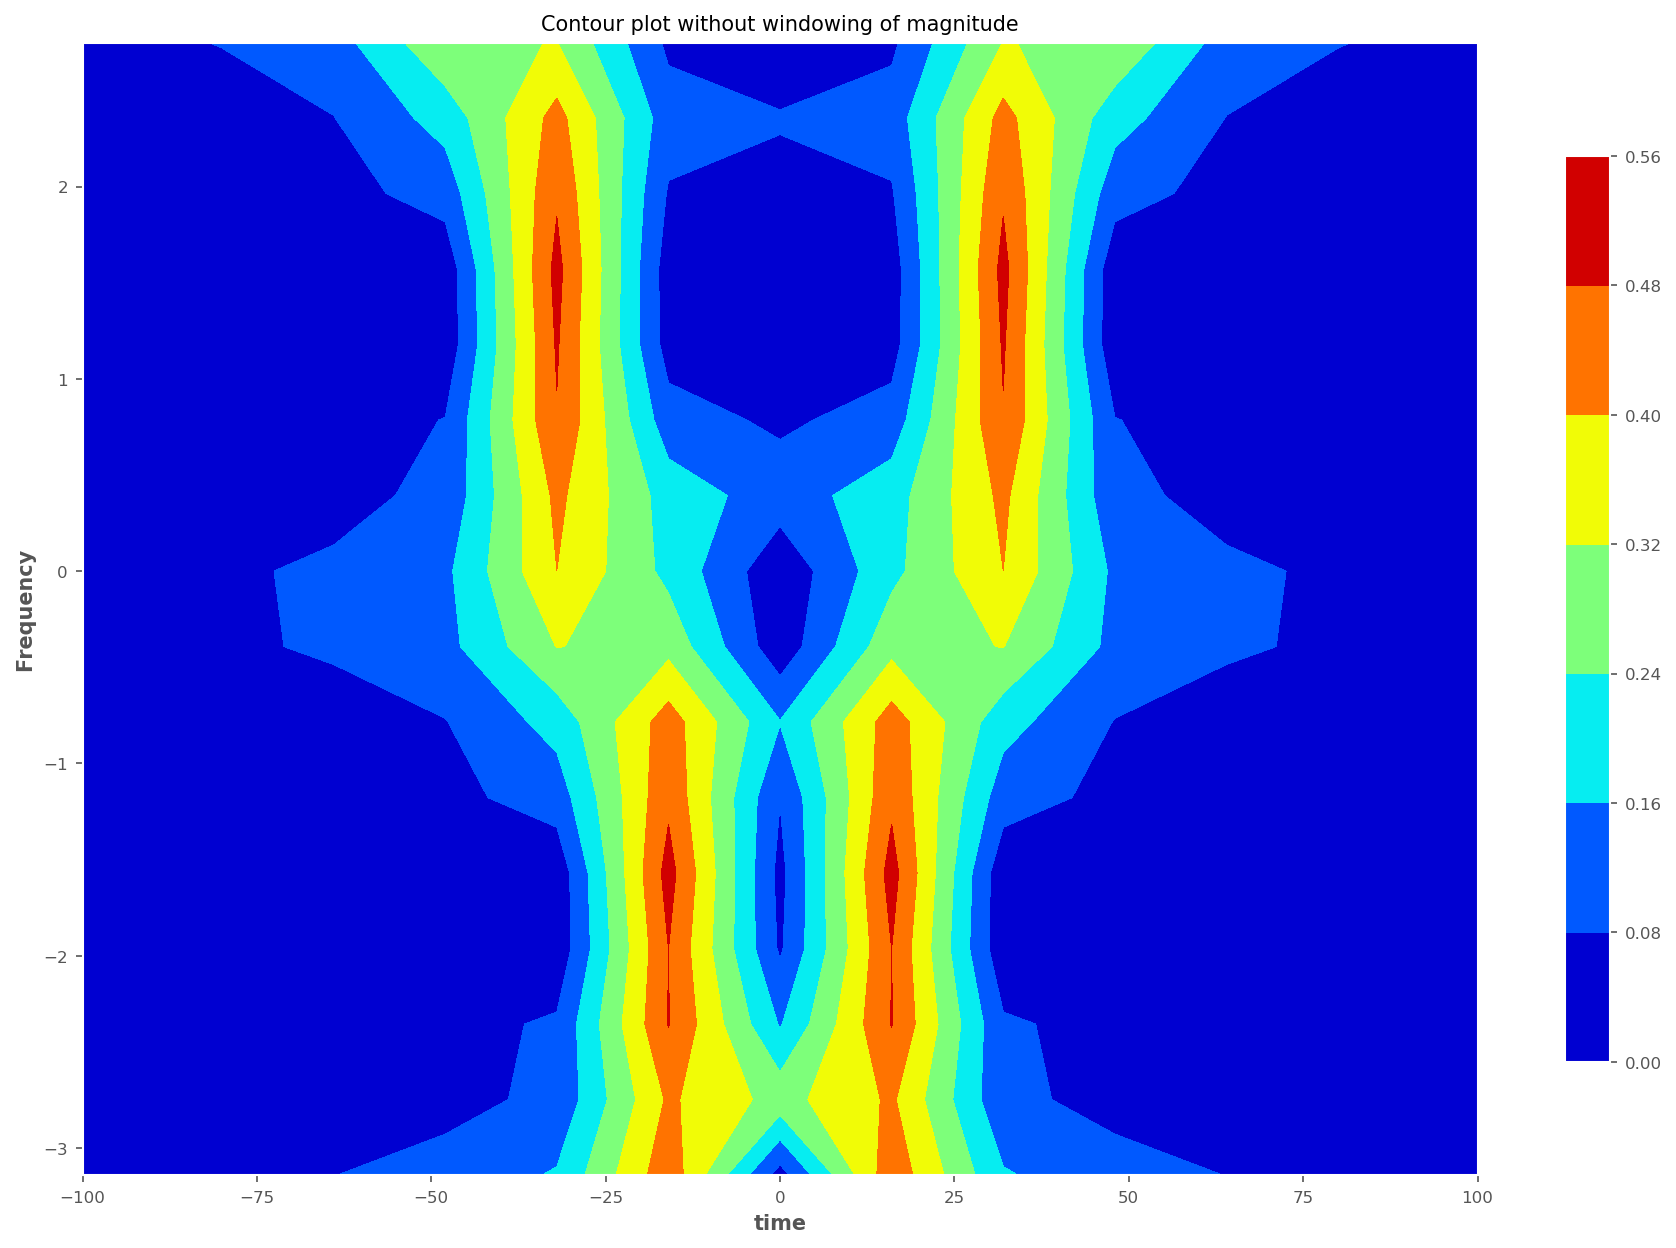

In [30]:
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)


CS=plt.contourf(w,t,Y_mags.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot without windowing of magnitude')
plt.ylabel("Frequency")
plt.xlabel("time")
plt.xlim([-100,100])

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])
plt.show()

()


/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


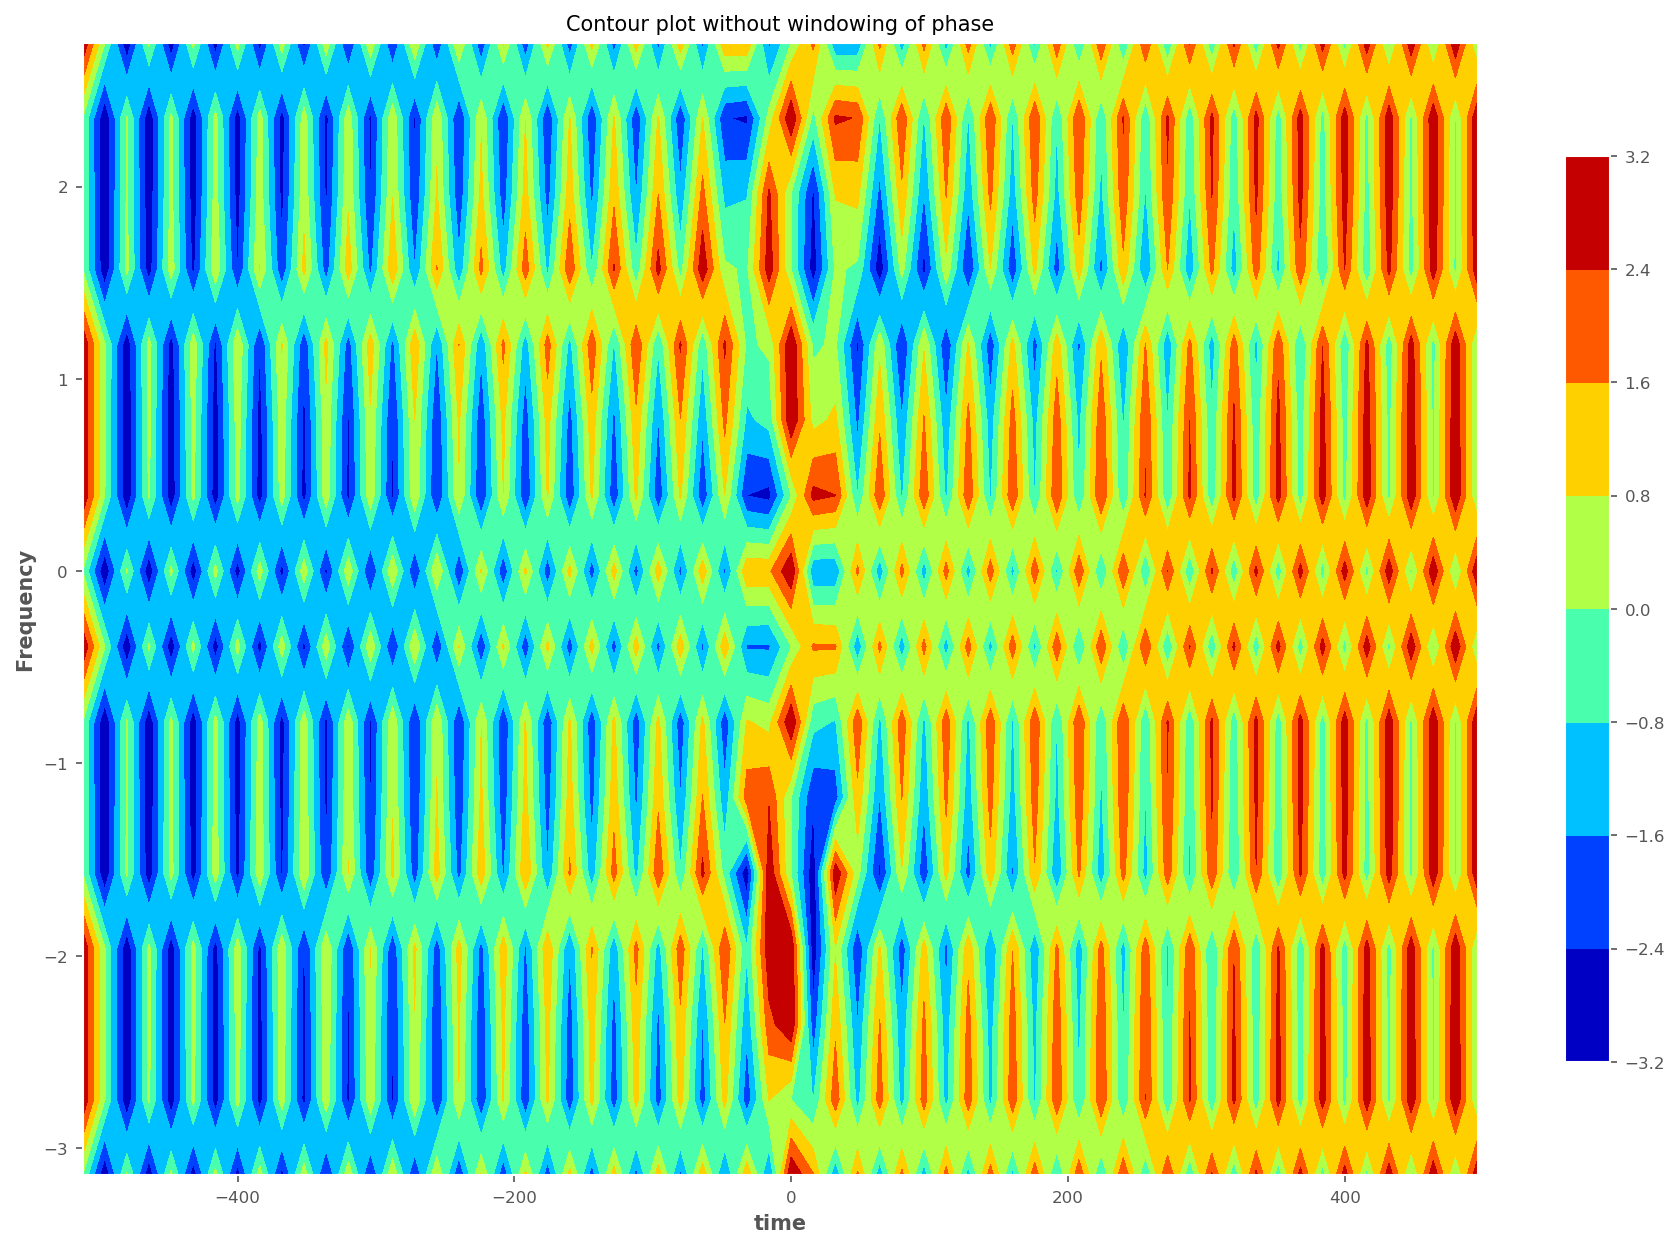

In [31]:
print(w.shape)
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

CS=plt.contourf(w,t,Y_angles.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot without windowing of phase')
plt.ylabel("Frequency")
plt.xlabel("time")

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

### With Windowing

In [32]:
t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t_arrays=np.split(t,16)

Y_mags=np.zeros((16,64))
Y_angles=np.zeros((16,64))

for i in range(len(t_arrays)):
    
    tt=t_arrays[i]
    
    dt=tt[1]-tt[0];fmax=1/dt
    #Hamming window
    n=np.arange(64)
    wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/64))

    #y
    y=np.cos(16*(1.5+tt/2/np.pi)*tt)
    y*=wnd
    Y=np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))/(64)
    w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
    
    Y_mags[i,:]=np.abs(Y)
    Y_angles[i,:]=np.angle(Y)

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


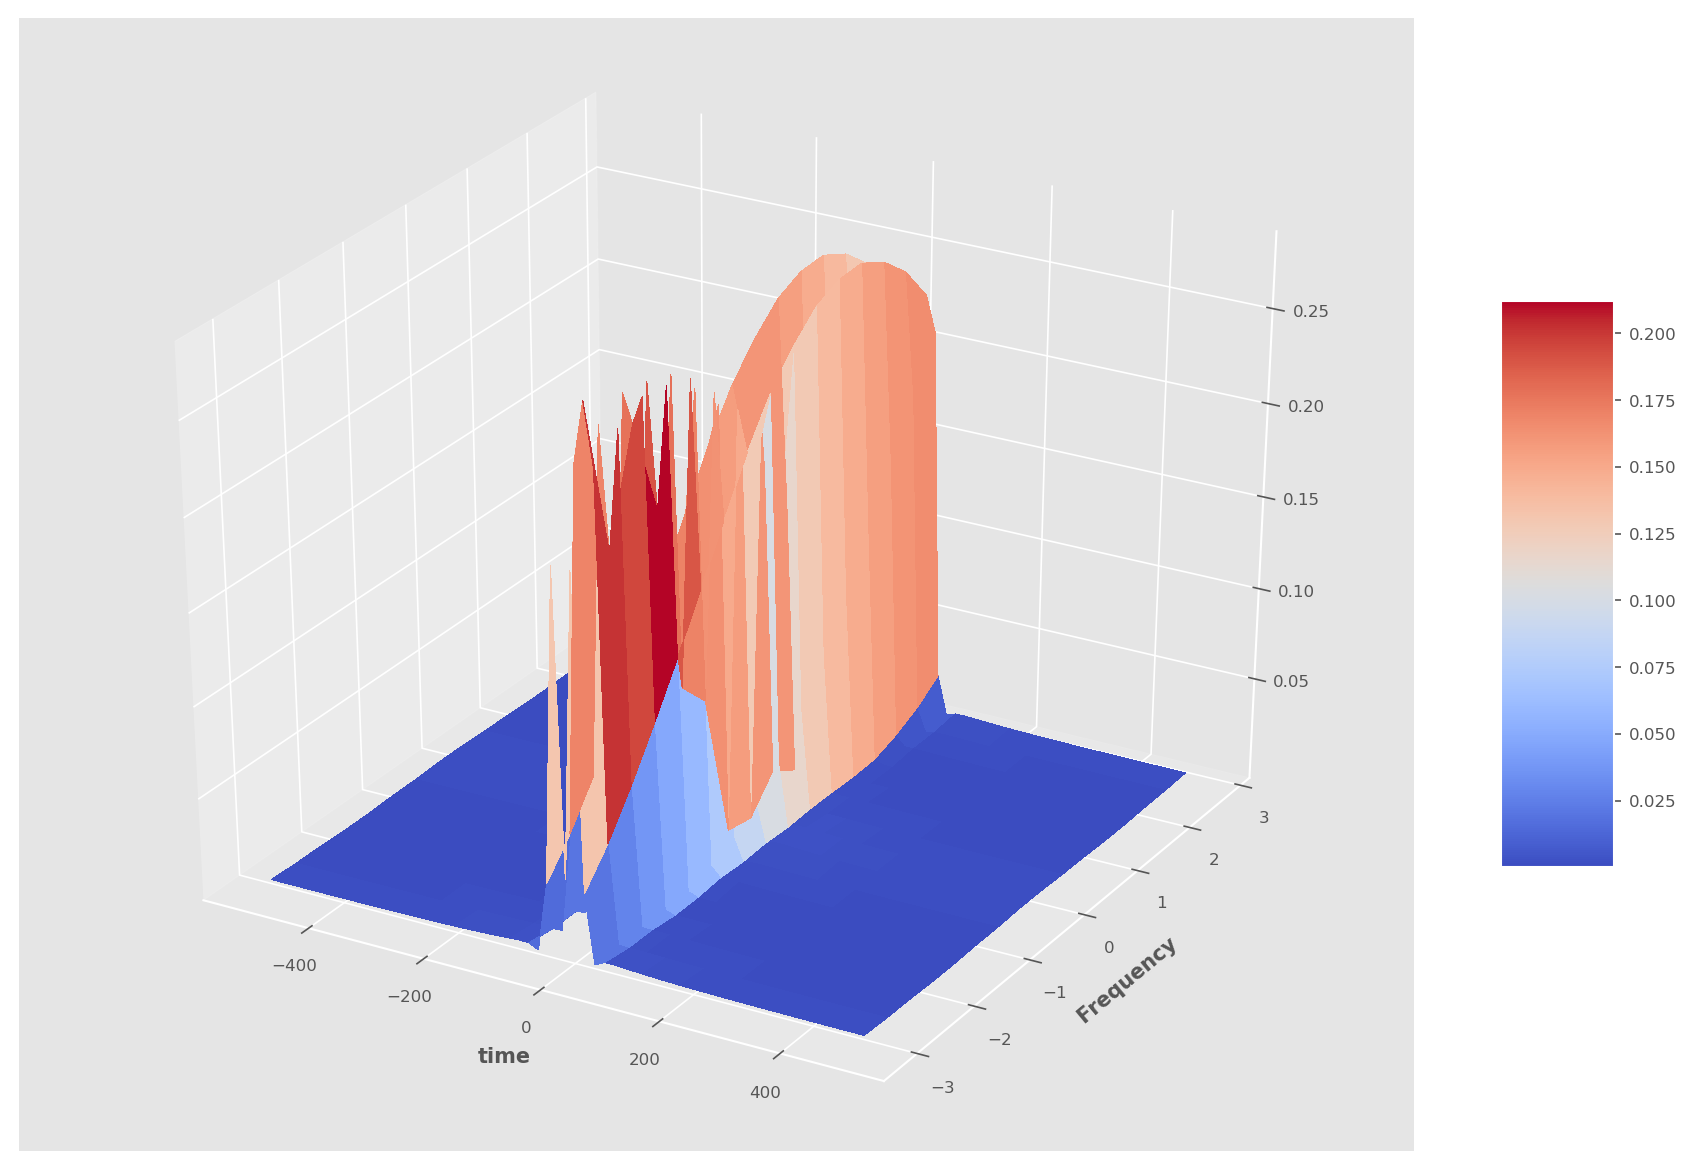

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_mags.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.ylabel("Frequency")
plt.xlabel("time")

plt.show()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


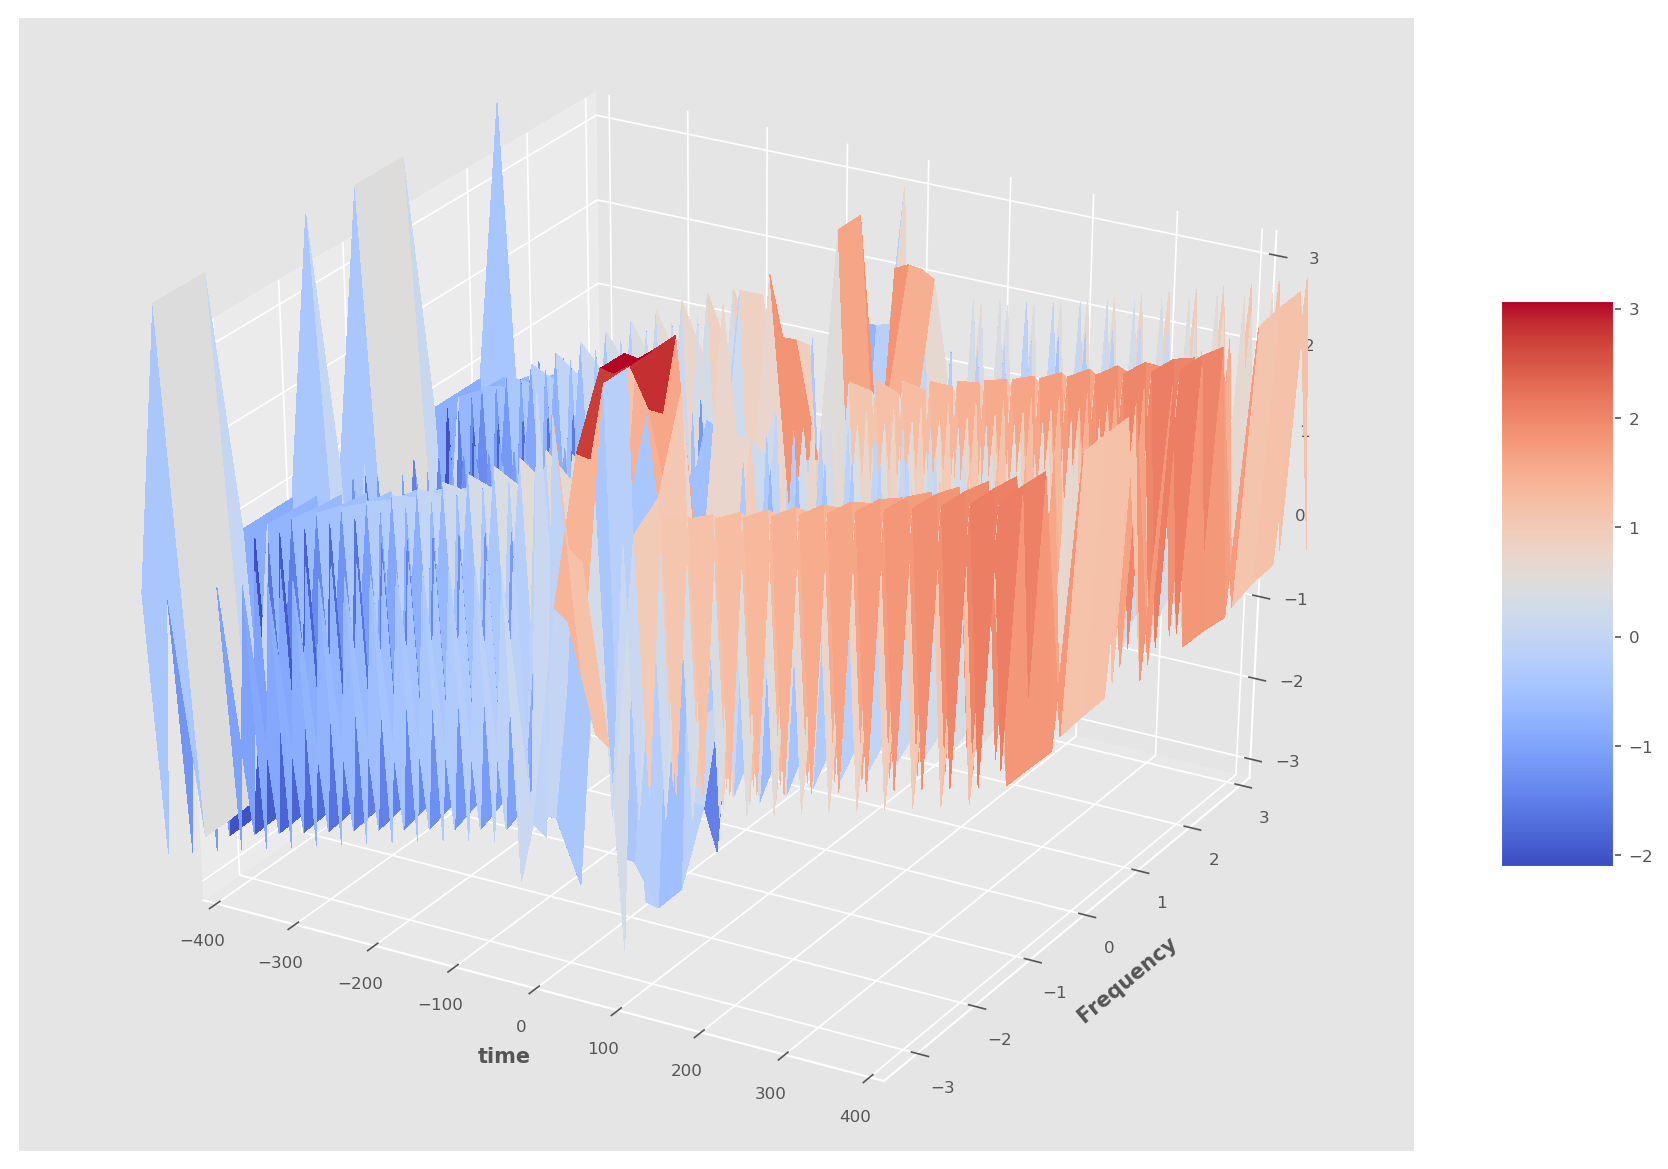

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_angles.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlim([-400,400])
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.ylabel("Frequency")
plt.xlabel("time")

plt.show()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


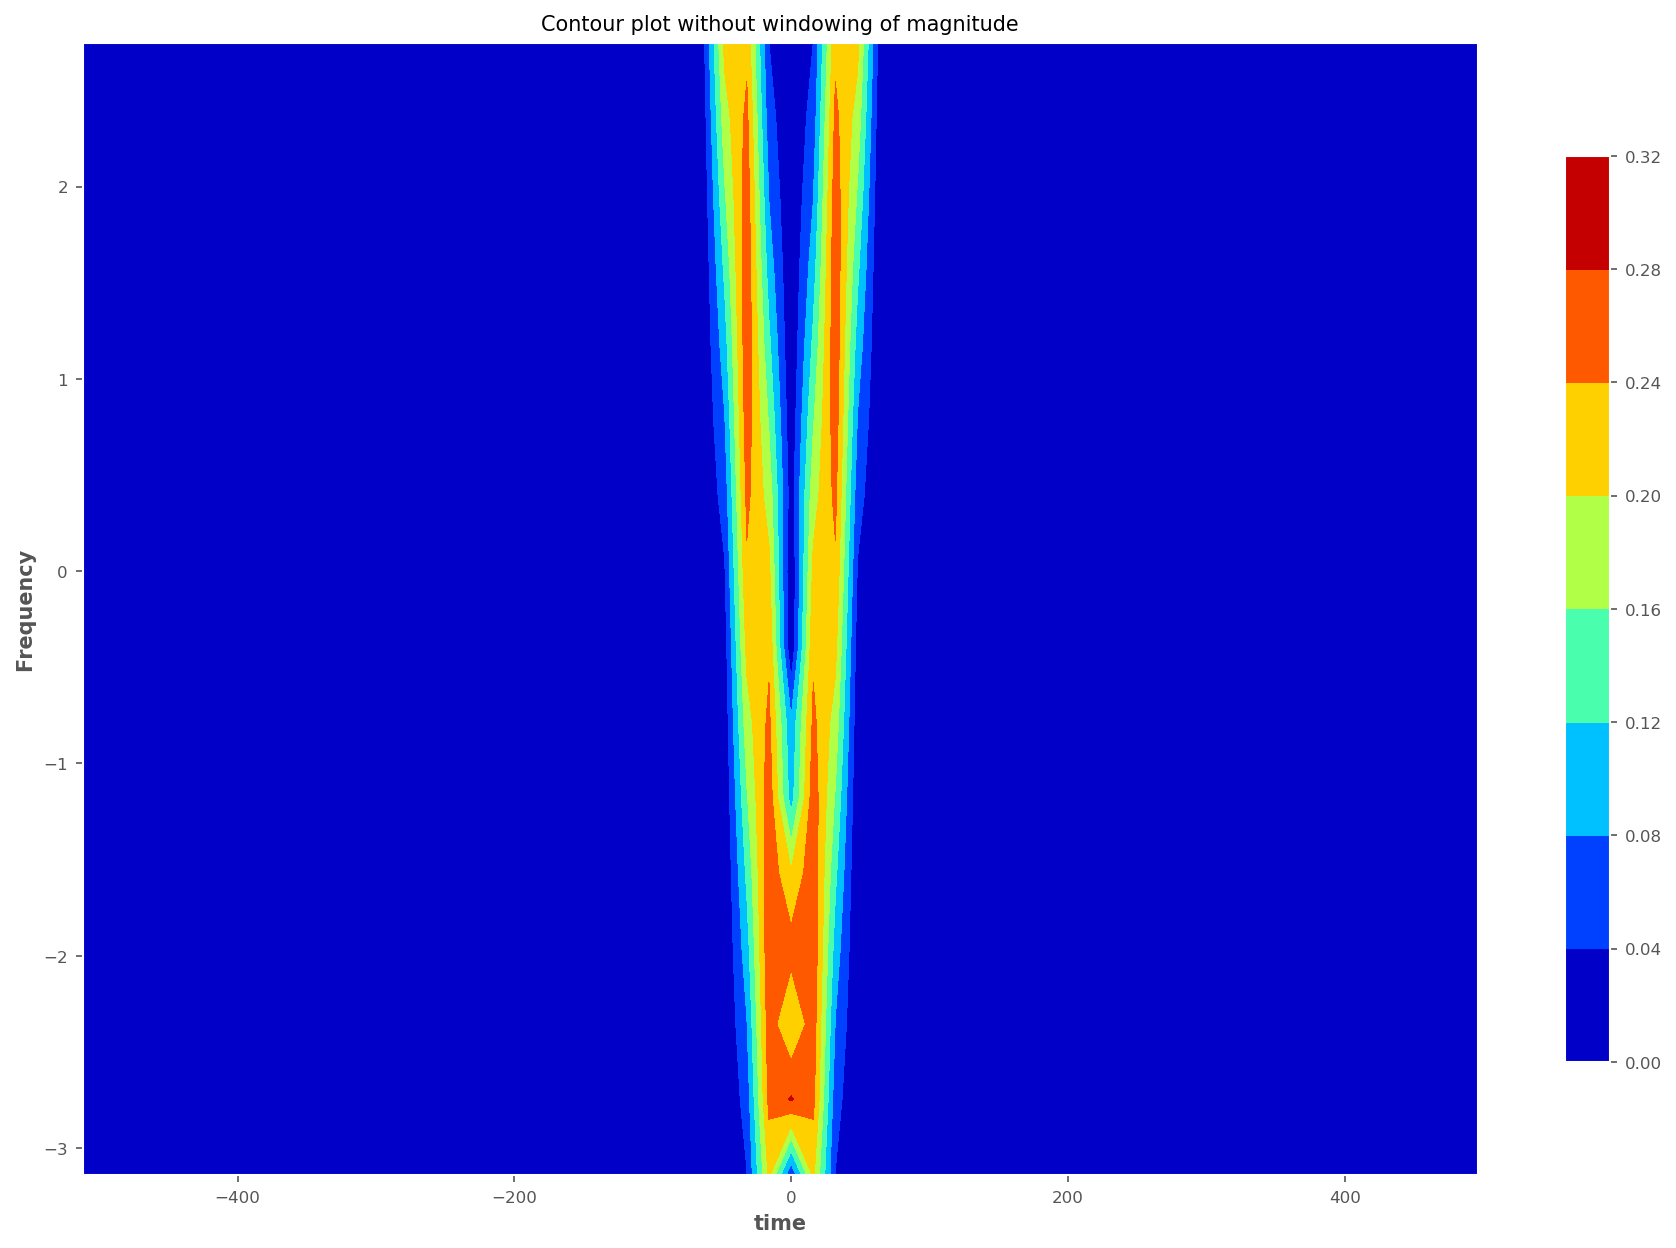

In [35]:
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)


CS=plt.contourf(w,t,Y_mags.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot without windowing of magnitude')
plt.ylabel("Frequency")
plt.xlabel("time")

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])
plt.show()

()


/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


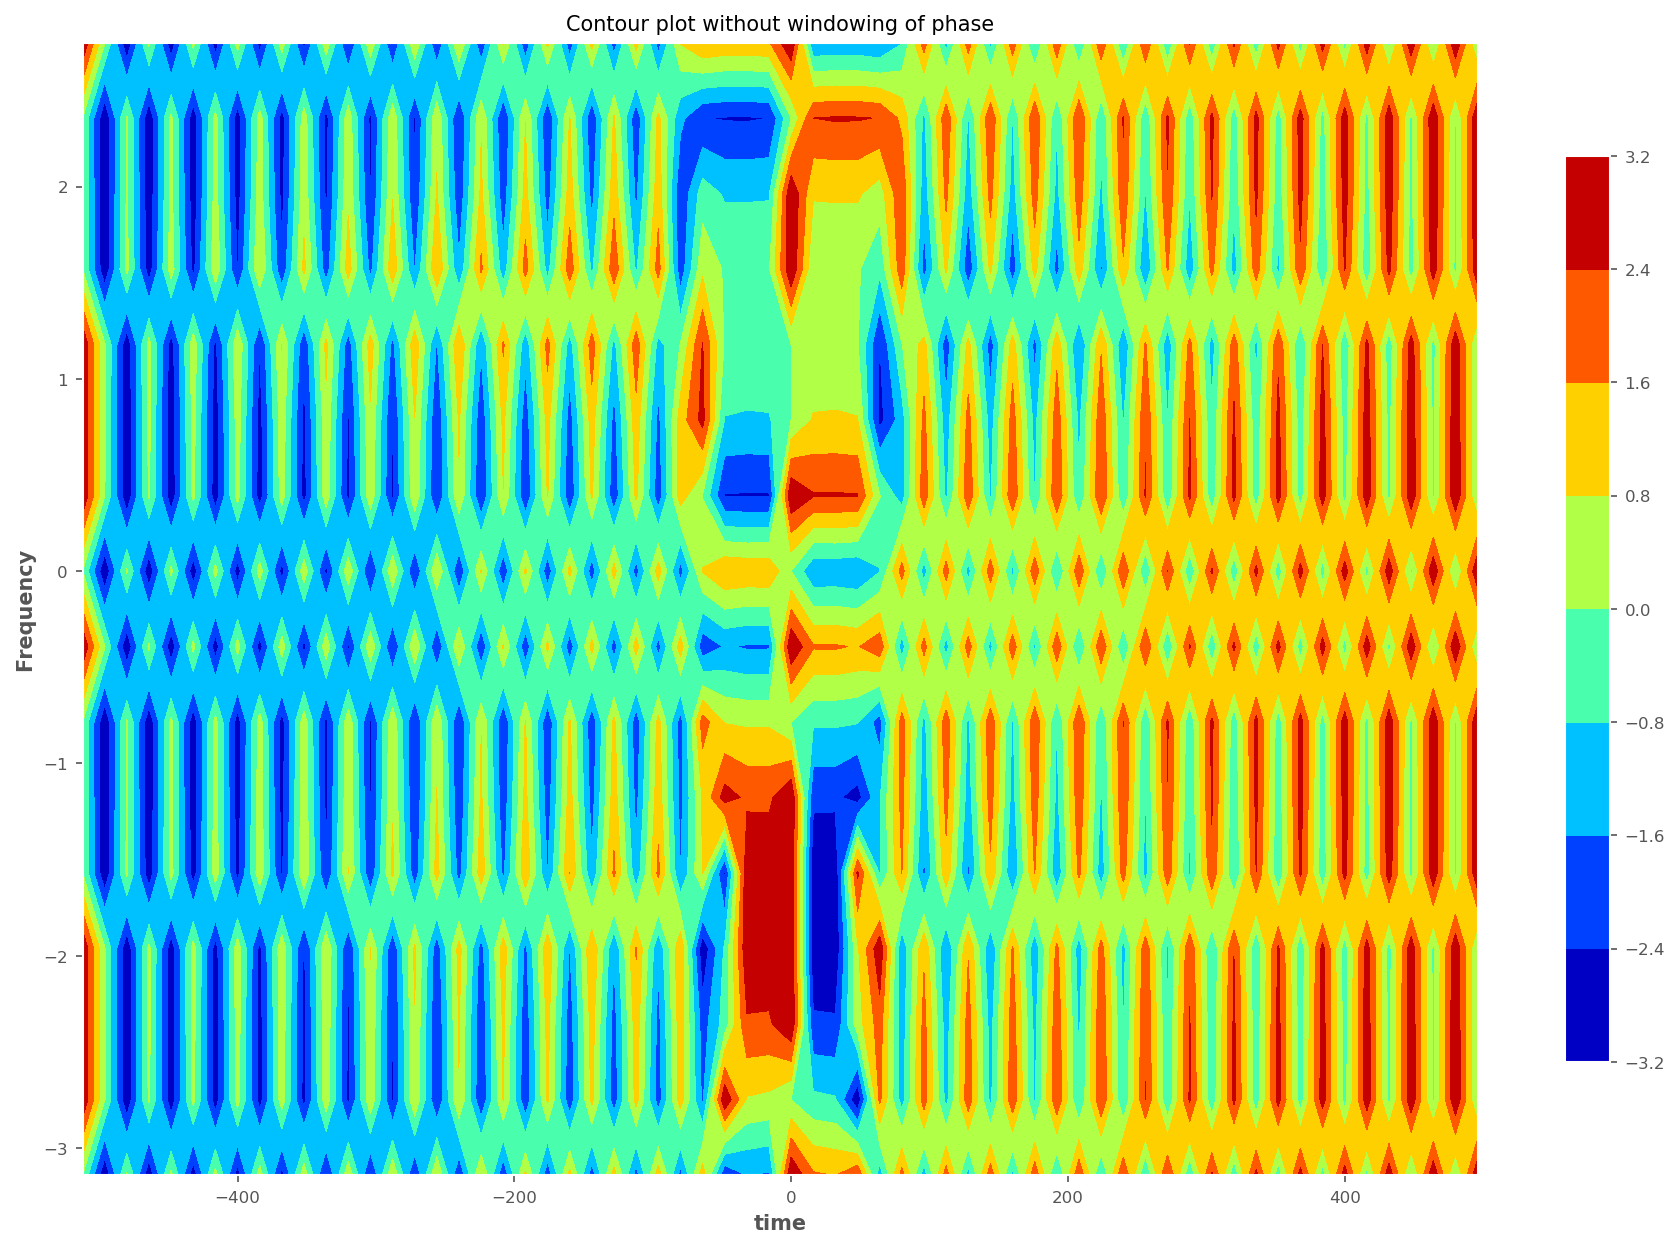

In [36]:
print(w.shape)
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[::64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

CS=plt.contourf(w,t,Y_angles.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot without windowing of phase')
plt.ylabel("Frequency")
plt.xlabel("time")

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

We notice that just 16 slices of our 1024 vector might be very sparse. Hence, let's slice contiguous slices with a spacing of one., giving $1024-64=980$ slices.

In [37]:
t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t_arrays=np.split(t,16)

Y_mags=np.zeros((1024-64,64))
Y_angles=np.zeros((1024-64,64))

for i in range(1024-64):
    
    tt=t[i:i+64]
    
    dt=tt[1]-tt[0];fmax=1/dt
    #Hamming window
    n=np.arange(64)
    wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/64))

    #y
    y=np.cos(16*(1.5+tt/2/np.pi)*tt)
    Y=np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))/(64)
    w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
    
    Y_mags[i,:]=np.abs(Y)
    Y_angles[i,:]=np.angle(Y)

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


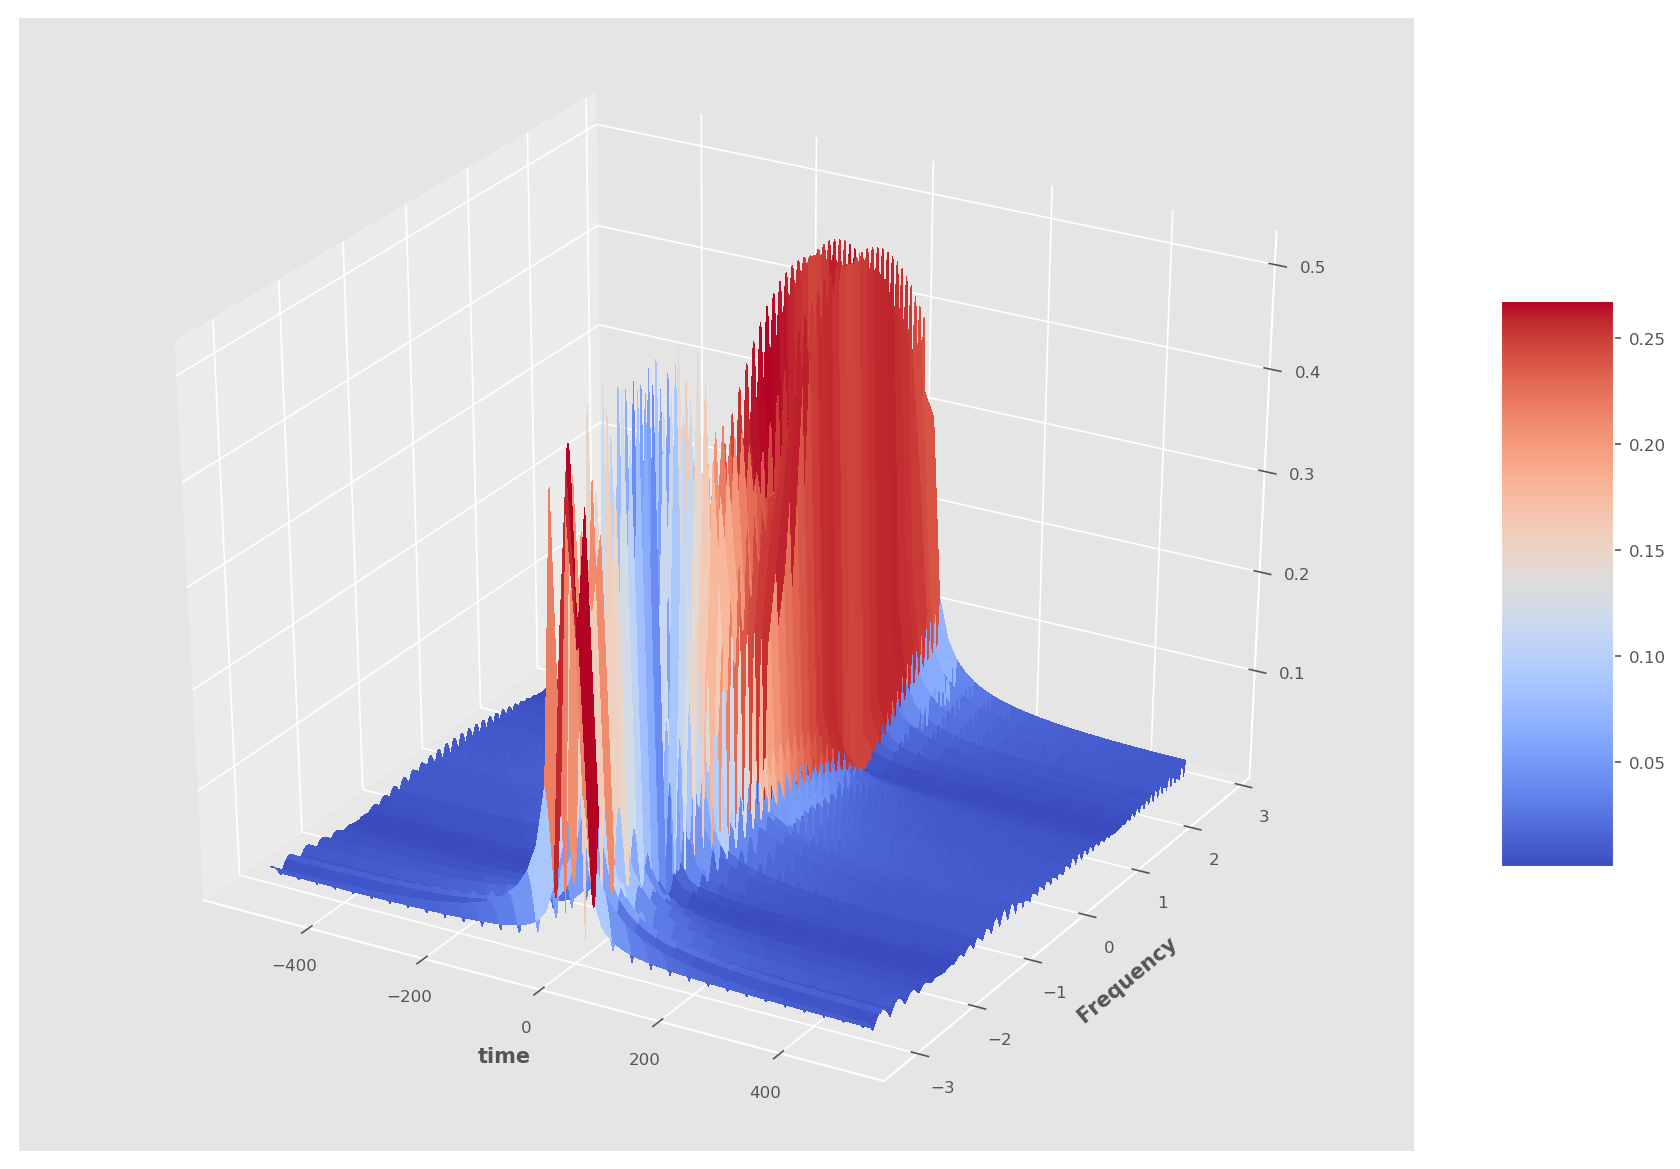

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_mags.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.ylabel("Frequency")
plt.xlabel("time")

plt.show()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


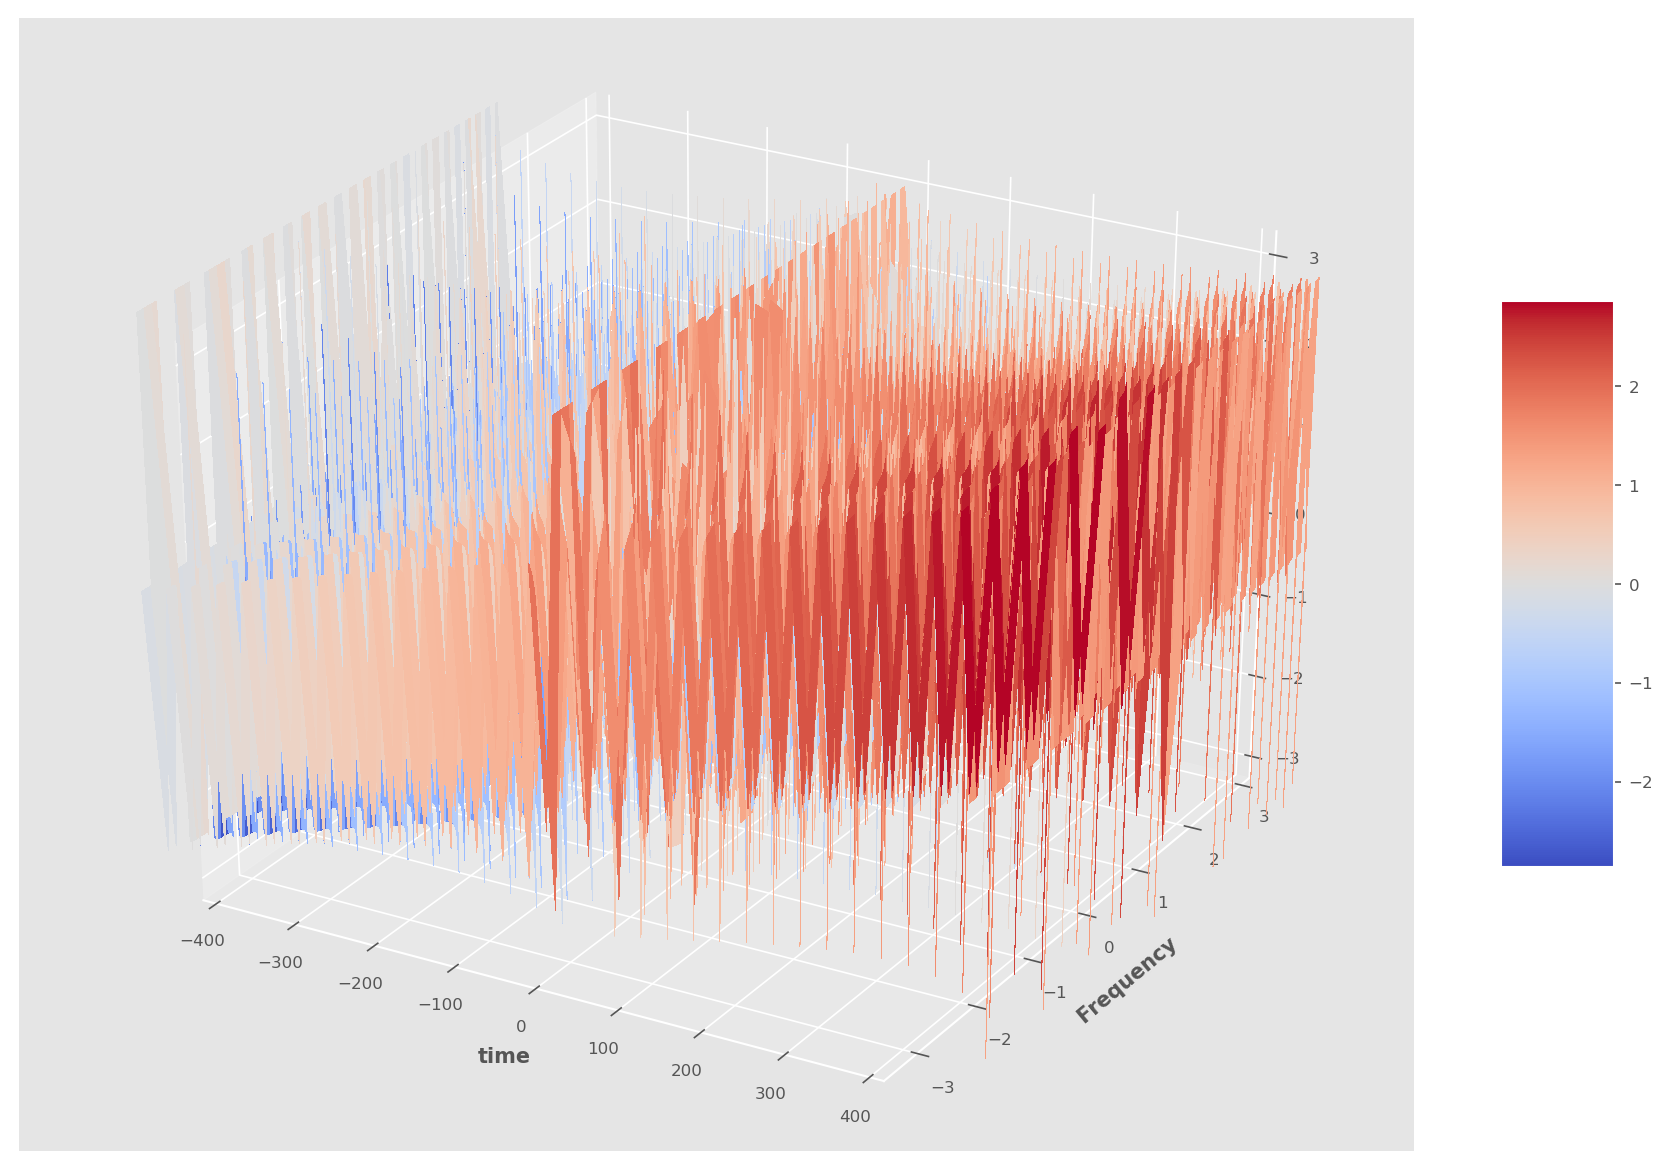

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_angles.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlim([-400,400])
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.ylabel("Frequency")
plt.xlabel("time")

plt.show()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


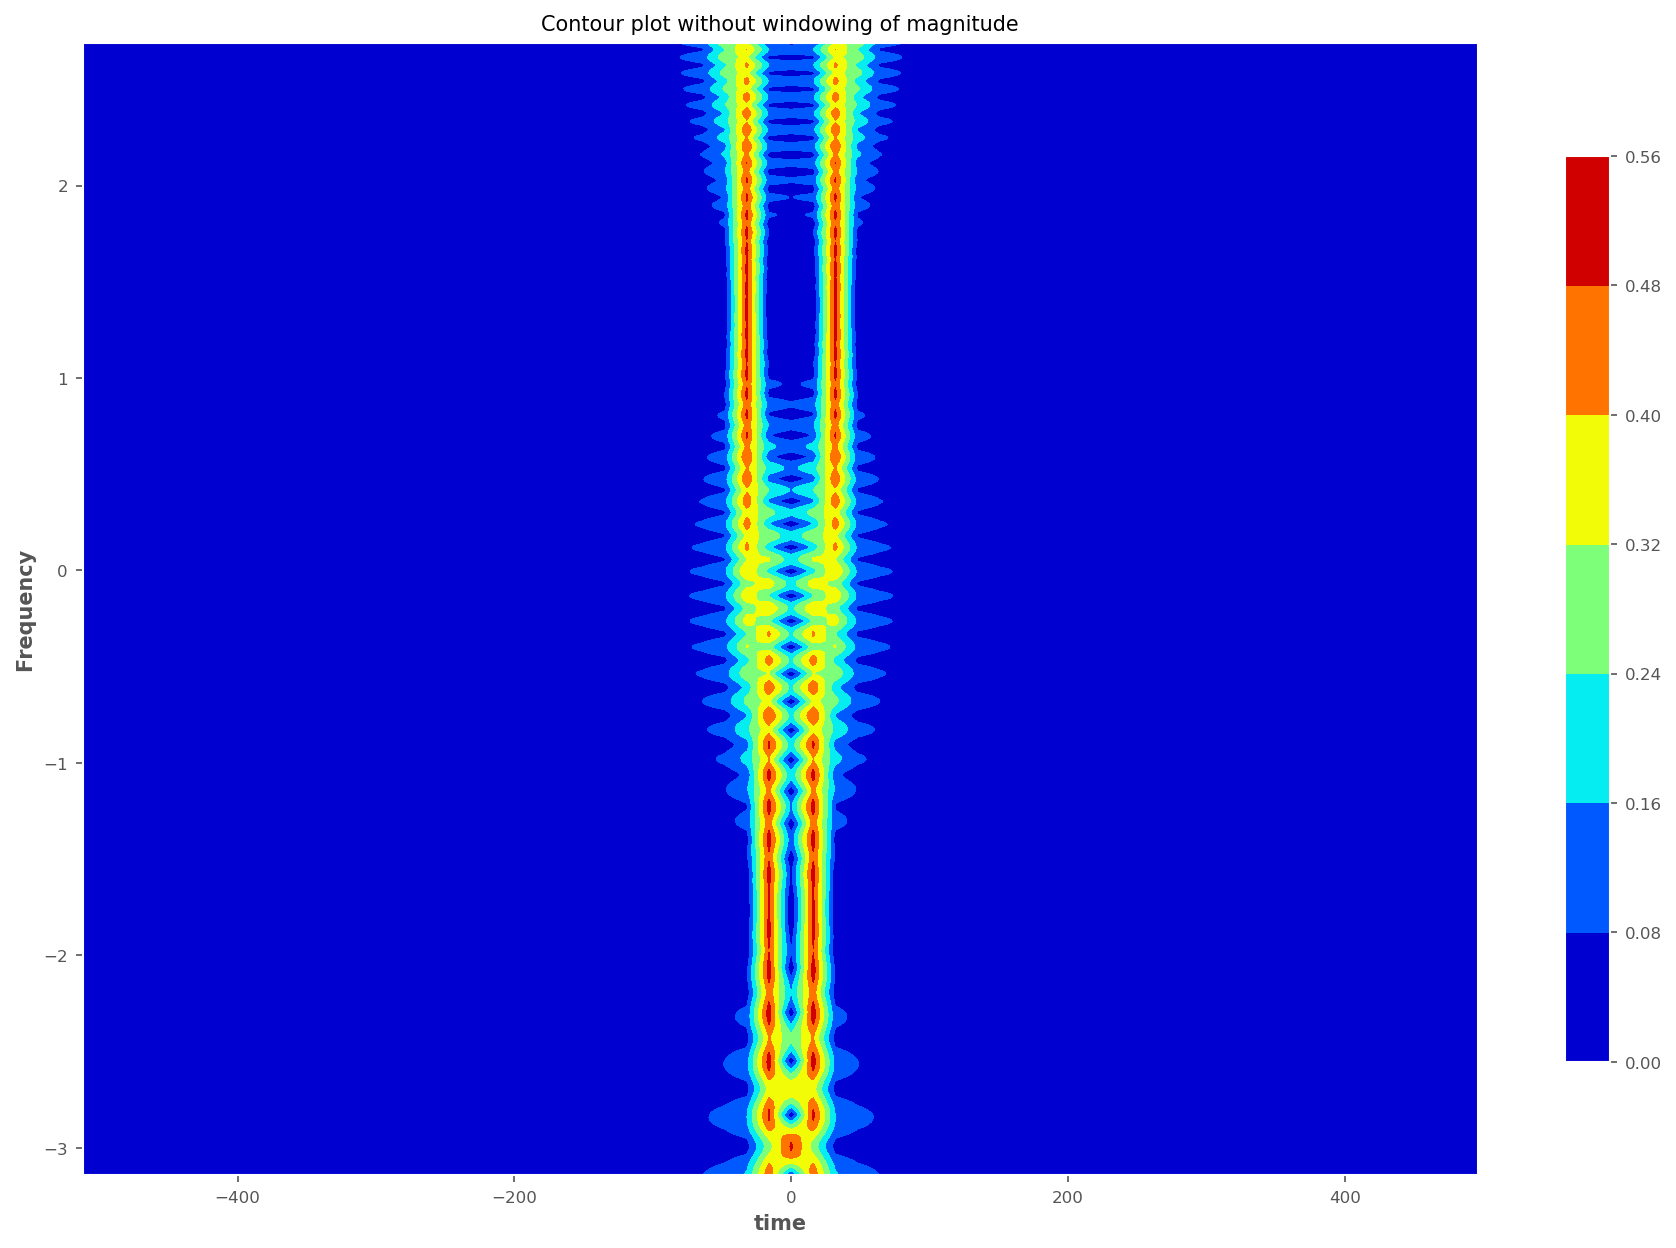

In [40]:
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)


CS=plt.contourf(w,t,Y_mags.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot without windowing of magnitude')
plt.ylabel("Frequency")
plt.xlabel("time")

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])
plt.show()

()


/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


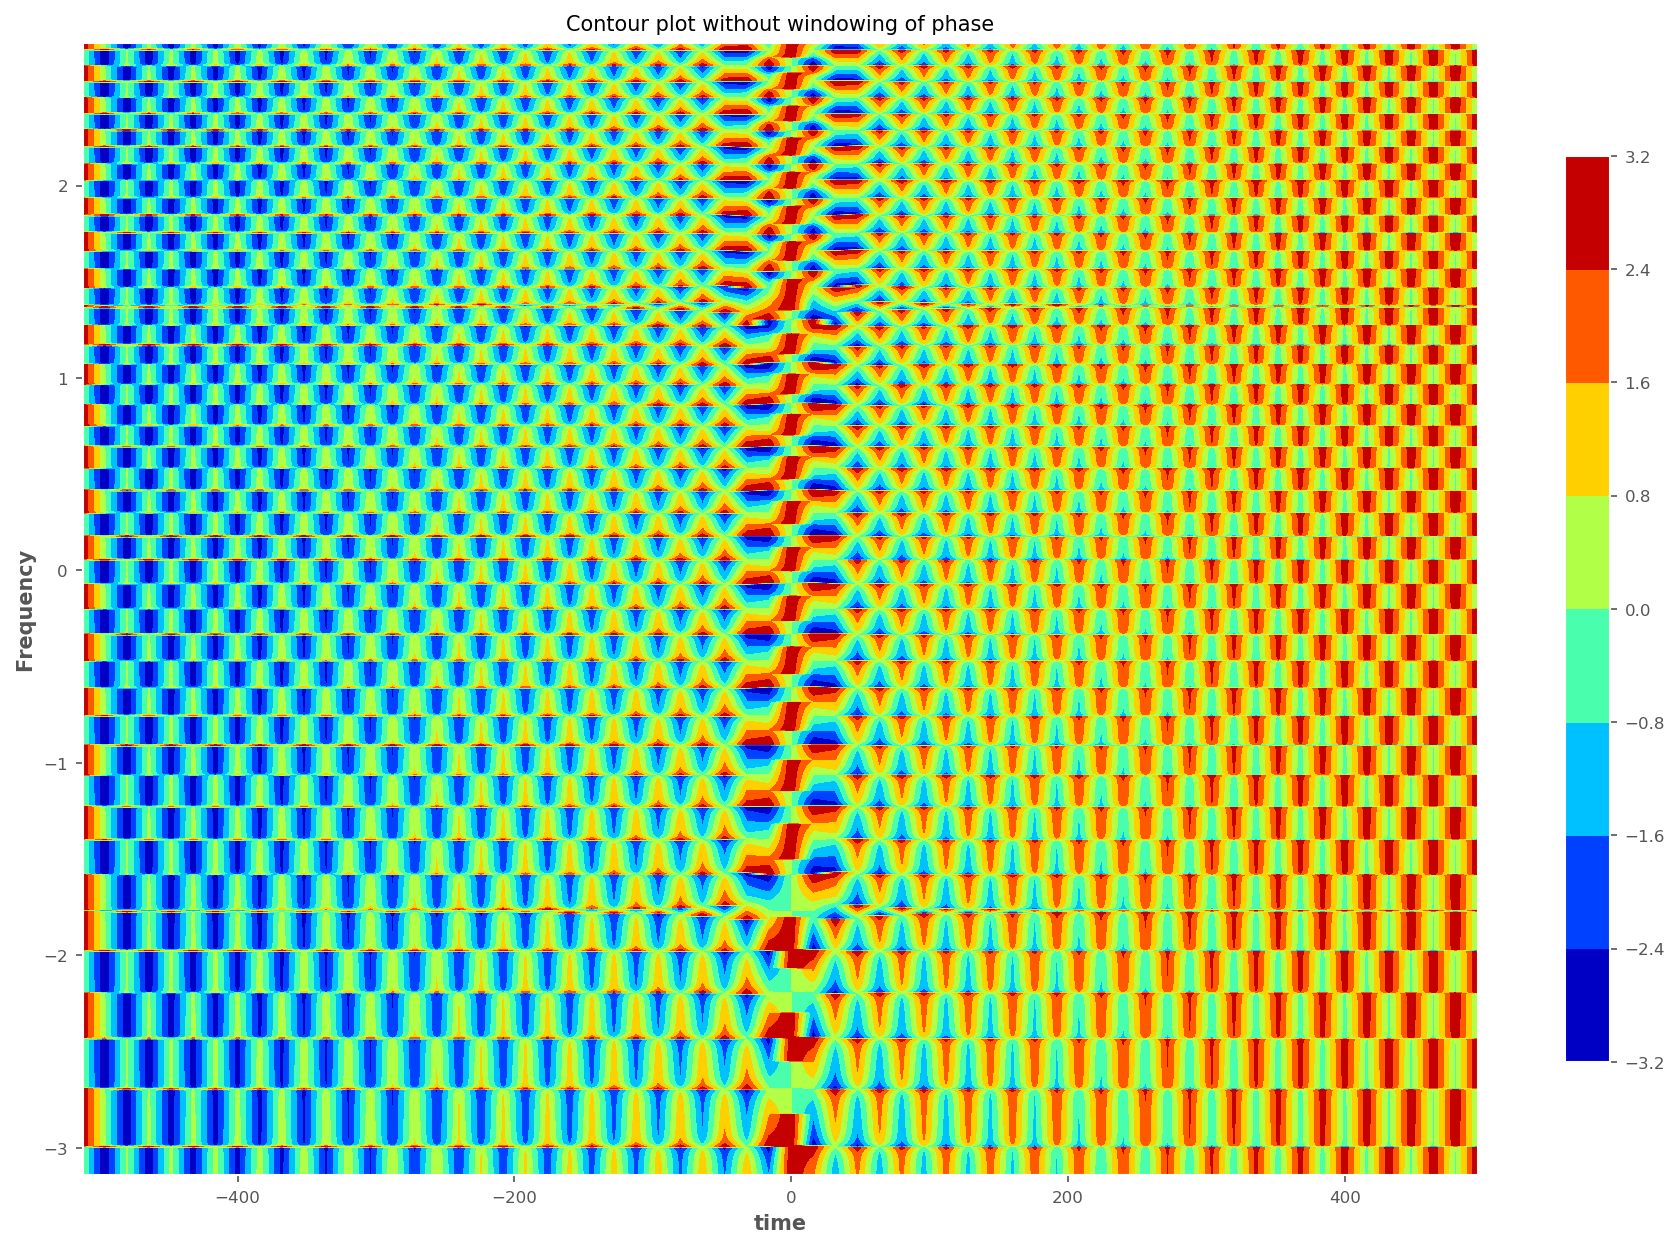

In [41]:
print(w.shape)
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

CS=plt.contourf(w,t,Y_angles.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot without windowing of phase')
plt.ylabel("Frequency")
plt.xlabel("time")

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

### With Windowing

In [42]:
t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t_arrays=np.split(t,16)

Y_mags=np.zeros((1024-64,64))
Y_angles=np.zeros((1024-64,64))

for i in range(1024-64):
    
    tt=t[i:i+64]
    
    dt=tt[1]-tt[0];fmax=1/dt
    #Hamming window
    n=np.arange(64)
    wnd=np.fft.fftshift(0.54+0.46*np.cos(2*np.pi*n/64))

    #y
    y=np.cos(16*(1.5+tt/2/np.pi)*tt)
    y*=wnd
    Y=np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))/(64)
    w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
    
    Y_mags[i,:]=np.abs(Y)
    Y_angles[i,:]=np.angle(Y)

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


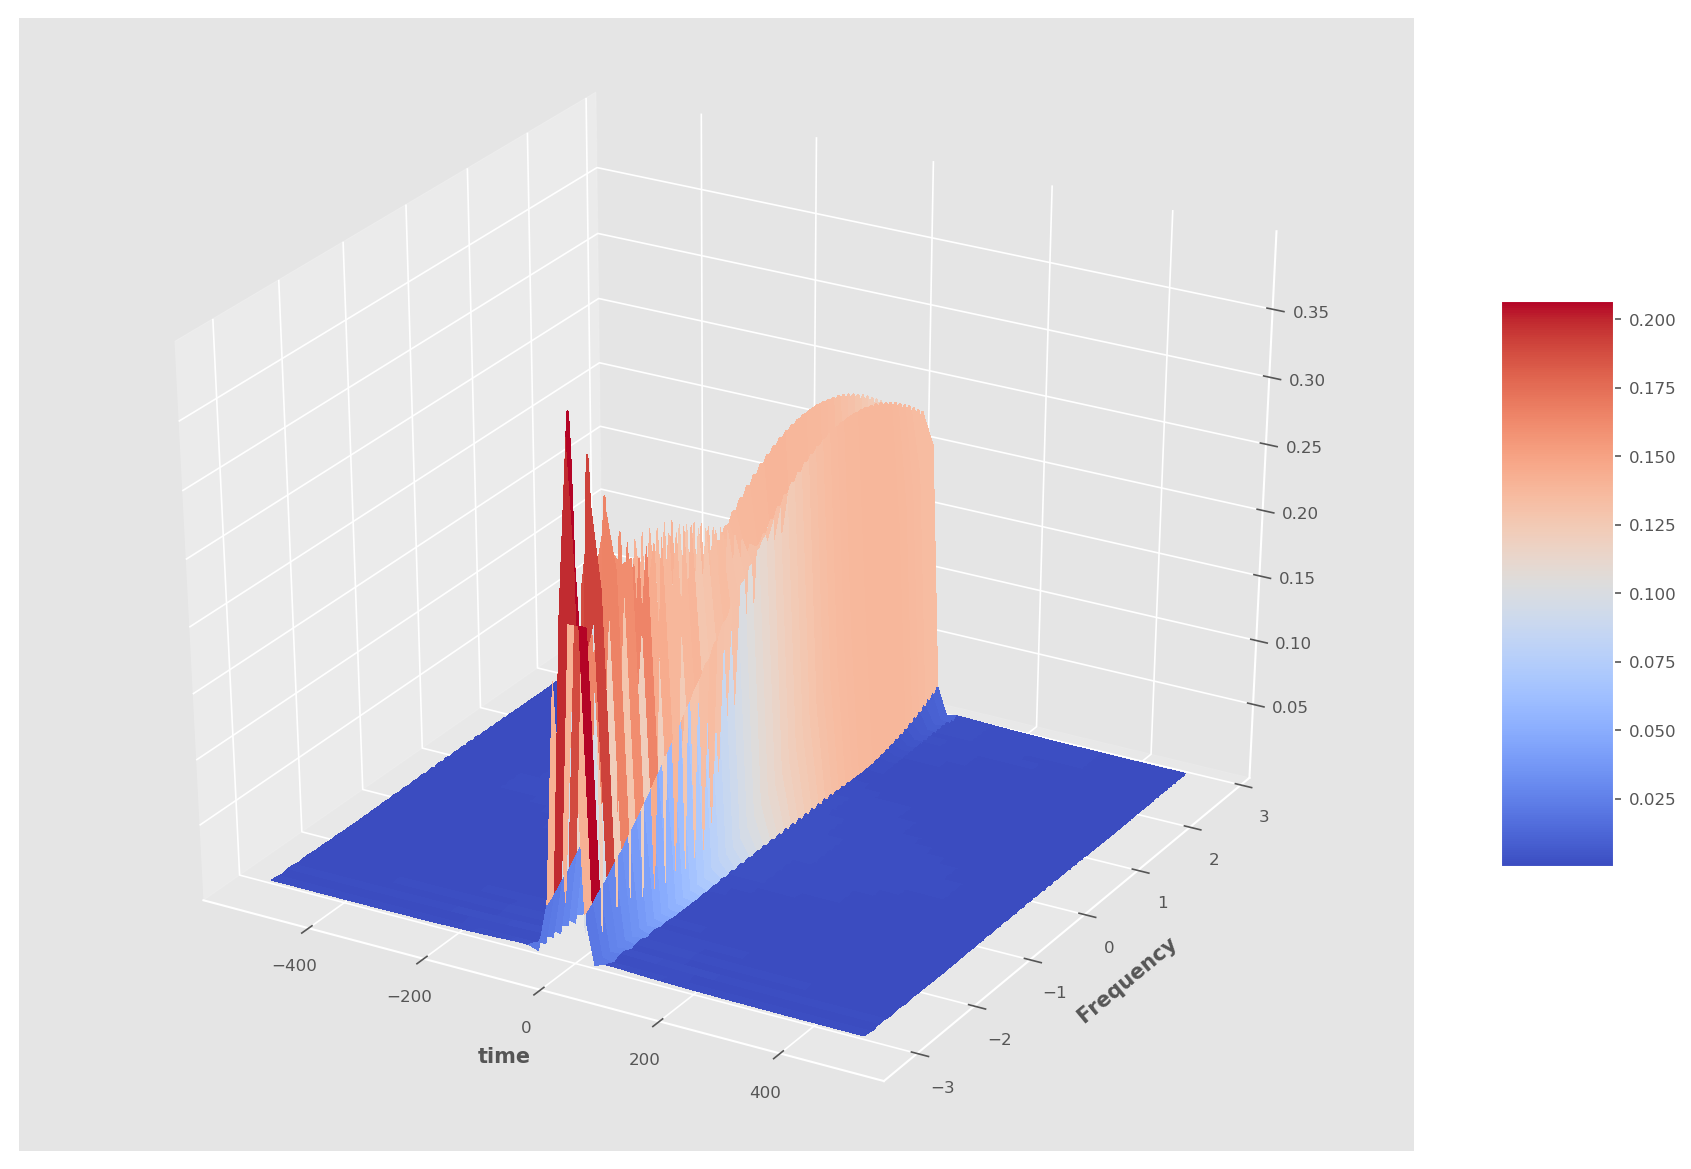

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_mags.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.ylabel("Frequency")
plt.xlabel("time")

plt.show()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


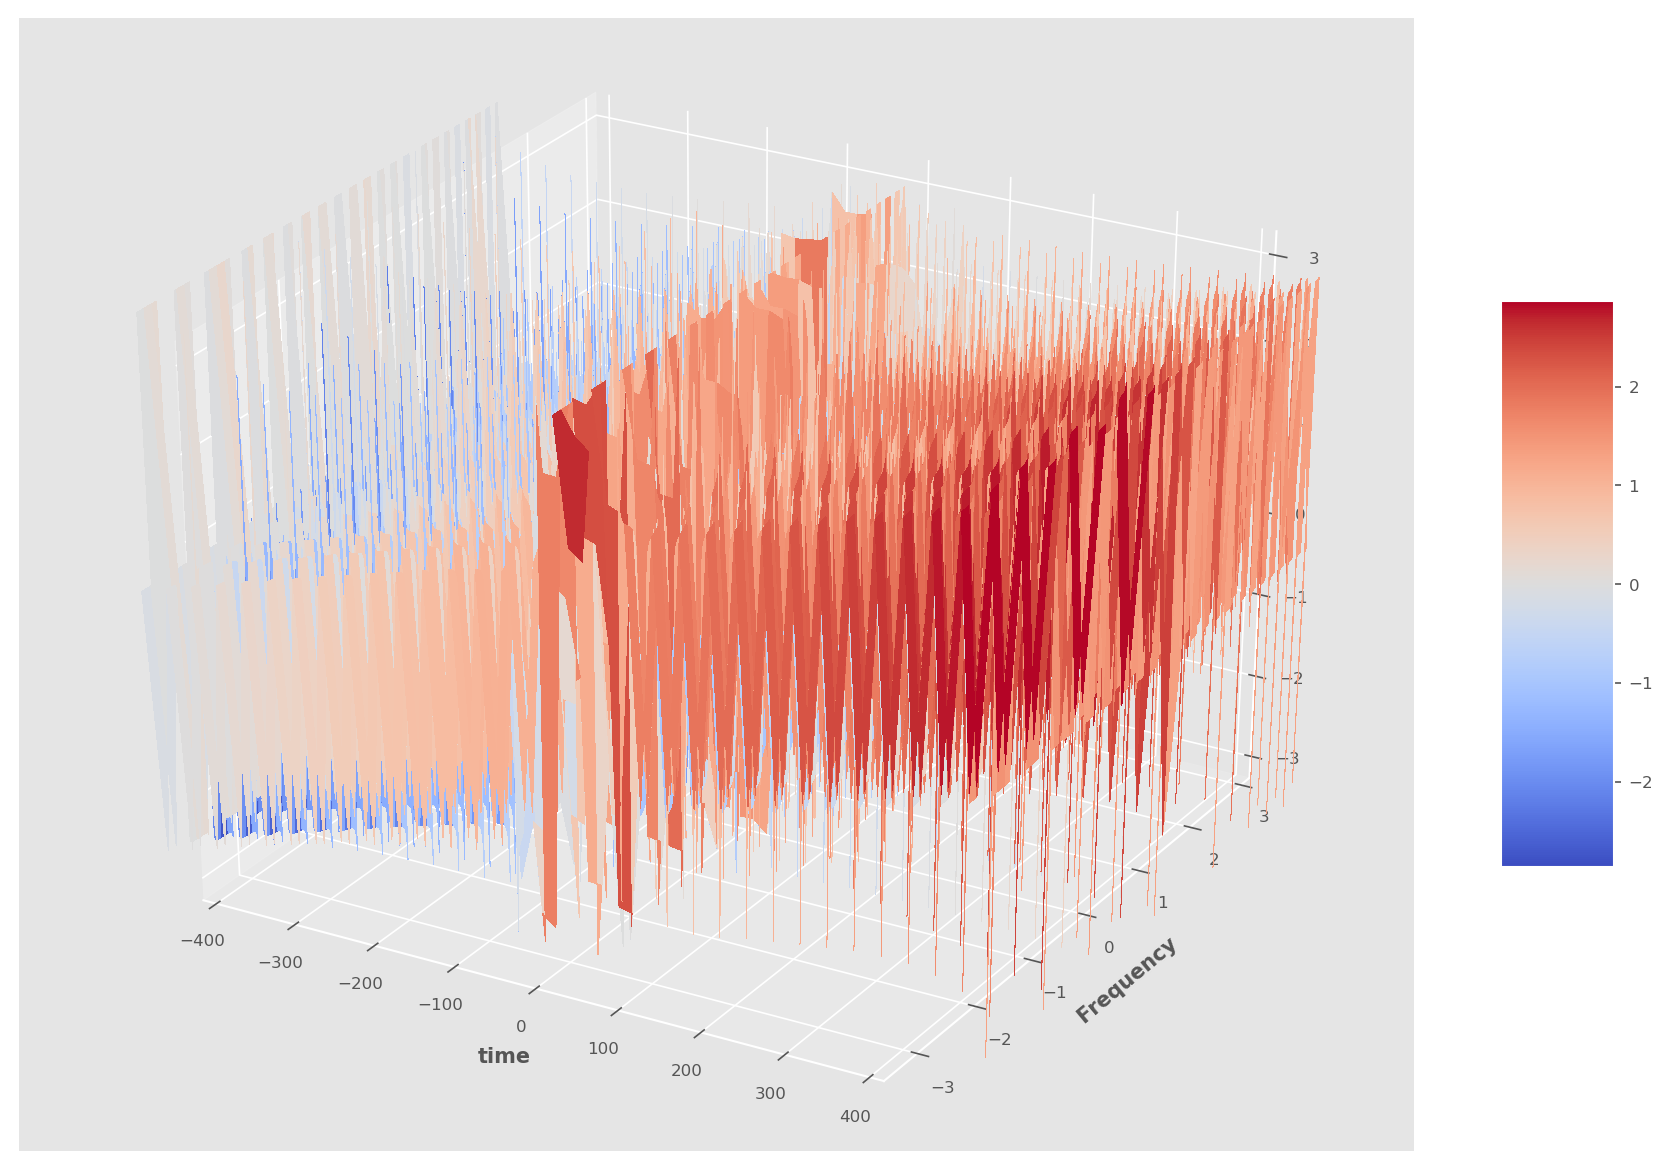

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

surf=ax.plot_surface(w,t,Y_angles.T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlim([-400,400])
plt.ylabel("Frequency")
plt.xlabel("time")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


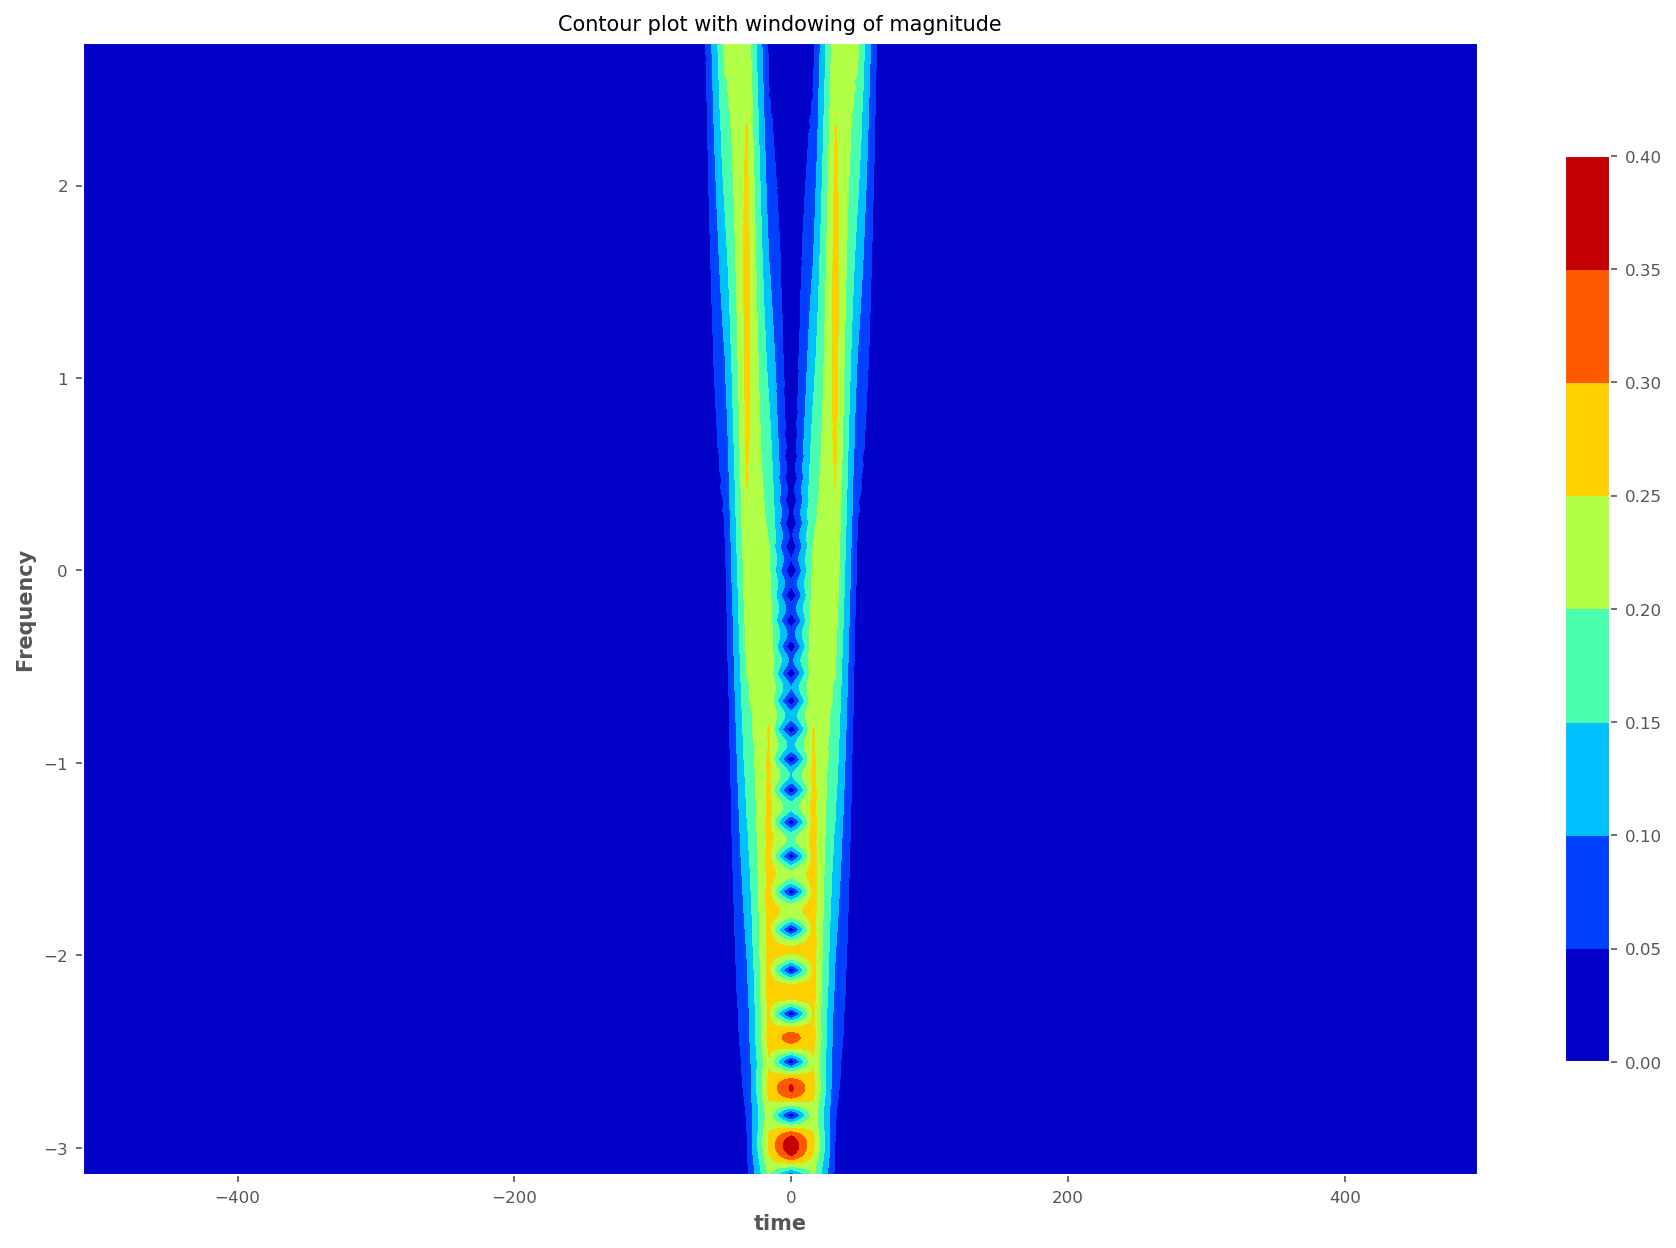

In [47]:
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)


CS=plt.contourf(w,t,Y_mags.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot with windowing of magnitude')
plt.ylabel("Frequency")
plt.xlabel("time")

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])
plt.show()

()


/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'interpolation'
  s)
/Users/Ankivarun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


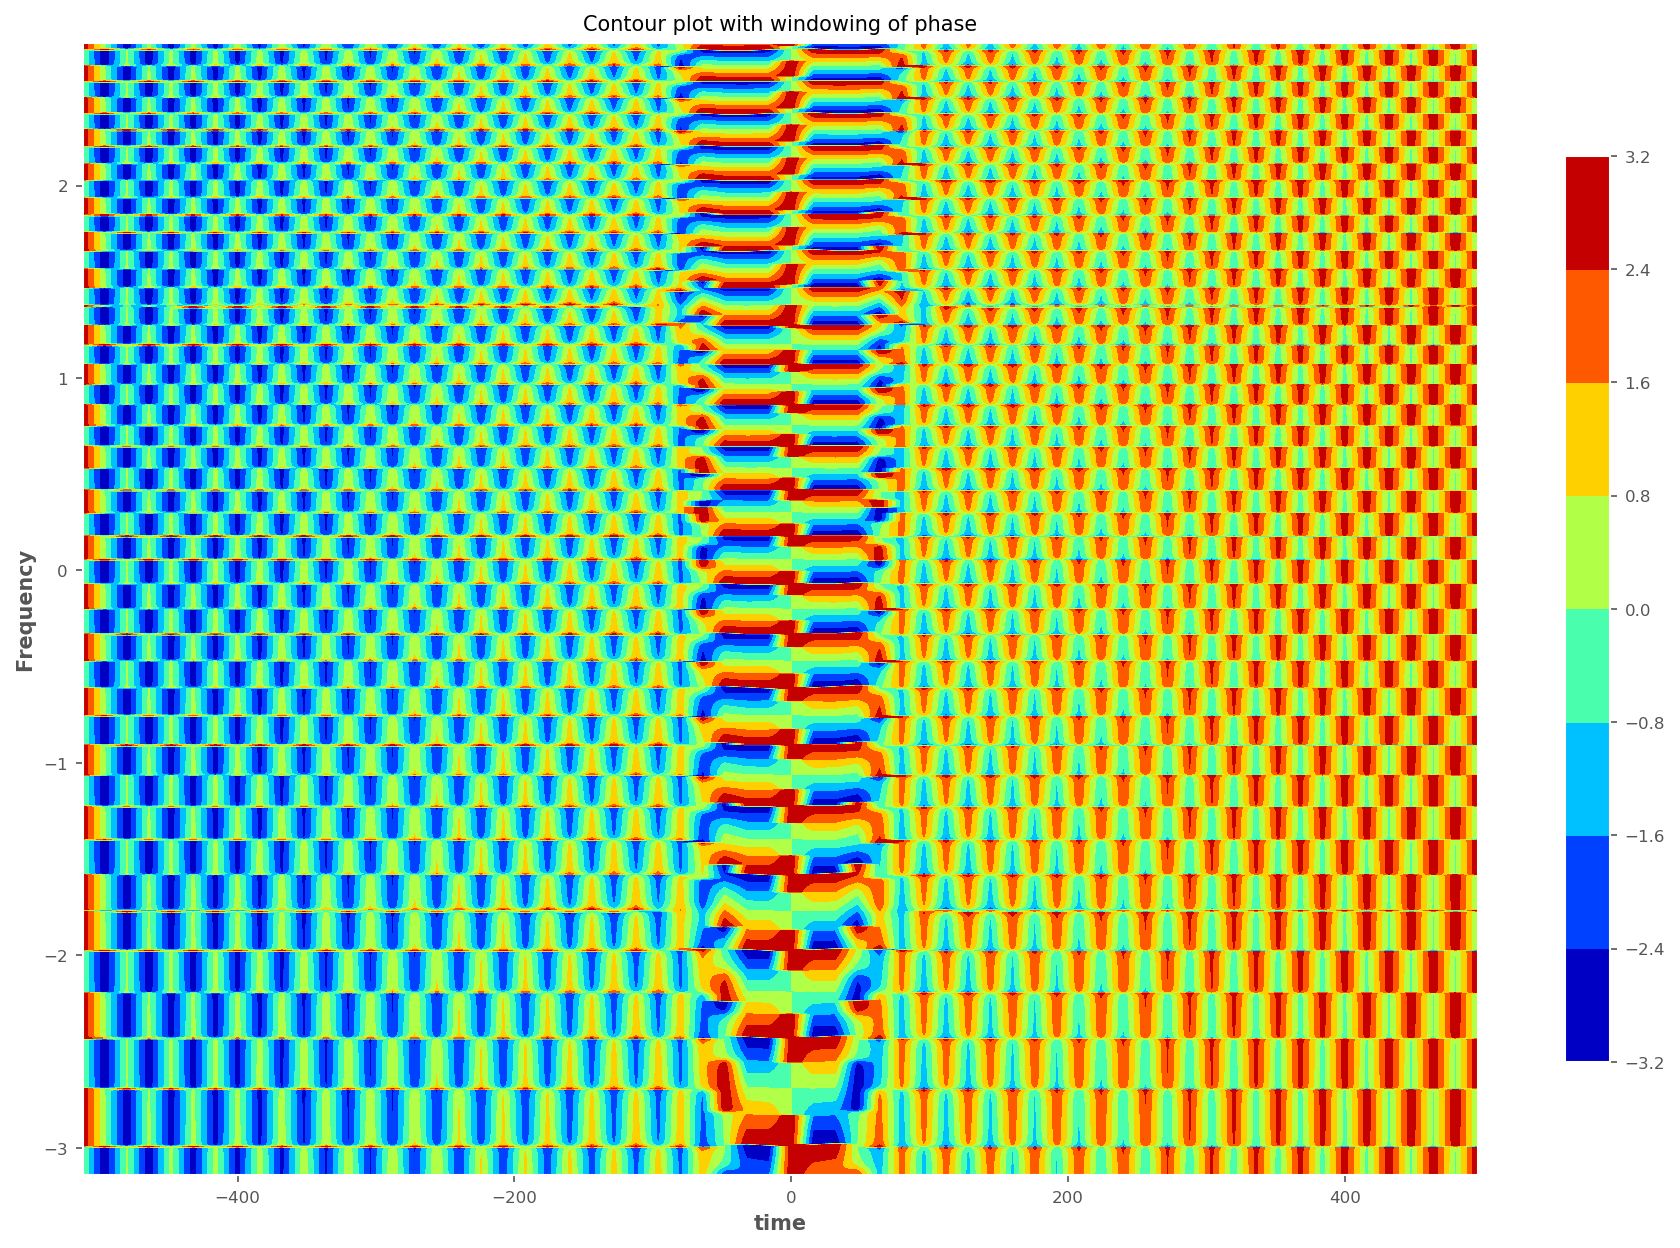

In [48]:
print(w.shape)
plt.figure()

t=np.linspace(-np.pi,np.pi,1025);t=t[:-1]
t=t[:1024-64]
w=np.linspace(-fmax*np.pi,fmax*np.pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)

CS=plt.contourf(w,t,Y_angles.T,interpolation='bilinear', origin='lower',\
               cmap=cm.jet)
plt.title('Contour plot with windowing of phase')
plt.ylabel("Frequency")
plt.xlabel("time")

CB = plt.colorbar(CS, shrink=0.8, extend='both')
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

# Results and Discussions

In this assignment we have covered the requirement of windowing in the case of non-periodic series in DFT's. In particular this is to mitigate the effect of Gibbs phenomena owing to the discontinuous nature of the series $\tilde{x}[n]$ realised by a discrete fourier transform.

The last question addresses the time varying spectra for a chirped signal, where we plot fourier spectra for different time slices of a signal. We noted the case of sparse number of slices and hence took more closely spaced slices.

The general properties of a fourier spectra for a chirped signal are observable in the time avrying plots , ie..., existence of two peaks (slow growth), vanishing of chirp effects in case of a windowed transform, and a phase plot that periodically varies with reduced phase near maximum values.
